In [8]:
import json

with open("all.json", "r") as f:
    packages = json.load(f)
    
print(len(packages))

205038


In [9]:
from networkx.readwrite import json_graph

import pandas

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [10]:
import networkx as nx

In [29]:
G = nx.DiGraph()

def graph():
    for key, value in packages.items():
        for v in value["require"]:
            if v != "php":
                G.add_edge(key, v)

In [30]:
graph()
print(len(G))

161749


In [31]:
print(len(G))

161749


In [32]:
def downloadCounts():
    dic = {}
    for key,values in packages.items():
        try:
            temp = {}
            temp[key] = values["downloads"]["total"]
            dic.update(temp)
        except:
            pass
    dic = sorted(dic.values(), reverse=True)
    return dic

In [33]:
def pageRank():
    #Calculate the page rank
    pr = {}
    pr = nx.pagerank(G)
    pr = sorted(pr.values(), reverse=True)
    return pr

In [34]:
dc = downloadCounts()

In [35]:
pr = pageRank()

In [36]:
def dependency_graph():
    deplist = []

    for node in G:
        if len(G[node]) == 0:
            continue
        deplist.append(len(G.in_edges([node])))
    x = zero_to_nan(deplist)
    x = np.sort(x)
    print(x)
    print(len(x))
    p = 1. * np.arange(len(x))/(len(x) - 1)
    plt.plot(x, p, marker='.', linestyle='none')
    _ = plt.xlabel('Dependents')
    _ = plt.ylabel('CDF')
    plt.margins(0.02)
    plt.show()

In [37]:
def zero_to_nan(values):
    return [float('nan') if x==0 else x for x in values ]

[ 1.  1.  1. ... nan nan nan]
142732


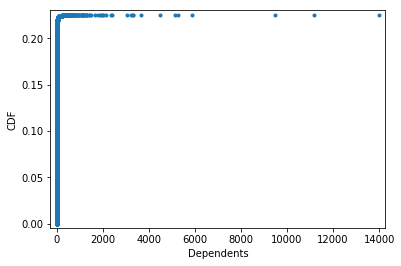

In [38]:
dependency_graph()

In [39]:
def dependency_graph():
    deplist = []

    for node in G:
        if len(G[node]) == 0:
            continue
        deplist.append(len(G.out_edges([node])))
    x = zero_to_nan(deplist)
    x = np.sort(x)
    print(x)
    print(len(x))
    p = 1. * np.arange(len(x))/(len(x) - 1)
    plt.plot(x, p, marker='.', linestyle='none')
    _ = plt.xlabel('Dependencies')
    _ = plt.ylabel('CDF')
    plt.margins(0.02)
    plt.show()

[   1    1    1 ...  167  173 2481]
142732


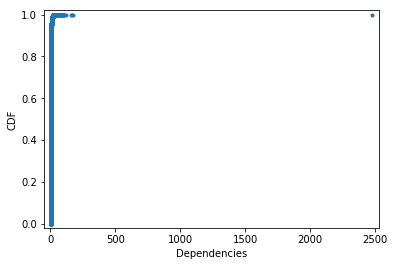

In [41]:
dependency_graph()

In [45]:
def stars():
    dic = {}
    for key,values in packages.items():
        try:
            temp = {}
            if not values["stars"]:
                continue
            temp[key] = values["stars"]
            dic.update(temp)
        except:
            pass
    dic = sorted(dic.values(), reverse=True)
    return dic

In [47]:
def forks():
    dic = {}
    for key,values in packages.items():
        try:
            temp = {}
            if not values["forks"]:
                continue
            temp[key] = values["forks"]
            dic.update(temp)
        except:
            pass
    dic = sorted(dic.values(), reverse=True)
    return dic

In [46]:
strs = stars()

In [48]:
frks = forks()

In [50]:
max_d = []

In [59]:
# dfs_depth base Code reference networkx
def dfs_depth(G, source=None, depth_limit=None):
    if source is None:
        nodes = G
    else:
        nodes = [source]
    visited = set()
    if depth_limit is None:
        depth_limit = len(G)
    for start in nodes:
        #print(start)
        if start in visited:
            continue
        max_depth = 0
        visited.add(start)
        stack = [(start, depth_limit, iter(G[start]))]
        while stack:
            parent, depth_now, children = stack[-1]
            try:
                child = next(children)
                if child not in visited:
                    yield parent, child
                    visited.add(child)
                    if depth_now > 1:
                        if((depth_limit - depth_now + 1)>max_depth):
                            max_depth = depth_limit - depth_now + 1
                        stack.append((child, depth_now - 1, iter(G[child])))
            except StopIteration:
                stack.pop()
    global max_d
    max_d.append(max_depth)

In [54]:
def deplist(dc, pr, strs, frks):
    # Calculate all the dependencies, dependents
    dcon = {}
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    for node in G:
        #print(node)
        #temp = {node:len(G.out_edges(node))}
        list1.append(node)
        list2.append(len(G.out_edges(node)))
        list3.append(len(G.in_edges(node)))
        list4.append(len(list(nx.dfs_edges(G,node))))
        list(dfs_depth(G, node))
        #dcon.update(temp)
    list2 = sorted(list2, reverse=True)
    list3 = sorted(list3, reverse=True)
    list4 = sorted(list4, reverse=True)
    global max_d
    max_d = sorted(max_d, reverse=True)
    print(max_d)
    print("Maximums:")
    print(max(list2[:1000]))
    print(max(list3[:1000]))
    print(max(list4[:1000]))
    print(max(pr[:1000]))
    print(max(max_d[:1000]))
    print(max(dc[:1000]))
    print(max(strs[:1000]))
    print(max(frks[:1000]))
    print("Minimums:")
    print(min(list2[:1000]))
    print(min(list3[:1000]))
    print(min(list4[:1000]))
    print(min(pr[:1000]))
    print(min(max_d[:1000]))
    print(min(dc[:1000]))
    print(max(strs[:1000]))
    print(max(frks[:1000]))
    #sorted_dcon = sorted(dcon.items(), key=lambda x: x[1], reverse=True)
    df = pandas.DataFrame(data={"Dependencies":list2[:1000], "Dependents":list3[:1000], "DFS-Edges":list4[:1000], "Max-Depth":max_d[:1000], "Page Rank":pr[:1000], "Download Counts":dc[:1000], "Stars":strs[:1000], "Forks":frks[:1000]})
    df.plot(kind="density", subplots=True, layout=(4,4), sharex=False)
    plt.show()

0.0.1/try-make-package
monolog/monolog
00f100/cakephp-opauth
cakephp/cakephp
opauth/opauth
00f100/fcphp-cache
ext-redis
00f100/fcphp-redis
00f100/fcphp-crypto
00f100/fcphp-command
00f100/fcphp-autoload
00f100/fcphp-sconsole
00f100/fcphp-di
00f100/fcphp-context
00f100/fcphp-controller
00f100/fcphp-service
00f100/fcphp-cookie
00f100/array_dot
ext-sodium
00f100/fcphp-datasource
00f100/fcphp-datasource-mysql
00f100/fcphp-dispach
00f100/fcphp-provider
00f100/fcphp-repository
00f100/fcphp-route
00f100/fcphp-shttp
00f100/fcphp-session
00f100/opauth-facebook-model
wouter0100/cakephp-opauth
00f100/phpatr
guzzlehttp/guzzle
00f100/phpuphar
0100dev/cakephp-rabbitmq
php-amqplib/php-amqplib
038dev/wordpress
vlucas/phpdotenv
0ctobat/octobat-php
ext-curl
ext-json
ext-mbstring
0daysolution/composer-asset-plugin-assagist
composer-plugin-api
fxp/composer-asset-plugin
0k/php-oe-json
tivoka/tivoka
0nedark/onespec
lstrojny/functional-php
symfony/console
phpspec/prophecy
0nedark/servicer
aws/aws-sdk-php
0plu

7lion/intercom-php
7rin0/bigfoot-content-bundle
7rin0/bigfoot-core-bundle
7rin0/bigfoot-context-bundle
symfony/assetic-bundle
liip/imagine-bundle
7rin0/bigfoot-default-theme
7rin0/bigfoot-media-bundle
7rin0/bigfoot-navigation-bundle
7rin0/bigfoot-user-bundle
7rin0/seven-manager
7rin0/seven-manager-bundle
burgov/key-value-form-bundle
cocur/slugify
doctrine/doctrine-migrations-bundle
doctrine/phpcr-bundle
doctrine/phpcr-odm
eko/feedbundle
elasticsearch/elasticsearch
helios-ag/fm-elfinder-bundle
jackalope/jackalope-doctrine-dbal
liip/functional-test-bundle
lunetics/locale-bundle
nelmio/alice
phpcr/phpcr-shell
sonata-project/admin-bundle
sonata-project/cache-bundle
sonata-project/classification-bundle
sonata-project/comment-bundle
sonata-project/doctrine-extensions
sonata-project/doctrine-orm-admin-bundle
sonata-project/doctrine-phpcr-admin-bundle
sonata-project/exporter
sonata-project/formatter-bundle
sonata-project/google-authenticator
sonata-project/intl-bundle
sonata-project/markitup-b

aboldyrev/web-client
abolkog/newsletter
abolotin/yii2-unique-id
abonlinesolutions/php-ews
garethp/http-playback
aboustayyef/image-extractor
marc1706/fast-image-size
aboustayyef/previewer
aboustayyef/summarizer
camspiers/porter-stemmer
aboutcoders/enum-serializer-bundle
jms/serializer-bundle
aboutcoders/file-distribution
knplabs/gaufrette
aboutcoders/file-distribution-bundle
aboutcoders/job-bundle
aboutcoders/process-control
aboutcoders/resource-lock-bundle
aboutcoders/scheduler-bundle
nelmio/api-doc-bundle
aboutcoders/logger-bundle
aboutcoders/notification-bundle
sonata-project/notification-bundle
aboutcoders/process-control-bundle
aboutcoders/sequence-bundle
aboutcoders/supervisor-bundle
supervisorphp/supervisor
lstrojny/fxmlrpc
aboutcoders/supervisor-command-bundle
yzalis/supervisor-bundle
aboutcoders/workflow-bundle
aboutgoods/jakku-bundle
aboutgoods/php-jakku-client
aboutgoods/konnect
aboutgoods/konnect-bundle
aboutgoods/agrabbitmq
abouttheweb/zf2-twb-bundle
aboutyou/app-sdk
abouty

adamb/testimonial
adamb/ttest
adamb/ttestadi
adamb/ttestapplink
adamb/ttestbike
adamb/ttestfleet
adamb/ttesthgv
adamb/uk-map
adamb/uk-store-locator
codescheme/uk-postcodes
adamb/websitestatus
adambalan/helpscout-api
violet/streaming-json-encoder
adambalan/laravel-helpscout
adambisek/gulp-assets
adambisek/secured-links
adamblake/parse
adambrett/backup
google/api
adamcmoore/laravel-approvable
adamculp/api-consumer
adamdburton/destiny-2-api-client
adamdburton/mattermost-webhook-php
adamdburton/nanoftpd
adamdburton/remotecmd
adamfabis/transfer
adamgajzlerowicz/migrateur
adamgoose/abstraction
adamgoose/commander
adamgoose/gitlab
adamgoose/laravel-annotations
adamgoose/prismic-io
prismic/php-sdk
adamgoose/saasframe
cartalyst/sentry
adamgoose/seed-gen
adamgpp/recruitment_api_client
adamibrahim/email_confirm
adamibrahim/localization
adamibrahim/superauth
adamiecradek/ddd-bricks-zf2
adamiecradek/ddd-bricks-zf2-event
agmakonts/ddd-bricks
agmakonts/stl
adamiecradek/zf-simple-migrations
zendframew

aedart/overload
aedart/util
aedart/athenaeum
jean85/pretty-package-versions
aedart/config
aedart/config-loader
aedart/laravel-helpers
aedart/dto
aedart/installed-version
aedart/laravel-application
aedart/laravel-detector
aedart/laravel-config
aedart/laravel-database
aedart/model-vendor-path
aedart/model-table-name
aedart/license-file-manager
aedart/model-email
aedart/validate
aedart/model-hash-algorithm
aedart/model-id
aedart/model-uuid
aedart/scaffold
aedart/model
aedart/testing
aedart/testing-gst
aedart/testing-laravel
orchestra/testbench
aegeansea/able
kkszymanowski/traitor
aegis/jwt
aegis/json
aegis/jwt-authentication-bundle
aego/oauth2-mailru
aego/oauth2-odnoklassniki
aego/oauth2-yandex
aeibrod/puzzle
aeifn/google-cse
aejnsn/lapis
aejnsn/phpexcel-laravel
aejnsn/postgresify
aelast/aecmf
aelast/tools
aelast/database
aelast/router
aelast/request
aelast/data-storage
aelast/view
aelvan/craft-cp-element-count
aelvan/imager-do-spaces-driver
aengine/omnicms
phive/twig-extensions-deferred


whiteoctober/tcpdf-bundle
agustim/slim3-skeleton-mvc-sqlite
agustincarmona/laravel-api-schema
agvstin/phootstrap
gabordemooij/redbean
agy-koala/yii2-highcharts-widget
bower-asset/highcharts
agykoala/slack
aharen/laravel-money
aharen/omdbapi
ahaschool/video-dl
norkunas/youtube-dl-php
ahead4/bus
ahead4/captcha
ahead4/image
ahead4/cache
ahead4/licensing
ahead4/menus
ahead4/modules
pingpong/generators
pingpong/support
ahead4/platform-util
aheart/espresso
ahebrank/background-resizer
prospress/action-scheduler
ahebrank/plugin-reload
wrench/wrench
ahebrank/timber-kint-debug
aheenam/countries
umpirsky/country-list
aheenam/laravel-collection-addon
aheenam/laravel-package-cli
aheenam/laravel-translatable
aheenam/mozhi
spatie/yaml-front-matter
aheenam/similar-string
aheinze/cockpit
claviska/simpleimage
ksubileau/color-thief-php
maennchen/zipstream-php
aheissenberger/foundation
zurb/foundation
aherstein/laravel-saml2-post
ahfeel/html2text
ahfeel/php-resque
ahidri/searchapi-bundle
jane-php/open-api

zf1/zend-cache
akayaman/azure-queue-laravel
microsoft/azure-storage-queue
akayaman/flysystem-azure-adapter
akayaman/laravel-flysystem-azure
akbarhashmi/secure-php-login-system
paragonie/csp-builder
paragonie/halite
akeeba/awf
akeeba/fof
akeinhell/redfoxbot-middlewares
akeinhell/telegram-bot
akempler/composerd8
drupal/token
drupal/panels
drupal/entity_reference_revisions
akeneo-labs/classification-rule-bundle
akeneo/pim-enterprise-dev
akeneo-labs/custom-entity-bundle
akeneo-labs/data-generator-bundle
akeneo-labs/dev-toolbox-bundle
akeneo-labs/direct-to-mongodb
akeneo-labs/excel-connector-bundle
akeneo-labs/spreadsheet-parser-bundle
akeneo-labs/extension-starter
akeneo-labs/pim-enhanced-connector
akeneo-labs/spreadsheet-parser
akeneo-salesforce/salesforce-api
php-http/multipart-stream-builder
akeneo/batch
akeneo/storage-utils
akeneo/batch-bundle
akeneo/storage-utils-bundle
akeneo/catalogs
akeneo/cnet-connector
akeneo/extended-attribute-type
akeneo/connector-mapping-bundle
akeneo/crowdin-

alessandrominoccheri/userpermissions
alessandrotesoro/wp-codeless-lib
alessandrotesoro/wp-notices
alessandrotesoro/wp-optionskit
aleste/adminlte-generator-bundle
lexik/form-filter-bundle
aleste/crud-generator
aleste/generator-bundle
alestro/errors
alestro/http-factories
nyholm/psr7-server
alestro/http-handlers
alestro/interfaces
psr/http-client
aleswita/dropzoneuploader
dg/ftp-php
aleswita/formrenderer
aleswita/forms
aleswita/pdfmerger
aleswita/visualpaginator
aleswita/webloader
alevikzs/mapper
alevikzs/reflection
alevikzs/persistent-jms
alevikzs/phmap
alevikzs/phrest
videlalvaro/php-amqplib
alex-5zi/hexlet-psr-linter
alex-barylski/jasperphp
alex-bond/yii2-select2-widget
alex-bond/yii2-thumbler
stefangabos/zebra_image
alex-butucea/commoner
apigen/apigen
alex-dwt/file
flexibuild/component
alex-dwt/request-objects
alex-dwt/verified-request
alex-equity/php-slack-bot
devristo/phpws
alex-lyanik/yii2-viewlog
kartik-v/yii2-date-range
alex-mamchenkov/multichain-jsonrpc
alex-moreno/stubby4php
a

sendpulse/rest-api
alirezamirsepassi/magento-soap-api
alisadikin008/distance
alish/telegram
alish/token-verification
gladcodes/keygen
alisherdavronov/yii2-grid-sort-column-enh
alisoft/php-mns
alisoftware/phptgbot
alisonbnt/hikaru-container
alisonjo2786/vanilla2
cubear/cwd_admin
cubear/cwd_base_bootstrap
drupal/admin_toolbar_tools
drupal/better_field_descriptions
drupal/chosen
drupal/chosen_field
drupal/chosen_lib
drupal/coffee
drupal/config_direct_save
drupal/config_installer
drupal/config_update
drupal/config_update_ui
drupal/diff
drupal/editor_advanced_link
drupal/externalauth
drupal/features
drupal/features_ui
drupal/module_filter
drupal/override_node_options
drupal/redis
drupal/simplesamlphp_auth
drupal/twig_tweak
drupal/vertical_tabs_config
harvesthq/chosen
alisson-nascimento/cakephp-plugin-auditoria
alisson-nascimento/cakephp-theme-adminlte
alisson-nascimento/json2class
phacil/common
alisson-padua/fluig-php
symfony/dotenv
alissonphp/lumen-api-skeleton
alistairshaw/vendirun
social

skeeks/yii2-jquery-contextmenu
skeeks/yii2-slug-behavior
skeeks/yii2-sx
skeeks/yii2-widget-chosen
skeeks/yii2-widget-codemirror
skeeks/yii2-widget-highcharts
skeeks/yii2-widget-simpleajaxuploader
skeeks/yii2-ya-slug
amelexik/yii2-yee-post
yeesoft/yii2-yee-core
yeesoft/yii2-yee-media
paulzi/yii2-nested-intervals
nicolasbize/magicsuggest
amelia/backblaze
mhetreramesh/flysystem-backblaze
amelia/dynamodb-laravel
amelia/money
amelia/monzo-php
amelia/rememberable
ameliegardiner/blocktrail-sdk
btccom/bitwasp-bitcoin-bch-addon
amenadiel/jpgraph
amenadiel/slim-phpconsole
php-console/php-console
amengdewo/article
amenolascina/lara-translate-manager
amenophis/prince-bundle
amenophis/prince
amenophis/silex-admin
amenophis/silex-doctrineorm
amenophis/silex-crud
amenophis/silex-useradmin
amenophis/social-bundle
amenophis/sympress
amenophis/whmcs-bundle
amenophis/whmcs-connector
ameos/ameos_dailymotion
typo3/cms
ameos/ameos_filemanager
ameos/ameos_form
ameos/ameos_mailredirect
ameos/ameos_quickconten

andrevabo/yii2-url-shortener
andrew-a/laravel-selfupdater
andrew-ko/hexlet-psr-linter
andrew-natoli/rapid-rest
andrew13/cabinet
bllim/datatables
andrew45105/simple-framework-core
pyrocms/lex
andrew501983/what-converts-php
andrew72ru/bitrix-twig
andrew72ru/yii2-bootstrap-datepicker-mobile
bower-asset/bootstrap-datepicker-mobile
andrew72ru/yii2-bootstrap-slider
bower-asset/seiyria-bootstrap-slider
andrew72ru/yii2-featherlight
andrew72ru/yii2-ion-range-slider
bower-asset/ionrangeslider
andrew72ru/yii2-pen
bower-asset/to-markdown
andrew72ru/yii2-typographer
kix/mdash
andrewalf/service_providers
andrewandante/silverstripe-bootstraptour
sorich87/bootstrap-tour
andrewandante/silverstripe-extradotenvs
andrewandante/silverstripe-theme-picker
silverstripe/siteconfig
andrewandante/womens-refuge-shield
andrewbain/validator
andrewblake1/yii2-credit-card
andrewbo/robinhood-php-lib
andrewboy/google-analytics-statistics
andrewboy/laravel-statistics-panel
andrewboy/historylog
andrewboy/laravel-multi-au

antriver/flarum-http-hooks
antriver/omnipay-rms
antron/bobo
antron/exceldb
antrpx/oauth2-antrpx
ants/captcha
ants/frame
antsoft/amorph-db-connector
antstudiocz/redirect-checker
ptcong/php-http-class
kdyby/console
antsunji/log
antsunji/new-relic-handler
antsupovsa/bitrix24
mesilov/bitrix24-php-sdk
anttiviljami/wp-pdf-templates
antuan-laptop/ledsoauth2
antuan-laptop/ledsuser
webino/webino-image-thumb
antuan-laptop/commons
antuan-sehikyan/image-manager
antuan-sehikyan/tiny-blog
antvel/installer
antvtech/image
antwebes/api-social-bundle
antwebes/chatea-client-bundle
antwebes/badge-bundle
antwebes/chatea-client-lib
antwebes/chatea-common
antwebes/chatea-secure-bundle
beelab/recaptcha2-bundle
antwebes/geocoder-bundle
antwebes/geocoder
antwebes/guzzle-fake-server
antwebes/image-resize-bundle
antwebes/photo-rest-bundle
antwerpfactory/laravel-lightspeed-restaurant
antyrace/oauth2-server
lucadegasperi/oauth2-server-laravel
antz29/base
antz29/base-config
antz29/base-session
antz29/base-strings
an

alexshelkov/simpleacl
doctrine/doctrine-mongo-odm-module
appt/twig
apptha/user
apptha/base
appthentic/auth
apptimists/laravel-spatial
jmikola/geojson
phayes/geophp
apptut/wx-pay
appventus/alertify-bundle
appventus/auto-form-fill-bundle
appventus/aviary-bundle
appventus/datamigration-bundle
appventus/shortcuts-bundle
appventus/extradoctrine-bundle
appventus/facebook-graph-bundle
appventus/mangopay-bundle
appventus/ajax-bundle
mangopay/php-sdk-v2
appventus/smssender-bundle
gergelypolonkai/smssender
appventus/spoolmailerbundle
symfony/swiftmailer-bridge
appventus/swiftmailerdbbundle
appventus/taiga-bundle
taiga/php-sdk
appwilio/cdek-sdk
appwilio/russianpost-sdk
appwilio/yakassa
appzavr/php-utils
appzcoder/container
appzcoder/laravel-admin
appzcoder/laravel-package-discovery
appzcoder/laravel-roles
appzcoder/lumen-routes-list
appzcoder/phpcloc
appzcoder/routing
appzcoder/alias-maker
appzio/php-sdk
appzz/cli-progressbar
dariuszp/cli-progress-bar
appzz/curl-client
appzz/arr
appzz/finder
appz

asgardcms/setting-module
asgardcms/media-module
asgardcms/page-module
asgardcms/menu-module
asgardcms/workshop-module
asgardcms/translation-module
asgardcms/flatly-theme
asgardcms/adminlte-theme
armorpayments/armorpayments-php
armrck/yii2-tiles
armrck/yii2-touch-spin
arms/arms
armshan/baidubos
armxy/laravel-internal-queue
arnaslu/repo-stats
arnaslu/zendesk-manager
arnaudandko/letter-avatar
arnaugm/band-accounting-bundle
arnaupc/li3_debugbar
arndtteunissen/column-layout
arndtteunissen/column-layout-arndtteunissen
codemonkey1988/responsive-images
arndtteunissen/improve-processed-filename
arndtteunissen/realurl-clear-cache-command
arndtteunissen/simple_404_handler
arndtteunissen/social_media_fields
arne-groskurth/phpexcel-extended
arne-groskurth/temp-file
arne-groskurth/symgrid
bmatzner/fontawesome-bundle
arne-groskurth/websocket
arne-groskurth/url
arnhoe/metakeywords
arnislielturks/faye-client
nc/faye-client
arnislielturks/faye-laravel-broadcaster
arnislielturks/socketio-laravel-broadcas

ashevchuk/phpunit-plus
ashevchuk/social-api
ashfaq1701/laravel-chat
codemash/laravel-socket
ashinpaugh/oauth-v1
ashish-wagento/module-searchmodified
ashishbhoi/webblog
unisharp/laravel-ckeditor
ashishpatel0720/kisanmitra
ashkov/box
ashleydawson/class-meta
ashleydawson/class-meta-bundle
ashleydawson/doctrine-flysystem-bundle
ashleydawson/multibundle
ashleydawson/doctrine-gaufrette-storable-bundle
ashleydawson/domain-event-dispatcher-bundle
ashleydawson/domain-event-dispatcher
ashleydawson/glide-bundle
ashleydawson/simple-pagination-bundle
ashleydawson/simple-pagination
ashly/ashly
ashok/feedreader
ashop/admin
ashraf/behat-google-analytics-extension
ashrafakl/yii2-locale
ashrafi/laravel-nested-categories
ashrafi/php-payment-gateways
ashrafi/php-connectors
ashrafi/php-sms-gateway
ashrey/laravel-elastic-email-rate
ashrey/omnipay-mp
ashrey/pantaconf
ashsmith/magento2-blog-module-example
ashsmith/magento2-controller-module
ashterix/exception-handler
ashterix/log-to-file
ufo-cms/file-system
a

aulasoftwarelibre/ddd-base
prooph/common
prooph/event-sourcing
prooph/event-store-symfony-bundle
prooph/event-store
prooph/pdo-event-store
aulasoftwarelibre/ddd-dev
symfony/maker-bundle
aulasoftwarelibre/ddd-test
aulinks/mail-extractor
carrooi/pdf-extractor
carrooi/doc-extractor
carrooi/docx-extractor
aumetos/yii2-widget-select2
aune-io/magento2-autoinvoice
aune-io/magento2-b2butils
aune-io/magento2-product-category-url-fix
magento/module-catalog-url-rewrite
aune-io/magento2-product-grid-category-filter
aune-io/magento2-stripe
magento/module-vault
auntyentity/auntyentity
aur1mas/zend-a
aur1mas/zfdebug
aura-is-here/fire-and-forget
aura-is-here/laravel-multi-tenant
aura/asset-bundle
aura/web
aura/blog
aura/web-kernel
kilte/pagination
foa/filter-input-bundle
foa/filter-intl-bundle
foa/html-view-bundle
foa/domain-payload
foa/responder-bundle
aura/cli-project
aura/cli-kernel
aura/framework
aura/installer-default
aura/autoload
aura/di
aura/http
aura/input
aura/intl
aura/signal
aura/uri
aura/

axalian/achievements-doctrine
axalian/axtvdb
axalian/axtvdb-doctrine
axc/zoneminder_manager
axdlee/laravel-config-writer
axdlee/upyun-laravel-storage
upyun/sdk
axe/laravel-graphql-upload
axel-kummer/aku-logbook
axel-kummer/logbook-php
axel-php/axel
axelarge/form-for
axelarge/html-helpers
axelb/geocoder
axelero/aws-transcoder-bundle
axelero/aws-s3-bundle
axelero/axelero-mailgun-bundle
axelero/axelero-mono-bundle
axelero/ffmpeg-bundle
axelitus/acre-net-http
axelitus/acre-common
axelitus/laravel-frontend-preset
axelitus/security
axelitus/base
axelpal/phpbu-yandex-disk
phpbu/phpbu
axelpal/plati.ru-parser
bower-asset/jquery.tablesorter
bower-asset/material-design-lite
axelpal/yii2-attachments
axelpal/yii2-easyimage
axelpal/yii2-poscredit
axelpal/poscredit
axelpal/yii2-recaptcha-widget
axelspringer/mango
axelspringer/wp-bootstrap
axelspringer/wp-akamai
axelspringer/wp-config
axelspringer/wp-config-axelspringer
wpackagist-plugin/amazon-s3-and-cloudfront
wpackagist-plugin/polylang
koodimonni-l

mprzytulski/docker-process
baboon/subscription-bundle
babs100/developerstatus
babyhazelgame/babygame
babylonpartners/php-dependency-imap
babylonpartners/php-dependency-transcoder
babymarkt/cron-bundle
babyseeme/bbsm
babyshowergames/babygames
babzich/logentries-bundle
logentries/logentries-monolog-handler
bacanu/blwrap
bacardi55/carew-plugin-blogroll
carew/carew
bacardi55/carew-plugin-fastnav
bacardi55/carew-plugin-taglist
bacart/common
bacart/guzzle-client
bacart/mongodb-bundle
bacart/symfony-common
bacart/webdav-client
bacbos/bacbox
mesingh/phpfastcache
bacbos/bacbox-launcher
baccano/yii2-bootstrap4-rtl
bach-pedersen/beer-provider
bach-pedersen/laravel-riak
georgeh/php-beerxml
georgeh/beermath
bach-pedersen/image-store
php-riak/php-riak-stubs
bach-pedersen/laravel-riak-auth
bach-pedersen/opinion
bach-pedersen/validation
bachi/couchdb
bacinsky/mpdf
back-2-95/fields
back-2-95/fields-mongodb
back-end-coder/content-manager
backbee/backbee
willdurand/jsonp-callback-validator
symfony/securi

bariew/yii2-module-abstract
bariew/yii2-module-abstract-log
bariew/yii2-module-abstract-page
bariew/yii2-module-abstract-post
bariew/yii2-module-abstract-schedule
bariew/yii2-module-abstract-template
bariew/yii2-module-abstract-user
bariew/yii2-module-cms-module
bariew/yii2-notice-cms-module
bariew/yii2-pusher
baril/smoothie
barilee/yii2-app-adv
barilee/yii2-auth-rbac
barilee/yii2-jquery-file-upload
barisbora/fanout
barisbora/iyzico
bariscimen/baris-laravel-generator
bariton3/mqseries-php
bariton3/php-pivotal-tracker-api
barkermn01/unittest-josn-schema
barkov/pgsqlint
barm/soap-bundle
barnabywalters/helpers
tantek/cassis
barnabywalters/silex-starter
barnabywalters/symfony-indieauth
barnebys/mautic-api-helper
mautic/api-library
barnetik/doctrine-auth-provider
barofs/notification
barooney/socialiteprovider-medium
barques/pricebyweight
magento/project-community-edition
barracuda/copy
eher/oauth
barracudanetworks/archivestream-php
barracudanetworks/jobrunner
barracudanetworks/forkdaemon-ph

bedigit/recaptcha
bedita/aws
bedita/dev-tools
bedita/graphql
bedita/core
bedita/api
bedita/i18n
bedita/php-sdk
bedita/web-tools
wyrihaximus/twig-view
bednee/cooluri
bedrest/bedrest
bedrest/events
bedrest/framework-zendframework1
guilhermeblanco/zendframework1-doctrine2
bedrest/framework-zendframework2
bedrest/model-doctrine
bedrockphp/framework
jenssegers/blade
bedrockphp/skeleton
bedycasa/php-github-api
bee-framework/cli
bee-framework/deploy
bee-framework/util
bee-framework/http
bee-framework/logger
bee-framework/mq
bee-framework/process
bee-framework/serialize
bee-framework/skeleton
bee4/activerecord
bee4/events
bee4/transport
bee4/httpclient
bee4/robots.txt
bee4/useragent-classifier
bee4/useragent-classify
beeapp/application
beeapp/router
beeapp/injectable
beeblebrox3/caster
beeblebrox3/sysfeedback
beebotte/bbt_php
beechit/backup-restore
beechit/bynder
bynder/bynder-php-sdk
beechit/default-upload-folder
beechit/fal-securedownload
beechit/news-ttnewsimport
georgringer/news
beecms/sea

bethrezen/amazon-mws
bethrezen/yii2-kont-trevor
bower-asset/sir-trevor-js
xfg/yii2-mustache.js
cedx/yii2-mustache
madand/yii2-underscore
perminder-klair/yii2-sir-trevor-js
betitoglez/futapi
betooliveira/codeception-magento
betooliveira/mage-code-ception
betreuteszocken/cs-map-bundle
betsol/ipgeobase-client
betsuno/yii2-centrifugo
sl4mmer/phpcent
betsuno/yii2-json-behavior
betsuno/yii2-paypal
betsuno/yii2-semantic-ui
betsuno/yii2-yandex-money
yandex-money/yandex-money-sdk-php
better-dev/account-api-client
better-serializer/better-serializer
better-serializer/better-serializer-bundle
betterbrief/opauth-salesforce
betterbrief/silverstripe-autocompletefield
betterbrief/silverstripe-jsconfig
betterbrief/silverstripe-opauth
betterbrief/silverstripe-pdf
betterbrief/silverstripe-quickaddfield
betterde/authorization
betterde/role
betterde/permission
betterde/comment
betterde/deployment
betterde/laravel-jpush
betterde/response
betterde/swoole
betterde/tree
betterphp/php-native-mock
ext-uopz
bett

bishopm/tick
nordsoftware/lumen-cors
bishwopl/bplcrud
bishwopl/bplnav
bishwopl/bpluser
saeven/zf3-circlical-user
bishwopl/zf3fileupload
bisight/etl
biskmedia/bisk-mvc
bisonlab/common-bundle
bisonlab/noorm-bundle
bisonlab/reports-bundle
bisonlab/sakonnin-bundle
norzechowicz/aceeditor-bundle
bisonlab/sugarcrm-bundle
spinegar/sugar7wrapper
bisonlab/takardun-bundle
bissolli/landlord
bissolli/laravel-fullcontact
bissolli/laravel-pagarme
bissolli/twitter-php-scraper
bistro/session
bistro/common
bistro/swell
bistro/data
bisubus/composer-asset-plugin
bit-kitchen/zsql-multiplex
jbboehr/zsql
bit/typo3-composer-install
bit3/assetic-autoprefixer
bit3/assetic-css-crush
css-crush/css-crush
bit3/composer-global-depends
bit3/contao-assetic
contao-community-alliance/event-dispatcher
contao-community-alliance/dependency-container
bit3/contao-nested-menu
bit3/contao-meta-palettes
bit3/contao-assetic-autoprefixer-filter
bit3/contao-bit3basics
bit3/contao-browser-auth
bit3/contao-browser-auth-basic
bit3/co

bleicker/token
bleicker/container
bleicker/exception
bleicker/context
bleicker/converter
bleicker/translation
bleicker/objectmanager
bleicker/encryption
bleicker/fastroute-requesthandler
bleicker/fastrouter
bleicker/routing
bleicker/framework
namelesscoder/fluid
bleicker/registry
bleicker/view
bleicker/security
bleicker/persistence
bleicker/framework-base
bleicker/nodes
bleicker/nodetypes
blekerfeld/mpdf
blendcraft/recaptcha
blendedux/blended-php
blenderdeluxe/chat
blenderdeluxe/khipu-laravel
blenderdeluxe/khipu
blenderdeluxe/mailchimpv3-laravel
blenderdeluxe/ortc-laravel
blenderdeluxe/ortc-php
blendinteractive/ez-sitemap-bundle
blendr/blendr-sdk
flow/jsonpath
blendsdk/blendengine
blessed-alliance/aim-world-component
codingmatters/site-module-ini
blessed-alliance/blessed-alliance
blessed-alliance/personal-site-skeleton-app
blesta/alipay
blesta/composer-installer
blesta/centoswebpanel
phillipsdata/priority-schedule
blesta/centovacast
blesta/coingate
blesta/coinpayments
blesta/cwatch
ble

bootie/bootie
bootie/rest
bootie/scheleton
bootify/assets
bootify/foundation
bootify/observers
bootify/platform
bootify/taggy
simplesoftwareio/simple-sms
bootify/repository
bootify/themes
bootigniter/project
bootigniter/bootigniter
bootiq/cms-api-vendor
bootiq/cms-api-vendor-nette
bootiq/cms-api-vendor-nette-2.3
bootiq/service-layer
bootjp/crawler
bootjp/sakura_vps_maintenance_check
bootleg/cms
bootoffav/laravel-b24-auth
bootphp/rudrax
bootphp/loader
bootphp/functions
bootpress/asset
bootpress/page
bootpress/sqlite
pguardiario/phpuri
bootpress/blog
bootpress/sitemap
bootpress/hierarchy
bootpress/pagination
spartz/text-formatter
bootpress/bootstrap
bootpress/form
bootpress/validator
bootpress/table
bootpress/components
bootpress/database
bootpress/htmlunit
altorouter/altorouter
boots/admin
boots/form
boots/ajax
boots/enqueue
boots/database
boots/media
boots/installer
boots/metabox
bootsified/craft-json-decode
bootsified/craft-widow-no-mo
bootstrap-app/installer
bop/exports
boparaiamrit/

bricks81/bricks-asset
bricks81/bricks-file
bricks81/bricks-eventizr
bricks81/bricks-backup
bricks81/bricks-class-loader
bricks81/bricks-cms
bricks81/bricks-exception
bricks81/bricks-translate
bricks81/bricks-download
bricks81/bricks-upload
bricks81/bricks-module
bricks81/bricks-model
bricks81/bricks-navigation
bricks81/bricks-update
bricks81/bricks-user
bricks81/bricks-plugin
bridn/taxonomy
briedis/api-builder
briedis/breezy
briedis/breezy-sync
brieucthomas/elixir-twig-extension
brieucthomas/ergast-client
bright-components/actions
bright-components/adr
bright-components/services
bright-components/responders
bright-components/valid
bright-components/common
bright-components/nova-cli
devmarketer/laraflash
bright-components/responsters
waavi/sanitizer
bright-tech/aliyun-dysms-msg
bright-tech/aliyun-core
bright-tech/aliyun-ems-selector
bright-tech/aliyun-sms-service
bright-tech/laravel-aliyunoss-service
bright-tech/aliyun-oss-sdk-php
bright-tech/laravel-aliyunoss-video-service
bright-tech/

bukankalengkaleng/laravel-rebuild
bukapeta/yii2-bukapeta-backend
bukapeta/yii2-bukapeta-frontend
bukapeta/yii2-bukapetaex
bower-asset/leaflet.draw
bukashk0zzz/booleantype-bundle
bukashk0zzz/filter-bundle
bukashk0zzz/hellosign-bundle
hellosign/hellosign-php-sdk
bukashk0zzz/liip-imagine-serialization-bundle
bukashk0zzz/timestamptype-bundle
bukharovsi/docker_plugin
bukka/bukka-accounts
bukola/weather-api
bukoli/bukoli-php
bulaohe/monologudp
bulaohe/swoole
bulcode/drupal-project
drupal/confirm_leave
drupal/media_entity_facebook
drupal/media_entity_instagram
drupal/media_entity_twitter
drupal/panelizer
drupal/rabbit_hole
drupal/tablefield
drupal/administerusersbyrole
grasmash/yaml-cli
drupal/ckeditorheight
buldezir/dja_orm
bulee/app-info
bulee/yii2-akarmi
bulforce/ext-direct
bulgaria-php/glagol-bridge-lumen
bulgaria-php/glagol-php-helpers
ext-ds
bulgaria-php/glagol-dsl-php-source-map
bulgaria-php/glagol-php-ds
bulk/toastr
bulkgate/message
bulkgate/utils
bulkgate/sms
bulkgate/ssr-client
bull

c4tech/support
c4tech/ray-emitter
c4tech/upload
c57fr/l5
c5labs/cli-tools
c5labs/package-boilerplate
c5labs/theme-boilerplate
c5labs/block-boilerplate
c78/flarum-ext-mediaembed
c78/flarum-ext-mediaembed-https
c7lab/phore-micro-app
phore/di-base
c975l/config-bundle
c975l/includelibrary-bundle
c975l/toolbar-bundle
c975l/services-bundle
c975l/contactform-bundle
c975l/email-bundle
c975l/events-bundle
c975l/exceptionchecker-bundle
c975l/gift-voucher-bundle
c975l/payment-bundle
c975l/giftvoucher-bundle
c975l/pageedit-bundle
c975l/purchasecredits-bundle
c975l/sharebuttons-bundle
c975l/shop-bundle
c975l/site-bundle
c975l/user-bundle
misd/phone-number-bundle
c975l/user-files-bundle
c975l/xliff-bundle
c9s/php-phantomjs
c9s/roller
corneltek/serializerkit
c9s/soramame
corneltek/curlkit
corneltek/cliframework
c9s/webaction
corneltek/cascading-attribute
corneltek/fileutil
corneltek/imagekit
corneltek/codegen
phifty/locale
pekkis/mime-types
corneltek/formkit
caag/caag_api
php-units-of-measure/php-uni

cariagency/quicklaravel
realripley00/bootstrap-4-form
cariboo/doctrine-cariboo
cariboo/doctrine-dbal-cariboo
cariboufute/locale-route
carica/chip
carica/io
carica/chip-skeleton
carica/firmata
carica/gpio
carica/statusmonitor
caridea/event
caridea/session
caridea/dispatch
caridea/filter
caridea/module
caritor/yii2-cms
caritor1/yii2-mywidget1
carl/yii2-gtreetable
bower-asset/bootstrap-gtreetable
bower-asset/urijs
carladermann/servicemanager
carsguide/auth-manager
carlbennett/php-mvc
carlcs/craft-autoexpire
carlcs/craft-checkboxfield
carlcs/craft-commons
carlcs/craft-controlleractionfield
carlcs/craft-elementstats
carlcs/craft-glob
carlcs/craft-helpers
kwn/number-to-words
carlcs/craft-maintenance
carlcs/craft-numberconvert
carlcs/craft-period
carlcs/craft-redactoriconbuttons
carlcs/craft-revmanifest
carlcs/craft-textstatistics
davechild/textstatistics
carlcs/craft-truncate
carlead/mailchimp-bundle
carlead/zoho-crm-copy-database
mouf/utils.common.lock
carlead/zoho-crm-orm-bd
carles/schedul

celtic34fr/graphic-object-templating
celtic34fr/mt-mail
celtic34fr/zf-got-theme-metroui
celtic34fr/zf-graphic-object-templating-twig
celtic34fr/zf-got-twig-extension
celtric/fixtures
celusion/yii2-smsconnexion
celvin/numbers-to-words-bundle
cemerson/auth
paragonie/password_lock
cemerson/clock
cemerson/translator-twig-extension
cemleme/cmauth
cena/doctrine2
cena/cena
cena/eloquent
cenarioweb/postman
cendekia/laravel-admin-boilerplate
cendekia/nova-setting-tool
unisharp/laravel-settings
cengizhancaliskan/views-counter-bundle
cengizzhan/yorum
cenotia/yii2-calculator-widget
cenotia/yii2-chartjs-extended
cenotia/yii2-fa-icon-selector
bower-asset/bootstrap-iconpicker
cenoura/laravel-skeleton
asvae/laravel-api-tester
webpatser/laravel-countries
tucker-eric/eloquentfilter
themsaid/laravel-langman-gui
pragmarx/tracker
cenpos/module-simplewebpay
censam/lara-ajax
censam/lara-scaffold
censanet/getnet-bundle
cent4auka/rtimage
centagon/build-core
centagon/centagon-prototype
centamiv/spreadsheet_exce

chh/optparse
chh/fileutils
chh/itertools
chh/cache-service-provider
chh/commander
chh/eventor
ext-libevent
chh/frozen-silex
chh/funk
chh/httpfetch
chh/kue
chh/meta-template
chh/mustache-js-compiler
phly/mustache
chh/pipe
chh/shellwords
chh/pipe-silex
chh/jazz
chh/stack-honeypot
chi-teck/drupal-code-generator
chi-teck/test-base
chi-teck/web-server
chiabit/laravel-phpexcel
chiarillomassimo/satispay-php-sdk
chiarillomax/yandex-translator-bundle
chibi03/social_template
goalgorilla/open_social
chibka/ccloud
chibko/contao-bootstrap
chibko/contao-css2page
chibko/contao-fontawesome
chichoyi/laravel-mns
chichoyi/think-oss
chico-rei/cielo-ecommerce-v3-php
chico-rei/mandae-php
chico-rei/restify
chicorycom/encryption
chicorycom/laravel-dompdf
chicpro/php-kakao-translate
chicpro/php-kakao-vision-api
chicpro/php-naver-datalab-api
chictem/chictem
tcg/voyager
infyomlabs/swagger-generator
jlapp/swaggervel
germey/generator
chidera/cs-common
chief/chief
chiendevit/botmessenger
chiendevit/botmessenger-dri

citfact/template
citfact/uservars
citilink/expert-sender-api
citizennet/sf-combine-plugin
citizenzet/yii2-web-core
citronpo1nt/eet
city8866/third-login
citypantry/update-object-bundle
citypay/php-sdk
cityware/cityware
cityware/city-cache
cityware/city-chart
cityware/city-communication
cityware/city-components
cityware/city-datagrid
cityware/city-db
cityware/city-exception
cityware/city-form
cityware/city-format
cityware/city-generator
cityware/city-log
cityware/city-monitoring
cityware/city-mvc
cityware/city-parallel-jobs
cityware/city-regex
cityware/city-security
cityware/city-seo
cityware/city-services
cityware/city-shared-memory
cityware/city-snmp
cityware/city-thread
cityware/city-utility
cityware/city-view
cityware/city-wmi
graphp/plaintext
civicoop/drupal-login-bundle
civicrm/civicrm-core
civicrm/civicrm-cxn-rpc
civicrm/civicrm-setup
pear/auth_sasl
pear/net_socket
pear/validate_finance_creditcard
symfony/polyfill-iconv
totten/ca-config
civicrm/civicrm-drupal-8
civicrm/civix
civic

clue/commander
clue/quassel-react
clue/qdatastream
clue/reactphp-csv
clue/reactphp-flux
clue/reactphp-ssh-proxy
clue/readline-react
clue/redis-server
clue/soap-react
clue/socks
clue/socks-server
clue/solusvm-api-react
clue/sse-react
clue/utf8-react
clue/term-react
clue/tar-react
clue/viewvc-api-react
clue/wol-react
clue/zenity-react
clue/stream-filter
clueapps/registration_module
cluedapp/phpcentauri
microsoft/azure-storage-table
clumsy/age-check
clumsy/utils
clumsy/aleph
clumsy/assets
clumsy/cms
clumsy/eminem
clumsy/issue-tracker
clumsy/loggerhead
clumsy/notifier
clumsy/share
clumsy/sitemap
clumsy/social
clumsy/wallet
paymill/paymill
clusteramaryllis/gettext
clusterpoint/laravel-clusterpoint
clusterpoint/php-client-api-v4
cluwong/yii2-lazy
bower-asset/jquery-lazy
clxcommunications/sdk-xms
clyons-eis/silverstripe-file-analytics
clyons-eis/silverstripe-metadataobject
clyonseis/silverstripe-simpleblock
clystnet/vtiger
cm/flow-mailgun
cm/flow-utilities
cm/flow-markdown
cm/flow-rst
axovis/

coderfly/yii2-image
codergeek/maintenance-bundle
coderiekelt/libanimelist
coderity/wallet
coderius/yii2-geo-ip
coderius/maxmind-geolite2-db
coderius/yii2-highlight-js
coderius/yii2-jqcloud2-widget
bower-asset/jqcloud2
coderius/yii2-lightbox2-widget
coderius/yii2-toggle-switcher-widget
coderjiang/dphp
coderjp/notify
coderjp/verifier
coderkungfu/ckfqueue
coderkungfu/php-queue
coderlex/yii2-markitup
coderlex/yii2-wysibb
bower-asset/jqjquery-wysibb
coderlogy/symfony2-dbal-datetime-microsec
coderlogy/symfony2-dbal-gzip
codermarcel/simple-controller
codermyer/google-translate
codermyer/transvel
coderockr/api
coderockr/pagseguro
coderockr/silex-application-log
coderockr/silex-mongodb-provider
coderockr/soa
coderockr/zend-skeleton
coderofsalvation/typeshave
geraintluff/jsv4
coderovich/csgotm-market
coderovich/yii2-button-column
coderovich/yii2-jstree
vakata/jstree
coderscoop/laravelpaypal
codersgit/yii2-jcrop
coderspotting/toast-message
codersquad/pestophp
codersquad/pennephp
codersquad/urlsho

fi/bootstrapitaliabundle
fi/osbundle
mysql-workbench-schema-exporter/mysql-workbench-schema-exporter
comunicart/magento2-doofinder
comunicart/magento2-minicartaddedproduct
comunicart/magento2-reset
comur/image-bundle
comvi/curl
comvi/rest
comwrap/typo3-twig_for_typo3
comyo-media/shipcloud-laravel
comyo-media/shipcloud-php
comyoo/laravel-elastic-email
con-tools/auth-openid-connect
con-troll/auth-openid-connect
con4gis/con4gis_api_bundle
con4gis/con4gis_core
con4gis/con4gis_forum
con4gis/con4gis_groups
con4gis/con4gis_maps3
con4gis/con4gis_tracking
con4gis/con4gis_tracking_android
con4gis/core
con4gis/documents
con4gis/export
con4gis/forum
con4gis/groups
con4gis/import
con4gis/queue
con4gis/maps
con4gis/projects
con4gis/routing
con4gis/tracking
vinyvicente/doctrine-point-type
con4gis/tracking-android
conarwelsh/laravel5-whoops
conarwelsh/mustache-l4
concedra/pimple-sugar
concept-core/laraslim
concept-it/orient-db-bundle
doctrine/orientdb-odm
concept/silluminate
conceptbyte/time-traveller

coreshop/locale
coreshop/customer
coreshop/shipping
coreshop/product
coreshop/index
coreshop/payment
coreshop/taxation
coreshop/notification
coreshop/payum-bundle
coreshop/inventory
coreshop/order-bundle
coreshop/customer-bundle
coreshop/product-bundle
coreshop/currency-bundle
coreshop/taxation-bundle
coreshop/store-bundle
coreshop/index-bundle
coreshop/payment-bundle
coreshop/sequence-bundle
coreshop/notification-bundle
coreshop/fixture-bundle
coreshop/money-bundle
coreshop/inventory-bundle
coreshop/workflow-bundle
coreshop/seo-bundle
rinvex/countries
payum/offline
payum/sofort
payum/paypal-express-checkout-nvp
dachcom-digital/emailizr
coreshop/frontend-bundle
coreshop/registry
coreshop/locale-bundle
coreshop/pimcore-bundle
coreshop/rule
coreshop/rule-bundle
coreshop/omnipay
coreshop/storage-list
coreshop/sequence
coreshop/pimcore
coreshop/paypal
coreshop/payum-curabill-bundle
dachcom-digital/payum-curabill
coreshop/payum-heidelpay
heidelpay/php-payment-api
coreshop/payum-heidelpay-bu

creocoder/yii2-app-ninja
creocoder/yii2-nested-set-behavior
creocoder/yii2-translateable
creode/magento2-base
creode/magento2-messagequeue
creof/doctrine2-custom-types
creof/doctrine2-namespace-namingstrategy
creof/doctrine2-php-uuid-generator
creof/geo-parser
creof/wkt-parser
creof/wkb-parser
creof/geo
creogen/rapid-application
creogen/rapidphp
creolab/alert
creolab/app
creolab/krustr
creolab/assets
creolab/cart
creolab/image
creolab/vault
thujohn/analytics
creolab/laravel-modules
creolab/resources
creolab/shop
creonit/content-bundle
creonit/propel-content-behavior
creonit/propel-schema-converter-bundle
creonit/media-bundle
creonit/propel-image-behavior
creonit/propel-file-behavior
creonit/propel-video-behavior
creonit/propel-gallery-behavior
creonit/page-bundle
creonit/propel-tree-behavior
creonit/propel-holder-behavior
creonit/propel-injector-bundle
creonit/search-bundle
creonit/symfony-skeleton
creonit/mailing-bundle
creonit/propel-cache-behavior
creonit/admin-bundle
creonit/user-b

custom-cmf/cmf
custom-cmf/php-pm-bridge
marcj/php-pm
custom-cmf/smarty-view
custom-it/yii2-excel-report
custom-laravel/laravel-container
customchannels/supervisor
customer-vendor-member/member
nnx-skeleton-member/member
nnx/module
customgento/configurable-tier-prices
customizer/maker-bundle
customscripts/client-bundle
customscripts/core-bundle
customscripts/datagrid-bundle
customscripts/helpdesk-bundle
customscripts/settings-bundle
customscripts/user-bundle
customsocialiteproviders/steam
customsumit/adapter-php
customsumit/magento2-api
customweb/otrs-web-service-client
cutedogspark/laravel-push-notification
cutedogspark/notification-pusher
zendframework/zendservice-google-gcm
cuteninja/memoria-bundle
cuteninja/parabola-bundle
cuteninja/persona-bundle
cuyz/notiz
romm/configuration-object
cv65kr/sylius-personalized-products
cv65kr/watson
sylius-labs/association-hydrator
cvc/typo3-twig
cvele/omnipay
cvele/php-facedetection
cvepdb-cms/module-dashboard
cvepdb-cms/module-environments
cvepdb-

dakota/sumome
dakshhmehta/email-manager
dakshhmehta/helpers
dakshhmehta/laravel-starter-kit
dakshhmehta/laravel-validation
daktadeo/laravel-silvasoft-api
hamburgscleanest/guzzle-advanced-throttle
daku/adsense-for-nette
dakujem/component-tree-dump
dakujem/selectoo
dakujem/sendgrid-swiftmailer
dakzilla/intervention-image-helper
dakzilla/magento2-visual-merchandiser-rebuild
magento/module-visual-merchandiser
dala00/cakephp-simple-upload
dalailomo/behato
devinci/devinci-behat-extension
dalee/monolog-syslog3164
dalee/php-config
dalencar/yii2-slate
dalencar/yii2-webfontkit
webfontkit/open-sans
webfontkit/roboto
dalia-it/clayball
dalia-it/rough
dallasmakerspace/cakephp-sparkpost-plugin
dalmp/dalmp
dalnix/laranix
dalnix/uuidalize
yadahan/laravel-authentication-log
dalnix/laravel-graphql-generator
dalnix/whoops-to-gitlab
camspiers/json-pretty
dalou/lef
dalpras/citrix
dalpras/omnipay-constriv
daltcore/laravel-deploy-helper
daltcore/mdc-sign-on
daltcore/meta
daltcore/laravel-useful-helpers
daltco

datingvip/api
datingvip/co-reg-api
datingvip/codeguy-upload
datingvip/etcd-php
datingvip/irc
datingvip/oauth2-client
datingvip/payon-xml-api
datingvip/returnpath-api
datio/guzzle
datitisev/flarum-ext-dashboard
datitisev/flarum-ext-moderator-notes
dative/ovationtix
datmachine/datmachine
datomon/hello
dator/doctrine1-drak
datoscz/mapy.cz-geocoder
datravel/php-debug
datrim/date-range
datto/cinnabari
spencer-mortensen/parser
datto/json-rpc-auth
datto/json-rpc
datto/json-rpc-http
spencer-mortensen/exceptions
datto/json-rpc-log
datto/json-rpc-simple
datto/json-rpc-ssh
datto/json-rpc-validator
datto/parameter-auto-env
datumsquare/m2bootcamp
daulat/taggy
dauro-utils/file
daursu/laravel-zero-downtime-migration
daursu/xero
dautkom/bmdm
dautkom/php.docsis
ext-snmp
dautkom/php.netsnmp
dautkom/php.ipv4
dautkom/php.netswitch
dautkom/php.wireless
dautkom/php.zxpon
daux/daux.io
dav-m85/busfactor
dav-m85/pebble-api-php
dav-m85/picono
dav-m85/picono-plugin-rss
dav-m85/simple-mongo
davahome/console
davah

ddvphp/qq
ddvphp/weibo
ddvphp/ddv-file
ddvphp/ddv-restful-api
ddvphp/ddv-cors
ddvphp/ddv-restful-rpc
ddvphp/ddv-page
ddvphp/jd
ddvphp/laravel
ddvue/adminpanel
ddvue/crud
ddvue/depcrud
ddvzwzjm/finite-graphviz
de-luxis/yii2-simple-filemanager
de-swebhosting-flow-package/bootstrap
de-swebhosting-flow-package/databaselog
de-swebhosting-typo3-extension/fal-dummy
de-swebhosting-typo3-extension/formhandler-subscription
typo3-ter/formhandler
intera-typo3-extension/authcode
de-swebhosting-typo3-extension/html5mediakit
de-swebhosting-typo3-extension/mediaoembed
de-swebhosting-typo3-extension/news-richteaser
de-swebhosting-typo3-extension/theaterinfo
de-swebhosting-typo3-extension/tinyurls
de-webdivisie/doctrine-encrypt-bundle
dead23angel/laravel-hubspot-messaging
dead23angel/smarty-combine
deadkash/menu-bundle
deadly299/yii2-attachdocument
deadly299/yii2-gallery
deadly299/yii2-sitemap
deadlyviruz/extentions
deadmantfa/yii2-relation-trait
dealer-teamwork/codacy-coverage
dealerdirect/api-security

zendframework/zend-expressive-hal
depa/middleware-logger
depa/middleware-mobiledetect
depage/auth
depage/entity
depage/db
depage/session
depage/http
depage/discuss
depage/htmlform
depage/notifications
depage/mail
depage/html
depage/formatters
depage/newsletter
depage/search
depage/xmldb
depage/cache
depage/xml
depakespedro/grastin-api-php
departmentofhealth/yii2-dohclient
dependabot/dummy-pkg-b
dependabot/dummy-pkg-a
dependenci/core
dephpend/dephpend
deplink/constraints
deploy-dog/slavedriver
phossa2/event
deploy/deploy-revision
deploykit/telegraph-api
depot/aggregate-root
depot/contract
depot/event-store
depot/dbal-event-store-persistence
depot/monii-reflection-properties-serializer-event-store-serialization
monii/reflection-properties-serializer
depot/testing-event-store-persistence
depot/testing-fixtures
depotwarehouse/blumba
depotwarehouse/bnet-sc2-api
depotwarehouse/oauth2-bnet
depotwarehouse/oauth2-twitch
depotwarehouse/toolbox
depsimon/blade-fa5
depsimon/laravel-alerts
depsimon/

devitek/eloquent-loggable
devitek/laravel-correlational-id
devitek/yaml-configuration
devitek/yaml-translation
devjack/encrypted-content-encoding
devjoghurt/hof-plexexport-bundle
devjs/eloquent-resources
devkang/git-webhooks
devlabs91/assetic-bundle
devlabs91/code-builder
php-yaoi/php-yaoi
devlabs91/cssurlrewrite-bundle
devlabs91/generic-hotel-api
devlabs91/json-schema
phplang/scope-exit
swaggest/json-diff
devlabs91/php-code-builder
devlabs91/travelgate-push-api
devleaks/yii2-chardinjs
bower-asset/chardin.js
devleaks/yii2-introjs
devleaks/yii2-metafizzy
bower-asset/packery
bower-asset/draggabilly
bower-asset/isotope
devless/json-rpc
devlib/facebook-api
devlib/mailchimp-api
devlog/devlog
devmachine/form-bundle
devmachine/guzzle-client-bundle
devmachine/guzzle-markus-client
devmachine/guzzle-rottentomatoes-client
devmachine/mongoimport
devmachine/ontheio-bundle
devmachine/services-injector-bundle
devmarketer/laramongo
devmary/yii2-auth
devmary/yii2-user
devmaster10/aesencrypt
devmastersb

digipolisgent/command-builder
digipolisgent/domainator9k-servertype-capistrano-openminds-bundle
digipolisgent/domainator9k-sock-bundle
digipolisgent/drupal-copy-profile
digipolisgent/openbib-id-api
digipolisgent/openbib-id-api-examples
digipolisgent/robo-digipolis-code-validation
digipolisgent/robo-digipolis-deploy
digipolisgent/robo-digipolis-drupal8
digipolisgent/robo-digipolis-package-drupal8
digipolisgent/robo-digipolis-helpers
digipolisgent/robo-digipolis-general
digipolisgent/robo-digipolis-generic
digipolisgent/robo-digipolis-package
digipolisgent/robo-digipolis-laravel
digipolisgent/robo-digipolis-symfony
digipolisgent/robo-drupal-console
digipolisgent/syslog-bundle
digisin/yii2-softdelete
digit-soft/laravel-attachments
digit-soft/laravel-i18n
digit-soft/laravel-ppm-bridge
php-pm/httpkernel-adapter
digit-soft/laravel-rbac
digit-soft/laravel-swagger-generator
digit-soft/laravel-token-auth
digit-soft/re-action
digit-soft/re-action-promise
digit-soft/re-action-event-emitter
voryx/

dkplus/base
dkplus/controller-dsl
dkplus/unit-test
dkplus/crud
dkplus/csrf-api-unprotection-bundle
dkplus/indicator
mattketmo/uuid-2x-bridge
dkplus/formica
dkplus/log
dkplus/mysql-migration-layer
dkplus/reflections
phpdocumentor/reflection-common
dkrasov/dusk-secure
dkrnl/simplexmlreader
dkulinich/yii2-elsearch
dkulinich/yii2-texthelpers
dkullmann/cakephp-elastic-search-datasource
dkulyk/eloquent-extensions
dkulyk/eloquent-extra
dkulyk/esputnik
dkulyk/json-rpc
dkulyk/liqpay
dkulyk/object
dkulyk/query
dkulyk/xmltools
dkushnikov/yii2-yandex-metrika
dkuzmenchuk/laravel-rethinkdb
dkvhin/laravel-filemanager
dkvhin/laravel-settings
dkweb/flightstats
dl-commons/dlc-base
dl-commons/dlc-category
dl-commons/dlc-doctrine
doctrine2-extensions/doctrine2-nestedset
dl-commons/dlc-diagramm
dl-commons/dlc-use-case
dl/assetsource-mediawiki
dl/assetsource-pexels
dl/assetsource-unsplash
dl/assetsync
dl/gallery
dl/honeypotformfield
neos/form-fusionrenderer
dl/onepage
dl/yag
punktde/pt_extbase
punktde/pt_ex

doppy/twig-bundle
doppy/shortcode
doppy/util-bundle
dopse7/maintenance-bundle
doptor/doptor
dor-denis/validated-statemachine
doraemons/dependency-injection
doranis/doranis
doranis/framework
dorantes/laravel-pug
dorantor/mcounter
dorantor/simple-crypt
dorcyv/jwt-session-bundle
dorelljames/laravel-saml-5.1
lightsaml/lightsaml
dorian/framework
pekkis/queue
dorianboulch/cmcic-payment
doris/yii2-bug-report
doris/yii2-compressor
doriven/insert-data-validator
dormilich/arin
dormilich/network-interfaces
dorofey/zf3-data-mapper
dorsataio/acore
dorsataio/squibble
dorsetdigital/silverstripe-amppages
dorsetdigital/silverstripe-canonical
dorsetdigital/silverstripe-cdnrewrite
dorsetdigital/silverstripe-delete
dorsetdigital/silverstripe-element-iframe
dorsetdigital/silverstripe-element-imagetext
dorsetdigital/silverstripe-http2
dorsetdigital/silverstripe-photoswipe
dorsetdigital/silverstripe-photoswipe-elemental
dorsetdigital/silverstripe-requirementsinline
dorsetdigital/silverstripe-simplegtag
dorse

dreamfactory/dsp-admin
dreamfactory/dsp-core
kisma/kisma
dreamfactory/yii
dreamfactory/lib-php-common-platform
dreamfactory/fabric-api-common
dreamfactory/fabric-audit
dreamfactory/jetpack-custom-trigger
dreamfactory/package-installer
dreamfactory/lib-php-common
dreamfactory/javascript-sdk
dreamfactory/lib-php-common-yii
dreamfactory/oasys
phpforce/soap-client
dreamfactory/plugin-mounty
dreamfactory/portal-sandbox
dreamfactory/service-oauth
dreamfactory/web-core
dreamjobs/sitemap-generator
dreamlex/core-bundle
dreamlex/google-spreadsheet-bundle
dreamlex/systemd-bundle
falc/robo-system-service
dreamlex/ticket-bundle
dreamonkey/laravel-cloudfront-url-signer
dreamonkey/laravel-onesignal-rest-api
dreamproduction/htaccess-env
dreamproduction/robots-env
dreams/langtranslator
dreamscapes/ldap-core
dreamvention/inky-premailer
hampe/inky
dreamzml/yii2-gii
dreamzml/yii2-logs-analysis
dreamzml/yii2-simplegitpublish
drecon/confide
drecon/molar
dredger/qr-render
dredix84/zoho
dredl/yii2-autocomplet

dwiyudha/yii2-hello-world
dwmsw/genesislive
dwmsw/sagepay
dwnload/edd-software-license-manager
thefrosty/wp-utilities
dwnload/wp-settings-api
dwnload/wp-composer
dwnload/wp-email-download
dwnload/wp-login-locker
dwnload/wp-rest-api-object-cache
dwo/aggregator
dwo/simple_accessor
dwo/math
dwo/apidoc_generator
dwo/apidoc_treebuilder
dwo/request_logger
dwo/apidoc_generator_bundle
dwo/config_prototype
dwo/config_prototype_bundle
dwo/exchange_rate_adapter
dwo/client
dwo/flagging_bundle
dwo/tagged_services
dwo/flagging
dwo/flagging_voters
dwo/flagging_manager
dwo/flagging_manager_bundle
dwo/comparator
dwo/ispec
xrstf/ip-utils
dwo/ispec_reader_bundle
dwo/validation_mapping_bundle
dwolf555/api-docs-controller
dwolf555/auth-token
dwolf555/s3meta-data
dwolke/dw-apcinfo
dwolke/zf-bootstrap
dwolla/dwolla-php
dwolla/dwollaswagger
dwolla/omnipay-dwolla
dwood/l5-fixtures
dwoodard/curl
dwoodard/laravel-cms
dwoodard/phpsmug
dword-design/cli
dword-design/config
dwr/avatar-bundle
dwr/lottoclient-bundle
d

edbizarro/laravel-facebook-ads
edbizarro/slacker-iugu
edcas/socialite-accounts
edcs/grabby
edcs/mondo-php
edcs/oauth2-mondo
eddbc/zkill-lib-php
edde-framework/edde
edde-framework/edde-framework
edderrd/exchanges-bccr
eddic/laravel-support
eddieace/php-simple
eddiejaoude/codeception-zf2-codecoverage
eddiejaoude/doctrine2-logger
eddiejaoude/zf2-logger
eddiejaoude/eddie-jaoude-symfony-translation-twig-collection-bundle
eddiejaoude/phpunit-wrapper
eddiejaoude/zf2-doctrine2-manager-registry-service
eddiejibson/limitrr-php
eddiriarte/console-select
eddmann/rootr
eddmann/scheduled
eddmash/powerform
eddmash/powerorm
eddmash/powerormdebug
eddmash/powerormfaker
eddmash/yii2-clipboard
bower-asset/clipboard
eddremes/repositories
eddturtle/phpword
eddturtle/silverstripe-cloudassets-s3
markguinn/silverstripe-cloudassets
eddy/aliyuncdn
eddy/chinanetcdn
eddy20062010/yii2-socialshare
eddycjy/e-admin
eddycjy/yii2-ueditor
eddycjy/yii2-iconpicker
softark/yii2-dual-listbox
eddycjy/grpc-mri
eddycjy/grpc-mys

elao/browser-detector
elao/cms-slot-bundle
elao/command-migration
elao/error-notifier-bundle
elao/form-bundle
elao/form-simple-object-mapper
elao/form-theme-bundle
elao/html-action-bundle
elao/json-http-form-bundle
elao/mce-media-bundle
elao/parameterizer-bundle
elao/parameterizer
elao/profiler-dashboard-bundle
elao/rest-action-bundle
elao/symfony-standard
elao/theme-bundle
elao/theme-elaostrap-bundle
elao/voucher-authentication-bundle
elao/web-profiler-extra-bundle
elasticms/client-helper-bundle
elasticms/common-bundle
elasticms/core-bundle
elasticms/local-user-bundle
elasticorange/zenyatta
elasticsearch/xpack
elasticweb/api-sdk
elastification/php-client
elastification/php-client-bundle
elatebrain/core
magento/module-admin-notification
elavarasi/moviesapp
elazar/auryn-configuration
elazar/auryn-container-interop
elazar/gitlab-hud
elazar/phantestic
elazar/scribing
elazar/travis-build-grid
elbakly/laravel-omnipay
elberth90/yeelight-api-client
elblinkin/behat-sauce
elboletaire/twbs-cake-

emanueleminotto/safe-browsing-bundle
emanueleminotto/schemer
emanueleminotto/simple-array-bundle
emanueleminotto/temporary-email-validator
emanueleminotto/twig-cache-bundle
emanueleminotto/twig-inflection-bundle
emanueleminotto/url-blacklist-bundle
emanuellimeira/facebook-bot-sdk
emanuellimeira/todo
emanuelzh/loptimizer
emanuilnikolov/igdb-api-bundle
emapper/emapper
omocha/omocha
emaphp/simplecache
emaphp/fluent-configuration
emarref/guzzle-param-middleware
emarref/pubnub-bundle
emarref/shopify-oauth-bundle
emarref/silex
emartech/emarsys-magento2-extension
emartech/guzzle-escher-middleware
emartech/escher
emartech/php-i18n
emartech/php-json-response-helper
emartech/php-jwt-helper
emartech/php-suite-api
emartech/php-test-helpers
emartech/session-validator-client
emartech/silex-secure-controllers
emayk/btrap
emayk/faker
emayk/ics
emayk/sms
embarknow/adr
embarknow/payloads
embarknow/common
embarknow/http
embarknow/manifoldfactory
embarknow/persistence
embarknow/persistence-repository
emba

equip/queue
equip/redis-queue
equip/command
equip/session
equipc/laravel-email-validator
quickemailverification/quickemailverification
equipc/laravel-invite
equipc/laravel-lang
er1z/fakemock
icomefromthenet/reverse-regex
er1z/multi-api-platform-bundle
eramo-software/fatura-simples-php
eramosgil/gestortareas
eraofcelestials/new
eraofcelestialsdiamonds/new
erasys/openapi-php
erayalakese/envato-update-checker
erayalakese/envato-market-api
erayaydin/backend
erayaydin/enjoy
erayaydin/erayaydin
webjektif/laravel-config
erayaydin/erayaydin.me
erayaydin/html5-generator
erayaydin/laravel-config
erckul/amp-converter-bundle
ercling/yii2-loadingindicator
ercling/yii2-pace
ercorp/ms-application-insights-monolog
erdalceylan/php-couchbase-helper
erdemarslan/namazvakti
erdemkeren/jet-sms-php
erdemkeren/laravel-otp
erdemkeren/temporary-access
erdemkeren/tr-nat-id-num-validator
erdemozveren/oquent
erdiko/authenticate
erdiko/authorize
erdiko/core
erdiko/doctrine
erdiko/eloquent
erdiko/erdiko
erdiko/payme

europeansourcing/api-php-client
eusebiu/laravel-spark-google2fa
euskadi31/cache-service-provider
euskadi31/config-service-provider
euskadi31/console-service-provider
euskadi31/cors-service-provider
euskadi31/crawler-detect-bundle
euskadi31/facebook
euskadi31/facebook-service-provider
euskadi31/kafka-php
ext-zookeeper
euskadi31/message-event-protocol
hoa/cli
euskadi31/oauth2-server-service-provider
euskadi31/paginator-service-provider
euskadi31/redis-bundle
euskadi31/redis-service-provider
euskadi31/rest-service-provider
euskadi31/schema
euskadi31/search-bundle
euskadi31/search-php
euskadi31/search-service-provider
euskadi31/sentry-service-provider
euskadi31/spore
swiftframework/cache
euskadi31/statsd-service-provider
euskadi31/syndication
eusonlito/braintree_php
eusonlito/magento2-language-es_es
eustasy/browing-a-mailgun-script
euterpe/goodreads-bundle
eutkin/nette-jwt
ev/ev-copy-bundle
ev/ev-powerpoint-bundle
ev/evalandgo-client-bundle
evalandgo/evalandgo-api-client
ev4ern/vkontakte-p

f/f-bootstrap-form
f00x/anti-bitrix
f0rtnitev8ucksgenerator/tpk
f1/seller-client
f1r3starter/expert-sender-api
f1r3starter/yii2-paymentgate-alphabank
f1r3starter/yii2-queue
f21/paradox
f2m2/apidocs
f2m2/request-notification-channel
f3ath/appnexus
phpcurl/curlwrapper
f3ath/code-sniffs
f3ath/curlwrapper
f3ath/forkrunner
f3ath/git-changelog
f3ath/pimple-config
f3ath/simpleuber
phpcurl/curlhttp
f3ath/wego
f3l1x/kleinlatte
f3l1x/kleinsmarty
f3l1x/nette-plugins
f3rland/homestead-mssql
f4soft/yii2-codemirror
f500/swiftmailer-sparkpost
f5sistemas/laravel-pagseguro
faacsilva/audit
fab1en/rocket-chat-rest-client
fab2s/nodalflow
fab2s/context-exception
fab2s/souuid
fab2s/yaetl
fab2s/opinhelpers
fab5741/toad
fab5741/toad-core
fabacino/php-debug-functions
fabcam/console-logger
fabfuel/sephpa
orangecloud/simple-xml-extended
fabgg/jukebox-bundle
fabian-beiner/todoist-php-api-library
fabian-tomischka/php-avatar-generator
fabian/linkedin-nette
fabian/mandrill
fabianbeiner/php-imdb-grabber
fabiancernota

fbf/laravel-newsletter-signup
fbf/laravel-pages
fbf/laravel-panels
fbf/laravel-places
fbf/laravel-poll
fbf/laravel-simple-faqs
fbf/laravel-solarium
fbf/laravel-testimonials
fbf/laravel-youtube
fbi-test/test-auth-bundle
fbi/yii2-admin-logging
fbi/yii2-helpers
fbi/yii2-xhprof
fbiesse/mongo-persistence-bundle
fbit/fbit-berecordlist
fbit/fbit-recordlistux
fbit/fbit-tslive
fbk/csvmapper
fbng/netgalley-api-client
fbnkcmaster/appskeleton-for-laravel
fboon/mapper-bundle
fbraz3/brz-cep-module
fbraz3/php5-compatibility-layer
fbs/riak-client-pb
fbs/riak-pb
fcarrascosa/riot-api-client
fcarribero/cfdi-catalogos
fccn/webapp-tools-common
fccn/webapp-tools-translate
fcha/spreadsheet-reader
fchris82/jms-translation-bundle-fork
fclamp/imu
fcode/quick-qcloud
fcode/wxshare
fcog/atom-checkbox
moxie-lean/loader
fcosrno/sendgrid-report
fcovasquez/yii2-countdown
bower-asset/jquery.countdown
fcpauldiaz/doctrine-extensions
fcpauldiaz/doctrine-extensions-bundle
fcpauldiaz/mongodb
fcpauldiaz/mongodb-odm
fcpauldia

filsh/yii2-autocomplete
filsh/jquery-autocomplete
filsh/yii2-btc-tradebot
thed1360/array-helper
pear/system_daemon
thed1360/btc-ex
filsh/yii2-calendar
filsh/yii2-config-manager
filsh/yii2-datepicker
filsh/yii2-flags
filsh/yii2-footable
filsh/footable
filsh/yii2-gearman
sinergi/gearman
filsh/yii2-geonames
filsh/yii2-runner
filsh/yii2-google-geocoder
filsh/yii2-mpjax
filsh/yii2-orientdb
filsh/yii2-pickadate
filsh/pickadate.js
filsh/yii2-readmore
filsh/yii2-social-client
filsh/yii2-storage
filsh/yii2-timepicker
bower-asset/jt.timepicker
filsh/yii2-user
filsh/yii2-wamp
filterdatefromto/yii2-datetofrominfilter
filternet/filternet
filth/redis-bundle
filth/redisbrowser-bundle
fimedinet/escudero
ozdemirburak/json-csv
denissimon/formula-parser
fimsi/auth
fimsi/dbal
finagin/laravel-comment
finagin/laravel-settings
final-gene/doctrine-module
final-gene/monolog-module
final-gene/phing-commons
final-gene/rest-api-entry-point-module
final-gene/uri-template-module
final-gene/rest-resource-authenticat

flooris/laravel-toggl
flooris/php-toggl
flooris/prestashop-models
flooris/trustpilot-api
floorplanner/roomstyler-api-php
floppy/bundle
floppy/client
floppy/common
floppy/server
ps/imagine-extra
florence/dictionary
florence/emoji
florence/potato
pugx/badge-poser
florence/scrapa
florentpoujol/php-standard-components
florian1987/base
florian1987/business-manager
florian1987/datatable
florian1987/member
florianajir/datanova-bundle
florianajir/rabbitmq-sql-bundle
florianbeer/webhooks
florianbelhomme/flob-foundation-bundle
florianbelhomme/flob-foundation-demo-bundle
florianbelhomme/foundation-bundle
florianeckerstorfer/console-import-standard-edition
florianeckerstorfer/csvexcel
plumphp/plum-excel
plumphp/plum-console
florianeckerstorfer/data-import-extra
florianeckerstorfer/passwordplease-php
floriangaerber/magnesium
floriankaemo/cdn
floriankaemo/sendinblue-wrapper
florianklee/social-feed-bundle
florianmoser/bedrock-deployer
florianmoser/plesk-deployer
florianpalme/oxid-cronjobmanager
flori

formatd/node-operations
formatd/useractionhistory
formatter/mascara
formatz/phone-number-bundle
formatz/saferpay
payment/httpclient
payment/httpclient-implementation
formatz/transport-ch-client
formelo/cli
formhandler/formhandler
formhandler/formhandler-legacy
formica/formica
formula9/core
formula9/potion
formula9/framework
formular/formular
formulartresor/php-client
formwerdung/square
fornit1917/yii2-emigrate
forone/admin
forone/administrator
fororgs/uuid-object-extensions
ramsey/uuid-console
forrest79/deploy-php
forrest79/phpgsql
forrest79/phpgsql-nette
forrest79/simple-translator
forsaken-threads/get-hooked
forsaken628/schedule
forseti/logger
forseti/simple-queue
fortean/laravel-bitter
free-agent/bitter
fortean/laravel-festivus
fortean/laravel-webservice
fortecdev/trending-github
forthelocal/laravel-openid
forthelocal/laravel-tokens
forthelocal/php-config
forti/bbcode
fortifi/api
fortifi/fontawesome
packaged/glimpse
fortifi/fortifi-api
packaged/rwd
packaged/api
fortifi/php-api
forti

fritzmg/contao-lazy-load-element
richardhj/contao-simple-ajax
fritzmg/contao-lightcase
fritzmg/contao-magnific-popup
fritzmg/contao-mergecssclasses
fritzmg/contao-moo-fancyselect
fritzmg/contao-multidomain-rebuild-index
fritzmg/contao-news-archiving
fritzmg/contao-news-domainfix
fritzmg/contao-news-image-override
fritzmg/contao-news-related
fritzmg/contao-news-sorting
fritzmg/contao-newslist-extended
fritzmg/contao-nivo-lightbox
fritzmg/contao-selectmodule
fritzmg/contao-sharebuttons
fritzmg/contao-short-urls
fritzmg/contao-simple-news-urls
fritzmg/contao-store-uuid
fritzmg/contao-swiper
fritzmg/contao-youtube-iframe
fritzmg/mwll-parser
frixou89/yii2-basic-app-dotenv
frizinak/drupony
frizz925/curl-parser
frizzy/container
frizzy/map
frizzy/less-slim-middleware
frizzy/slim-twig-extension
frizzy/slim-view
frknikiz/fast-gcm-topic
frknikiz/laravel-quick-elfinder
frmaxm/simple-event-logger
frmb/language
frmwrk/deployer
frmwrk/dev
frne/quality-pimp-bundle
frnk/backup-bundle
frnk/cron-expressi

gabidj/dot-controller
gabidj/dot-controller-compat
gabidj/srouter
gabmic/activity
gabootsoft/gaboot
irazasyed/jwt-auth-guard
laravelangular/generators
onsigbaar/foundation
gabriel-peleskei/lock-file
gabriel-peleskei/interrupt-handler
gabriel-ribeiro/mindreports
gabriel403/g403-session-db
gabriel403/g403-temp-role-provider
gabriel403/g403-translator
gabriel403/slim-oauth
gabrielandrei/simple-cache
gabrielanhaia/masknizzer
gabrielapg/laravel-custom-log
gabrielapg/validador-cpf-laravel
gabrielbull/gearman-handler
gabrielbull/router
gabrielbull/websocket-client
gabrielcesar95/google_calendar
gabrielcorrea/webpay-bundle
miguelalcaino/payment-gateway
gabrieldarezzo/colorizzar
gabrielelana/graceful-death
gabrielelana/spaceland
gabrielelana/violent-death
ext-blast
gabrielem/my-mvc
gabrielem/php-svg-barcode
gabrielfs7/google-trends
gabrielfs7/twig-analyser
gabrieljaime/laravel-api-generator-gj
gabrieljaime/table_history_log
gabrieljmj/deezer-web-api
gabrieljmj/httprefererfilter
gabrieljmj/junty

geeshoe/php-auth-class
geeshoe/dbclass
geevcookie/zeromq-php-helpers
gefar/laravel-form-ajax-validation
gefar/laravel-formatter
gefar/laroute
gegeriyadi/steam
geggleto/csp-middleware
geggleto/foundation
geggleto/helper_classes
geggleto/hydra
geggleto/infrastructure
geggleto/method-override
geggleto/psr7-acl
geggleto/psr7-permission
geggleto/psr7-recaptcha
geggleto/psr7-session
geggleto/securejwt
geggleto/sessionmiddleware
geggleto/setter-strategy
geggleto/skeleton
geggleto/skelly
geggleto/slim-pimple-bridge
geggleto/slim-renderer
geggleto/slimgateway
geggleto/slimq
geggleto/token-generator
gego-soft/laravel-bitcoincashrpc
gego-soft/laravel-litecoinrpc
majestic/php-litecoinrpc
gegosoft/laravel-qtumdrpc
gegosoft/laravel-rippledrpc
gegosoft/laravel-zcashrpc
geidelguerra/laravel-mailerlite
mailerlite/mailerlite-api-v2-php-sdk
geiger-it/db2-laravelumen
geiger-it/phextopia
geiger/aswpkg
geiger/legato
geiqin/library
geiqin/upload
geissler/converter
geistpress/framework
geistpress/wp-helpers
m

giacomofurlan/slim3annotation-router
giadc/doctrine-json-api
giadc/json-api-request
giadc/json-api-response
giagabo/flarum-ext-georgian
giampaolo/cook-eloquent
gianarb/console-skeleton
gianarb/corley-version
gianarb/ga-disqus
gianarb/ga-goo-gl
gianarb/ga-to-do
gianarb/gstatus
gianarb/lean-queue
gianarb/penny
gianarb/php-gcm
gianarb/psysh-module
gianarb/version-module
gianarb/zf2-formatter
giangbeo91/igscrapper
gianglevan94/mail-tracker
gianiaz/phpdoc-md
gianksp/cakephp-amazon-s3
gianksp/cakephp-dompdf
gianksp/cakephp-mongodb
gianksp/cakephp-swagger
giannisdag/yii2-check-login-attempts
giansalex/sufel
giansalex/peru-consult
giansalex/sufel-client
giansalex/sunat-bot
giansalex/swagger-objects
giant-rabbit/mysql-concentrator
giant-rabbit/php-util
giantbits/yii2-crelish
giantbomb/giantbomb
giantbomb/giantbomb-php-api
giantcrab/google-calendar
giaphiep/admin
giaphiep/bookdemo
giaphiep/post
giaphiep/productcrud
giardina/dynamicrud
giautm/oauth2-drupal
giaydantuong/bang-gia-day-gian-tuong-gia

gohiei/redis-bundle
gohrco/whmcsapi
gointegro/hateoas
gointegro/json
gointegro/raml
gointegro/hateoas-bundle
gointegro/inflector
goksagun/larapack
goksagun/scheduler-bundle
goksgreat/geam
vinelab/neoeloquent
gokuai/openstack-sdk-php
gol/plugin
golars/readmegen
gold/craft-bugsnag
goldeagle/helper
goldeagle/takoff
goldeagle/think-builder
golden-team/gt-error-tracker
golden/golden-open-platform-sdk
goldenblum/laravel-settings
goldencodeio/bitrix-migrations-templates
goldencodeio/bitrix-restify
goldencodeio/tools.php
goldencodes/base
goldencodes/base-encoded
goldencodes/dynamic-attributes
goldencodes/dynamic-attrs-encoded
goldencodes/vindi-laravel
goldenline/algolia-bundle
goldenline/imgix-bundle
goldenline/neo4jphp-ogm
goldenline/sare-soap-api-bundle
goldenplanetdk/gpp-app-bundle
goldenplanetdk/gpp-app-installer
goldenplanetdk/obb-app-service-provider
goldenplanetdk/symfony-webpack
maba/dependency-injection-extra
goldfinger/debug
goldfinger/timer
goldinteractive/craft3-publisher
goldinter

greg-doak/cron-bundle
greg-md/php-app
greg-md/php-app-installer
greg-md/php-app-view
greg-md/php-app-cache
greg-md/php-app-debug-bar
greg-md/php-app-orm
greg-md/php-app-imagix
greg-md/php-cache
greg-md/php-imagix
greg-md/php-framework
greg-md/php-orm
greg-md/php-view
greg-md/php-dependency-injection
greg-md/php-support
greg-md/php-router
greg0ire/enum-bundle
greg364/test-psr-0
greg364/test-psr-4
gregblog/zf2-acl
gregblog/zf2-mobile-view
gregblog/zf2-themes
gregersboye/shopify
greggilbert/redoubt
gregnuj/fondant
gregooze/cdn-liip-bundle
gregooze/translation-bundle
gregoriohc/argentum
gregoriohc/argentum-common
gregoriohc/argentum-offline
gregoriohc/argentum-facturacionmoderna
gregoriohc/argentum-libredte
sasco/libredte-sdk-php
gregoriohc/byname
gregoriohc/static-cache
gregoriohc/ghc
gregoriohc/laravel-attributum
gregoriohc/laravel-castable
spinen/laravel-geometry
gregoriohc/laravel-plesk
gregoriohc/laravel-preview
gregoriohc/laravel-seedable
gregoriohc/laravel-trello
gregoriohc/moneta
g

gzero/billin
gzero/cms
gzero/doctrine2-extensions
gzero/laravel-oauth
gzero/platform
gzero/social
gzero/vanilla-integration
gzhantao/think-admin
80h4ck/tp5-auth
gzilt/neo4j-bundle
gzilt/neoclient
gzilt/neoclient-timetree
gzoran/laravel-api-response
gzoran/laravel-exception
h-byte-hegelian/bitwasp-bitcoin-lib
h-enk/json-sitemap
h-enk/team-members-free
h-wang/code-space
h-wang/utf-bom-fixer
h-war/plevok
h00dstoker/cielo
h00x00f/urlshortener
h0akd/bootstrapform
h0akd/corecms
h0akd/htmlminify
h0rseduck/ethereum
h0rseduck/yii2-etherscan
h0rseduck/yii2-multilingual
h0rseduck/yii2-settings
yii2mod/yii2-editable
h0rseduck/yii2-underscore
h1cms/h1cms-ueditor
h1fi/bedrock
h1fi/h1-auto-image-download
h1g/proxmox
zzantares/proxmoxve
h1soft/h
h2/aspect
h2akim/b2-php
h2akim/backup
h2akim/backupl41
h2akim/pdfwatermarker
h2g/ytilitu
h2s/reddit-api-client
h34/laravel-venezuela
h3r2on/acs
h3x3d/ok-api
h4cc/guzzle-rolling-batch
h4cc/mongrel2
phuedx/tnetstring
h4cc/multipart
h4cc/pheanstalk-bundle-extra
h

havit/template
havit/imperium
havlicek/ccs-crawler
havlicek/jobby-rabbitmq
havoc/randomizer
havoc/enumerable
havokinspiration/cakephp-actions-class
havokinspiration/robo-import-js
havokinspiration/wrench
havramar/phpunit-tmp-dir
havryliv/yii2-twillio
havvg/dashboard-bundle
havvg/dry-bundle
havvg/jasmine-bundle
havvg/monolog-recursive-processor
havvg/propel-autoexpire-behavior
havvg/propel-uniquekey-instancepooling-behavior
havvg/psi
havvg/search-bundle
havvg/search
havvg/symfony-havvg-edition
havvg/tools
hawaker/tumblrapi
hawk/thinkphp-addons
hawkbit/database
hawkbit/datastream
hawkbit/doctrine
hawkbit/hawkbit
hawkbit/presentation
hawkeye0203/laropauth4-google
hawkeye0203/laropauth4
hawksalot/php-ipfs
haxocz/normgen
hayatravis/php-selenium-server
hayes/monolog
hayesmarketing/flickr-gallery
haykabrahamyan/db-exporter
haykalmedia/count-everything
haykalmedia/public-theme
haykkarapetyan/omnipay-ameriabank
hayko/mongodb
hayloft/zend-log-elastic
hayrican/fullloginlaravel
hazaarlabs/example


heimrichhannot/contao-outdooractive
heimrichhannot/contao-overscroll-bundle
heimrichhannot/contao-owlcarousel
contao-legacy/multicolumnwizard
heimrichhannot/contao-parallaximage-bundle
heimrichhannot/contao-participation
heimrichhannot/contao-pinboard
heimrichhannot/contao-youtube
heimrichhannot/contao-privacy
heimrichhannot/contao-privacy-api-bundle
heimrichhannot/contao-protected_homedirs
heimrichhannot/contao-pwa-bundle
heimrichhannot/contao-quiz-bundle
heimrichhannot/contao-submissions_creator
heimrichhannot/contao-reader-bundle
heimrichhannot/contao-replace
heimrichhannot/contao-replace-bundle
heimrichhannot/contao-rootnav
heimrichhannot/contao-rootnav-bundle
heimrichhannot/contao-search_plus
heimrichhannot/contao-share
heimrichhannot/contao-slick-list-bundle
heimrichhannot/contao-slick-reader-bundle
heimrichhannot/contao-speed-bundle
heimrichhannot/contao-statistics
heimrichhannot/contao-stylesheet-manager-bundle
heimrichhannot/contao-subcolumns-bootstrap-bundle
heimrichhannot/co

hiqdev/yii2-x-editable
npm-asset/ace-builds
npm-asset/checkboxes.js
hiqdev/yii2-asset-flag-icon-css
toriphes/yii2-widget-lazyload
hiqdev/yii2-cart
hiqdev/yii2-merchant
tuck/sort
hiqdev/php-units
hiqdev/hipanel-module-request
omnilight/yii2-bootstrap-daterangepicker
hiqdev/yii2-asset-icheck
hiqdev/yii2-asset-autosize
hiqdev/hipanel-faq
hiqdev/hipanel-site
hiqdev/yii2-theme-flat
hiqdev/yii2-theme-dataserv
hiqdev/hipanel-domain-checker
hiqdev/yii2-theme-sailor
hiqdev/yii2-cookie-consent
hiqdev/hipanel-template
hiqdev/hipanel-theme-adminlte
hiqdev/hipanel-theme-adminlte1
hiqdev/yii2-asset-adminlte1
hiqdev/hiqdev-site
hiqdev/hisite-core
hiqdev/yii2-theme-twentyfifteen
hiqdev/hiqdev.com-core
hiqdev/yii2-theme-hyde
hiqdev/yii2-hiart-github
hiqdev/yii2-google-analytics
hiqdev/yii2-menus
hiqdev/hisite-template
hiqdev/omnipay-bitpay
hiqdev/omnipay-ecoin
hiqdev/omnipay-epayments
hiqdev/omnipay-epayservice
hiqdev/omnipay-freekassa
hiqdev/omnipay-interkassa
hiqdev/omnipay-okpay
hiqdev/omnipay-paxum

howyi/slack-monitor
howyi/service-monitor
semako/phpws
howyi/twitter-monitor
hoy/caspeco
hoy/pushwoosh
hoya/masterpass-bundle
hoyes/symfony2-image-manager
hoyf/pushwoosh
hoyvoy/laravel-cross-database-subqueries
hoyvoy/laravel-subdomain-localization
hp197/combiner
hpatoio/bitly-api
hpatoio/bitly-bundle
hpatoio/deploy-bundle
hpdc/sdk
hphio/api-cli
hphio/logging-configurator
hpkns/front-matter
hpkns/html
hpkns/laravel-config
hpkns/laravel-i18n
hpkns/laravel-node-seeder
hpkns/laravel-translations
hpkns/picturesque
hpkns/wp-config-parser
hpmewes/silverstripe-install
silverstripe/installer
hpmewes/silverstripe-siteconfigextension
hpolthof/admin
hpolthof/laravel-backblaze
hpolthof/laravel-docmail
hpolthof/laravel-translations-db
hpolthof/notafabriek-api
hpolthof/omnipay-paynl
hpolthof/pdf-merger
hpolthof/tagcloud
hprose/hprose-psr7
hprose/hprose-symfony
hprose/hprose-yii
hps/commerce_heartland
hps/omnipay-heartland
hpu/zf2-doctrine-datagrid
hq/cute
hqin/kulong
hql223/c3p0
endeveit/cache
hrani

hyyan/jaguar
hyyan/login-style
hyyan/logo-controller
hyyan/sidebar-highlight
hyyan/slider
hyyan/woo-poly-integration
hz/composertest
hzhihua/yii2-articles
hzhihua/yii2-dump
yii2mod/yii2-bootstrap-notify
yiier/yii2-editor.md
hzhihua/yii2-frappe-charts
hzhihua/yii2-bootstrap-fileinput
hzhihua/yii2-videojs-widget
npm-asset/video.js
hzted123/dingtalk
hzted123/starter-framework-lcb
libern/timezone
someline/rest-api-client
someline/someline-image
hzted123/taobao-sdk
hzted123/yii2-amqp
hzted123/yii2-cronjobs
i-amdroid/sshfs-mount-tool
i-excellent/yii2-pgsql-schema
i-lateral/sc-recipe
silvercommerce/silvercommerce-recipe
i-lateral/silverstripe-childhubpage
i-lateral/silverstripe-custommenus
i-lateral/silverstripe-gallery
i-lateral/silverstripe-socialnav
i-lateral/silverstripe-auth-username
i-lateral/silverstripe-blog-frontend
i-lateral/silverstripe-trumbowyg-htmleditor
i-lateral/silverstripe-carousel
i-lateral/silverstripe-casestudy
i-lateral/silverstripe-catalogue
i-lateral/silverstripe-check

ifnot/validation-rules
ifresh/postnl
ifro/gru-siafi
ifroariquemes/php-api
saxulum/saxulum-annotation-manager
ifrolikov/dto
ifsnop/lpsf
ifucloud/module
ifwelove/marketing-product-catalog
ifxtech/web-api-extension
ifyazilim/dosyayukleme
ifyazilim/ifsistem-php-sdk
ifyazilim/ifsistem-php-sdk-v2
igaponov/omnipay-wirecard
igaponov/wirecard-php-api
igari0k/lumen-env-sync
igaster/eloquent-decorator
igaster/eloquent-inheritance
igaster/laravel-image-versions
igaster/laravel-model-events
igaster/laravel-model-options
igaster/laravel-translate-eloquent
igaster/laravel_cities
igdb/api
igdr/config-knp-menu-bundle
igdr/doctrine-extra-bundle
igdr/doctrine-specification
igdr/doctrine-specification-bundle
igdr/layout-component-bundle
igdr/manager-bundle
igdr/cache-bundle
igdr/messanger-bundle
igdr/resource-bundle
igdr/slugify-bundle
igdr/token-auth-bundle
igdr/zfdebug
igeekspace/twothink
igeekspace/twothink-code-generation
iget-master/api-base
iget-master/cielo-checkout
iget-master/laravel-strict-trans

incloudout/toastr
includable/craft-compatibility
includable/craft-ics-importer
includable/topics
includen/simple-amazon-s3
includetecnologia/crud-generator
incms/incms
incodenz/yii2-session-track
incompass/airbrake-bundle
incompass/aws-secrets-bundle
incompass/coverage
incompass/injection-bundle
incompatiblespace/flarum-ext-greek
incorp/laravel-jwt-impersonate
incraigulous/contentful-laravel
incraigulous/contentful-sdk
incraigulous/data-factories
kumuwai/data-transfer-object
incraigulous/objection
schulzefelix/laravel-data-transfer-object
incraigulous/php-profitstars
incraigulous/prismic-toolkit
incraigulous/rest-repositories
incsw/assetic-extensions-bundle
incubatio/yam
incube/base
incube/event
incube/compiler
incube/mvc
incube/web
incube8/codeception-lumen
incube8/omnipay-multicards
incube8/vbc-sdk
incubout/heartbeats
incuube/hyber
incvisio/sso
ind/silk
inda5th/laravel-eventer
indapublic/farpost-sdk
indatus/active-resource
indatus/assembler
indatus/gopher
indatus/guardian
indatus/lar

silvershop/discounts
silvershop/stock
silvershop/shipping
markguinn/silverstripe-shop-downloadable
markguinn/silverstripe-ajax
silvershop/silverstripe-sqlquerylist
insiteapps/ecommerce
markguinn/silverstripe-email-helpers
silvershop/geocoding
markguinn/silverstripe-shop-ajax
insiteapps/faq
insiteapps/gallery
insiteapps/membership
insiteapps/membership-common
insiteapps/silvercloud-shop
insiteapps/socialfeeds
insiteapps/socialmedia
insiteapps/socialmedia-integration
insitelogic/microservicecore
insma/yii2-file-storage
insma/yii2-fluid-player
insma/fluid-player
insolis/facebook-service-provider
insolis/repository-service-provider
insolita/circular-queue
insolita/fakerprovider
insolita/unused-scanner
insolita/yii2-adminlte3-asset
insolita/yii2-arsync
insolita/yii2-codestat
insolita/yii2-extensionci
insolita/yii2-extview
insolita/yii2-fixturegii
insolita/yii2-validatorpack
insolita/yii2-form-prefiller
insolita/yii2-iconpicker
insolita/yii2-maintenance
insolita/yii2-metacrumbs
insolita/yii2

iqparts/cache
iqparts/content
iqrf/iqrf-gateway-webapp
iqrf/iqrf-ide-macros-parser
iqrfsdk/iqrf-daemon-webapp
iqria/extdirect
iqu-group/has-offers-api-php-client
iqu/apple-store-country-list
iqu/mobilize-pilot-sdk-php
irail/stations
irain/export-excel
irajtaghlidi/laravel-asanak-sms
irajtaghlidi/laravel-couchbase
irakicha/logger
involvedpanda/comptrain
kirill/logger
iramgutierrez/lumen-resource-api
iranrenter-group/laravel-online-payment
irantarikhjdf/yii2-jdfok
irap/async-query
irap/queues
irap/aws-emailer
irap/emailers
irap/aws-wrapper
irap/core-libs
irap/ec2-wrapper
irap/error-logger
irap/logging
irap/exception-logger
irap/form-generation
irap/job-scheduler
irap/twilio
irap/migrations
irap/table-creator
irap/mysql-objects
irap/mysqli
irap/interfaces
irap/rabbitmq-logger
irap/route53-wrapper
irap/sso-client
irap/vida-sdk
irazasyed/gsuite-checker
irazasyed/larasupport
irazasyed/laravel-facebook
irazasyed/laravel-gamp
irazasyed/laravel-identicon
irazasyed/php-transmission-sdk
irazasyed

isteil/yii2-notification
isteil/yii2-gii
skeeks/yii2-assets-auto-compress
isteil/yii2-widgets
artkost/yii2-trumbowyg
isthegeek/laravel-commentable
istherepie/laravel-zurb-foundation
isti/cscart-installer
istranger/phpunit-selenium-doc
istranger/yii2-resource-smart-load
istrix/nette-simple-api
istrix/sendgrid-nette
istrix/webloader
istvan1243/composer-installer
istyle-inc/laravel-dual-cache
istyle-inc/php-ksql
isublimity/shell
isudakoff/yii2-adminlte-asset
isudakoff/yii2-dadata-suggestions
isudakoff/yii2-foursquare-authclient
isudakoff/yii2-mailru-authclient
isudakoff/yii2-pinterest-authclient
isudakoff/yii2-tabler-asset
tabler/tabler
isudakoff/yii2-tumblr-authclient
isurindu/laravel-sms
shoutoutlabs/shoutout-sdk
isuvorov/yiirest
nodge/yii-eauth
isuvorov/restfullyii
isv/framework
isw/socialite
it-all/slim-postgres
it-all/form-former
it-all/slim-postgres-skeleton
it-blaster/attach-file-bundle
sonata-project/propel-admin-bundle
it-blaster/checkbox-list-bundle
it-blaster/color-picker-type-

rdlowrey/artax
j84reginato/myframework
j92/business-days
azuyalabs/yasumi
j92z/mhs
jaacoder/yii2-activated
jaam/silex-optimus-provider
jaapgoorhuis/l4-metatags
jaapgoorhuis/l4-newsmodulesettings
jaapio/rolling-release
jaapio/toggl
jaapmoolenaar.nl/bootstrapper
jaapmoolenaar.nl/html
jaapmoolenaar.nl/laravel-menu
jaapmoolenaar.nl/revisionable
jaapz/tumblr
jabbtech/searchable
jabernardo/calf
jabernardo/saddle
jabli/amiko
jabli/katu
jabli/brief
jabli/chakula
jabli/deli
jabli/effekt
jabli/jerapah
gchartphp/gchartphp
jabli/kleur
jabli/noob
jabli/onus
jabli/roubar
jabli/sexy
jabranr/lassi
jacek80/bmclient
jacekbarecki/flysystem-onedrive
jacekk/codeception-dataprovider-module
jasny/dotkey
jacere/composer-autoload
jaceromri/curl-axel
jach/dbdiffer
jach/json-schema-middleware
jack-liu/patch-diff-online
jack.savich/laravel-api-skeleton
jack33232/database
jack33232/klein
jack33232/klogger
jack33232/zjemailservice
jack33232/zjphp
jack33232/zjphp_apiproxy
jack33232/zjphp_jwt_issuer
jack33232/zjphp_j

jaspaul/safe-link-validator
jasperem/ratelimitmiddleware
jasperlee/soweredu
jaspernbrouwer/doctrine-dbal-bridge
jaspervdm/pogoapi-php
pogo-php/pogoencrypt-php
ext-xxhash
jaspervdm/pogoprotos-php
nicklasw/s2-geometry-library-php
jaspervriends/flarum-seo
jaspur/oauth-l4
jaspur/oauth
jasurbek94/jsblock
jasverix/php-resque
jasydong/ceobi
jateknet/emarsys-php-api
jatemon/frame
jatin/sample
jaty4/currency
jaumo/phavroc
jaumo/avro
jausions/php-typed-doctrine-collections
jausions/php-typed-collections
jav-lon/yii2-blog
javajanteam/ywt
tincket/client
tincket/laravel-services
javamon/jframe
javan/laravel-elfinder
barryvdh/elfinder-builds
javanile/dotenv
javanile/http-robot
javanile/moldable
javanile/producer
javanile/schemadb
javanile/yaml
javascript/put-vars
javed/magento2-guest-checkout-coupon-limitation
javedwang/edaixi_rpc
javer/ffmpeg-transformer
javibravo/simple-php-queue
javibravo/simpleue
javidalpe/laravel-localization-automation
javiernuber/the-game-of-life
javierslzrh/playsmsws
javiert

jetfueltw/anpay-php
jetfueltw/biwpay-php
jetfueltw/ddbill-php
jetfueltw/elongpay-php
jetfueltw/eversiumpay-php
jetfueltw/gaotongpay-php
jetfueltw/ghfpay-php
jetfueltw/gpp365-php
jetfueltw/jinyangpay-php
jetfueltw/syfpay-php
jetfueltw/ttfpay-php
jetfueltw/txfpay-php
jetfueltw/verypay-php
jetfueltw/wefupay-php
jetfueltw/xifpay-php
jetfueltw/xmtpay-php
jetfueltw/zsagepay-php
jetiradoro/consultas-module
jetiradoro/laravel-session-manager
jetlee0797/apidocs
jetlee0797/humanid
jetlee0797/ids
jetlee0797/laravel-sms
jetlee0797/phpsms
jetlee0797/laravel-wechat
jetlee0797/wechat
toplan/task-balancer
jetphp/jetphp
jetstream/jetstream
jetstream/jetstream-oauth-facebook
jetwaves/honor-sdk
jetwaves/laravel-bootcamp
jetwaves/laravel-util
jetwaves/laravel-explorer
jetwaves/laravel-implicit-router
jetwaves/edit-array-in-file
jeurboy/line-sdk
jeurboy/swagger-to-aws-api-gateway
jeurboy/object-field-selector
jevets/kirby-phpdotenv
jevgenijus/currency-exchange-bundle
jewome62/forum-bundle
jexme/october-sca

jnjxp/vk
vperyod/auth-handler
jnjxp/xcmd
jnonon/apigeenerator
pbweb/xhprof
jntoo/thinkmigrations
jnv/silverstripe-texy
jnvsor/composite-matcher
jo/entity-grido-manager
jo/entityformmanager
jo/nette-grido
jo/twb-tabs
joachim-n/dorgflow
joacub/assetmanager
joacub/at-admin
joacub/at-datagrid
joacub/at-base
joacub/dlutwbootstrap
joacub/zf-joacub-base
joacub/joacub-countries-flags
joacub/locale
joacub/content-editable
joacub/doctrine-module
joacub/doctrine-orm-module
joacub/elastic-search
joacub/geonames-server
joacub/goalio-forgotpassword
joacub/goalio-mailservice
joacub/goalio-forgotpassword-doctrine-orm
joacub/goalio-rememberme
joacub/google-analytics
joacub/jc-blog
joacub/jc-navigation
joacub/jc-weather
joacub/joacub-form-jqueryvalidate
joacub/libra-locale
libra/libra-module-manager
joacub/sphinxsearch
joacub/synergydatagrid
joacub/user-profile
joacub/webino-image-thumb
joacub/zendrest
joacub/zf-chosen
joacub/zf-joacub-crud
joacub/zf-joacub-form-annotations
joacub/zf-joacub-uploader-twb

joshbannon/overdrive-client
joshbrw/entity-transformers
joshbrw/laravel-audit-logging
joshbrw/laravel-contextual-dates
joshbrw/laravel-debugbar-viewcomposers
joshbrw/laravel-module-migrations
joshbrw/laravel-pagination-specification
joshbrw/laravel-permission-manager
joshbrw/laravel-validation-rule-registration
joshbrw/revisionable-uuid
joshcronin/silverstripe-optimisedimages
joshdifabio/aggregate-persistence
joshdifabio/artax-guzzle-handler
joshdifabio/composer
joshdifabio/future-process
joshdifabio/object-stream
joshdifabio/semantic-diff
joshharington/laravel-tsugi
joshhornby/bridge
joshhornby/php-git-hooks
joshjwalker/laravel-doctrine-yaml
joshkosmala/silverstripe-flying-focus
joshkosmala/silverstripe-gallery
joshkosmala/silverstripe-hierarchicalcheckboxsetfield
joshkosmala/silverstripe-mappable
joshkosmala/silverstripe-nzregiondropdownfield
joshleaves/techshaker-api-php
joshmiller83/drupalorange
drupalcommerce/commerce_base
joshmoody/mock-data
prelude/prelude-database
joshmoody/twi

drupal/bandsintown
drupal/barcodes
drupal/batch_jobs
drupal/bbf
drupal/bbr
drupal/be_sure
drupal/behance_block
drupal/better_links
drupal/better_module_dependencies
drupal/better_revisions
drupal/better_search
drupal/better_subthemes
drupal/betterlogin
drupal/betterlt
drupal/bg_image_formatter
drupal/big_pipe_demo
drupal/big_pipe_override
drupal/bigvideo
drupal/bit_list
drupal/bitbucket_issues
drupal/bitpay
drupal/bizible_analytics
drupal/blazemeter
drupal/blazyloading
drupal/blizz_dynamic_entitylist
drupal/block_aria_landmark_roles
drupal/block_backup_restore
drupal/block_content_machine_name
drupal/block_content_permissions
drupal/block_exclude_pages
drupal/block_formatter
drupal/block_in_page_not_found
drupal/block_panelizer_usage
drupal/block_permissions
drupal/block_region_permissions
drupal/block_scheduler
drupal/block_style_plugins
drupal/block_user_info
drupal/blockgroup
drupal/body_style_image
drupal/bontact
drupal/bootstrap_basic_image_gallery
drupal/bootstrap_carousel_if
dru

drupal/xframe_allow_webvisor
drupal/xhtml
drupal/xing_connect
drupal/yaml_editor
drupal/yamlform_mailchimp
drupal/yandex_oauth
drupal/yearonly
drupal/yoti
drupal/zt_megamenu
drupal/zuora
drupal/zurb_twentytwenty
drupal/abookings
drupal/abtestui
drupal/accordion_blocks
drupal/acknowledgements
drupal/ad_entity
drupal/admin_language_negotiation
drupal/admin_notes
drupal/admin_theme
drupal/admin_toolbar_content_languages
drupal/admin_user_language
drupal/adva
drupal/advancedqueue
drupal/advban
drupal/aframe
drupal/alertbox
drupal/alipay_api
drupal/alt_login
drupal/amswap
drupal/anonymous_redirect
drupal/api_ai_webhook
drupal/append_file_info
drupal/area_print
drupal/around_media
drupal/autoban
drupal/automatic_taxonomy_terms
drupal/bat
drupal/bat_api
drupal/bcubed
drupal/be_ixf_drupal
drupal/better_passwords
drupal/bg_rotate
drupal/billzone
drupal/blazy_photoswipe
drupal/blocks_by_page_path
drupal/blogapi
drupal/bootstrap_ce
drupal/braintree_cashier
drupal/branchee_block
drupal/breadcrumb_

kapilpatel20/bvi-email
kapilpatel20/bvi-faq
kapilpatel20/bvi-googleplus
kapilpatel20/bvi-news
kapilpatel20/bvrolepermission
kapilpaul/laravelmount
kapitanluffy/middlewarestack
kapitanluffy/paymuna-api-php
kapitanluffy/propel-model-parser-bundle
kapitanluffy/resque-cron-bundle
kapitchi/app
kapitchi/base
kapitchi/entity
kapitchi/contact
kapitchi/identity
kapitchi/kap-angular-theme
kapitchi/kap-apigility
kapitchi/kap-auction
kapitchi/kap-calendar
kapitchi/kap-dev
kapitchi/kap-file-manager
kapitchi/kap-gallery
kapitchi/kap-layout
kapitchi/kap-message
kapitchi/kap-message-channel
kapitchi/kap-page
kapitchi/kap-poll
kapitchi/kap-real-property
kapitchi/kap-search
kapitchi/kap-security
kapitchi/location
kapitchi/showcase-application
kapitchi/process
kappa/application
kappa/assets-publisher
kappa/calendar
kappa/deaw
kappa/doctrine
kappa/doctrine-mptt
kappa/utils
kappa/forms
kappa/framework
kappa/google
kappa/gravatar-helper
kappa/template-factory
kappa/tester
kappa/texy-helper
kappa/themes-mana

kevbaldwyn/php-fpm-monitor
kevdotbadger/shopify
kevdotbadger/shoppy
keven/flysystem-adapter-factory
keven/instantiator
keven/flysystem-concatenate
keven/append-stream
keven/hydrate
kevensuu/php-yaf-framework
keversc/var-trumper
kevin-appelt/bootstrap4forms
kevin-kibet/laravel-ejabberd
kevin-kibet/lipisha-sdk
kevin50406418/aio
kevin50406418/ecpay
kevin50406418/ecpay-invoice
kevin830222/slim3-sbadmin-skeleton
kevinbai/laravel-admin-components
kevinbaubet/kss-php-markup
kss-php/kss-php
kevincobain2000/gfycat
kevindb/jquery-load-json
kevindees/laravel-redis-queue
kevindierkx/elicit
kevindierkx/gravatar-helper
kevindierkx/huevatar
kevindierkx/laravel-domain-localization
kevindierkx/laravel-s3v2
kevindierkx/muse
kevindierkx/view-localization
kevinditscheid/add-wizard
kevindperezm/laravel-5-shared-hosting
kevinem/adobe-sign-laravel
kevinem/adobe-sign-php
kevinem/oauth2-adobe-sign
kevinem/guidestar-quickstart-laravel
kevinem/guidestar-quickstart-php
kevinem/lime-light-crm-laravel
kevinem/lime-

kletellier/html
kletellier/mvc
klev/mailchimp-ec
klev/sypex-geo
klever/chainlink-zf2-module
symbid/chainlink
klever/tutor
klevialent/tarantool-queue-php
klevu/module-addtocart
klevu/module-categorynavigation
klevu/module-content
klevu/module-productsearch
klevu/module-productsearch-composer
klevu/module-search
klevu/module-search-hh
klevu/xlandingfix
klevutest/module-addtocart-test
klevutest/module-content-test
klevutest/module-productsearch-test
klevutest/module-search-test
klg/obfuscator
klikar3/rgraph
kliksob/klikflight
klimesf/gettext-translator
klimesf/mailgun
klimesf/nette-hateoas
klimesf/nette-intercom-php
klimesf/nette-jwt-user-storage
klimesf/nette-request-id
klimesf/nette-responses
klimesf/secured
klinai/klinai
klinche/authorizenet
klinche/wells-fargo-ach-bundle
klinkesolutions/quick_books_api
klinkesolutions/xsd2php
klinson/aws-s3-minio
klinson/laravel-sybase
klintlili/yii2-mobilequery
klisl/laravel-locale
klisl/laravel-statistics
klisl/laravel-widgets
klisl/yii2-json-behavi

kr0lik/yii2-fontawesome-iconpicker
itsjavi/fontawesome-iconpicker
kr0lik/yii2-jui-touch-punch-asset
bower-asset/jqueryui-touch-punch
kr0lik/yii2-list-filter
kr0lik/yii2-list-view-more
kr0lik/yii2-ltree
kr0lik/yii2-owl-carousel-asset
kr0lik/yii2-slick-carousel-asset
kr0lik/yii2-swipebox-asset
bower-asset/swipebox
kr0lik/yii2-tree-manager
kr0lik/yii2-yandex-sovetnik-hide-asset
kr0lik/yandex-sovetnik-hide
kr37/drycalendar
kr4y/profiler
kra8/lame
kra8/lastead
krafthaus/bauhaus
krafthaus/bauhausblock
krafthaus/bauhaususer
kraftmedia/proteria
kraftwagen/kraftwagen
kraftwerkdesign/craft
aelvan/stamp
barrelstrength/sprout-encode-email
lukeyouell/craft-gtmetrix
lukeyouell/craft-mailgunevents
marionnewlevant/twig-perversion
nystudio107/craft-emptycoalesce
selvinortiz/patrol
studioespresso/craft-seeder
krai500/yii2-bootstrapsocial
kraiba/yii2-firebase
krak/ab
krak/api
krak/marshal
krak/api-platform-extra
krak/aql
krak/lex
krak/auto-args
krak/mw
krak/cache-buster
krak/cargo
krak/coll
krak/crypto
k

l5starter/user-management
l669/async-helper
l7wahn/ladmin
l91/seo-bundle
l91/sulu-form-bundle
l91/sulu-website-user-bundle
la-haute-societe/craft-elasticsearch
la-haute-societe/yii2-elasticsearch
la-haute-societe/craft-restrict-asset-delete
la-haute-societe/craft-uptime-robot
la-haute-societe/craft-webpack-assets
la-haute-societe/yii2-flysystem-google-drive
la-nonne-free/download
la-php/laravel-admin
la-php/laravel-admin-config
la-sportive/sdk
la-voz/laravel-tinypass
la-voz/tinypass
la/zend-config-processor-ini
la2ha/pixfile
la2ha/piximage
laacz/xls-parser
laasti/application
laasti/directions
laasti/flysystem-provider
laasti/gregwar-image-provider
laasti/html-edition
laasti/symfony-translation-provider
laasti/views
laasti/peels
laasti/lazydata
laasti/mailer
laasti/response
laasti/route
laasti/sessions
laasti/spot-provider
laasti/stack
laasti/symfony-session-provider
laasti/valitron-provider
lab123/aws-sns
lab123/lumen-notification
lab123/lumen-vendor-publish
lab123/odin
lab123/payment


bower-asset/datetimepicker
larask/gist
larasoft-io/pusher-mobile-notifications
larasoft/admin
larasoft/admin-finecut
larasoft/checkout
larasoft/enquire
larasoft/jam
larasoft/jam-finecut
larasoft/laravel-remote
larasoft/menus
larasoft/menus-finecut
larasoft/orders
larasoft/orders-finecut
larasoft/password-expirable
schuppo/password-strength
larasoft/payment
larasoft/payment-finecut
larasoft/permissions
larasoft/products
laraspells/form-model
laraspells/asset-collector
laraspells/generator
larastack/core
larastarscn/alidayu
larastarscn/socialite
laratalks/payment-gateways
laratalks/validator
laratools/laratools
laratrade/gdax-websocket
nasyrov/laravel-enums
laratrade/trader
ext-trader
laratrix/dev-kit
robbrazier/piwik
laraturka/acl
laraturka/nocache
laratut/commander
laratutor/nova-agile-testdox
larautils/mongodb-passport
laravail/adr
laravel-admin-ext-bobby/api-tester-zh
laravel-admin-ext-unofficial/cropper
laravel-admin-ext/chartjs
laravel-admin-ext/china-distpicker
laravel-admin-ext/c

vivekssharma07/api-library
leadtech/boot-framework
leadtech/boot-rabbit-mq
leadthread/api-php
leadthread/laravel-shortener
leadthread/php-bitly
leadthread/php-google-shortener
leadthread/laravel-sms
leadthread/laravel-upload
leadthread/laravel-viddler-upload
leadthread/php-viddler
league-of-legends-api/champion
league-of-legends-api/core
league-of-legends-api/constants
league-php/leaguewrap
league/flysystem-adapter-decorator
league/flysystem-azure-blob-storage
league/flysystem-eventable-filesystem
league/flysystem-phpcr
php-vfs/php-vfs
league/glide-cake
league/glide-slim
league/glide-zend
league/oauth1-bitbucket
league/oauth1-trello
league/shunt
league/squery
assertchris/simple-container
league/stack-robots
league/uri-interfaces
league/uri-components
league/uri-hostname-parser
league/uri-manipulations
league/uri-query-parser
leamasuero/sdk
leammas/yii2-flowjs
bower-asset/flow-js
leammas/yii2-megaplanauth
lean-php/peesar-middleware
lean-stack/cinetixx-client
lean-stack/cache
lean-stack/

lexpress/doctrine1
lexpress/mongodb-service-provider
lexpress/sf-doctrine-guard-plugin
lexpress/sf-raven-plugin
lexpress/sf-web-browser-plugin
lexpress/symfony1
lexsoft/drupal-behat-contexts
lexsurkov/yii2-helper
lexsurkov/yii2-remote-gis
lextira/pureftpd-manager
lexty/websocketserver
lexty/yandexdns
lexuses/api-debugger
lexxpavlov/pagebundle
lexxpavlov/settingsbundle
lexxpavlov/spellingbundle
lexxyungcarter/chatmessenger
lexxyungcarter/ziggy
leycommediasolutions/contao_elementsets
leyestd/yii2-alipay
leymannx/wordpress-finder
leymannx/wordpress-project
wp-cli/wp-cli-bundle
leymannx/wp-cli-launcher
leyo/africastalkinglaravelgateway
leyo/rapidussd
leyo/ussd
leytech/leytech_fixurlrewrites
lezgro/yii2-jwplatform
lezhnev/instagram2vk
lezhnev74/simple-downloader
lezhnev74/ddd-generator
lezhnev74/eximport
lezhnev74/google-analytics-card
lezhnev74/hls-monitor
lezhnev74/monolog-async-handler
lezhnev74/pasvl
lezhnev74/prooph-direct-router
lf-developpement-library/lf-assets-manager
lf-developpem

linnella/helpers
linnella/log-viewer
linnella/media-manager
linnenn/bh_captcha
linnhtun/laravel-5-solarium
linniksa/php-experiments
linnk/allman-codesniffer
linnoxlewis/iap-component
linnoxlewis/notification-service
sngrl/php-firebase-cloud-messaging
linnoxlewis/uploadfile-component
linpax/micro-app-advanced
linpax/microphp-framework
linpax/micro-app-angular
linpax/micro-app-default
linpax/micro-app-lite
linpax/microphp
linpax/microphp-base
linpax/microphp-cache
linpax/microphp-cache-adapter-memcache
linpax/microphp-driver-memcache
linpax/microphp-cli
linpax/microphp-driver-file
linpax/microphp-driver
linpax/microphp-driver-mysql
linpax/microphp-driver-pdo
linpax/microphp-driver-pgsql
linpax/microphp-driver-redis
linpax/microphp-logger
linpax/microphp-logger-adapter-file
linpax/microphp-logger-adapter-mail
linpax/microphp-mail
linpax/microphp-queue-adapter-rabbitmq
linpax/microphp-driver-rabbitmq
linpax/microphp-queue
linpax/microphp-router-web
linpax/microphp-router
linpax/microphp-va

logger/pushover
logging/logging
logging/logging-service-provider
loggly/loggly-php
logic-staple/analytic-bundle
logical-and/doctrine-patched
logicalgrape/paypal-ipn-laravel
logicalor/gpxcleaner
logicalsteps/async
logicspot/base64_phpmailer
logicspot/contact-form-7-dotmailer
logifire/naive-container
logifire/naive-middleware
logikinc/laravel-kraken
logikio/pubnub-laravel
logikool/laravel-email-logger
logikos/access
logikos/util
logikos/database
logikostech/auth
logikostech/common
logikostech/core
logikostech/events
logikostech/forms
logikostech/http
logiksuite/logiksuite
logiksuite/framework
login/sociallogin1
loginbox/loginbox-php
loginbox/awt-php
panda/ui
panda/l10n
logistcloud/address-bundle
logisticsplus/revisionable
logitrail/logitrail
logocomune/c4w-myapps-sdk
logocomune/debug
logoscon/key-auth
logoscon/redmine-embed
markjaquith/wp-tlc-transients
logpusher/logpusher-php
logriver/logriver-php-sdk
logs12/yii2-callback
logsafe/cheddar-getter-bundle
logsmith/backpack
logsmith/composer

luckyteam/yii2-arraydb
luckyteam/arraydb-condition
luckyteam/yii2-jira
luckytianyiyan/devmate-client
luckywin/weather
lucleroy/php-strings
lucleroy/php-regex
lucups/presque
lucyanpeixoto/multiple-payments
lud/club
lud/press
shark/simple_html_dom
ludens-reklamebyra/proximity
ludo/framework
ludo/ludo
ludo237/delayed-artistic-guppy
ludo237/laravel-logs-manager
ludovicm67/ical
ludovicm67/strings
ludovicm67/laravel-multidomain
ludovicm67/request
ludovicm67/url-explorer
luerdog/laravel-fileinput
lufangyu1217/demo
lufficc/xblog
luffluo/weather
luffy/randomizer
luffygit/vimage
luffyzhao/error-handler
luffyzhao/helper
luffyzhao/laravel-tools
luffyzhao/luffy-db
luffyzhao/php-amap-web
luffyzhao/tp5tool
luffyzhao/wxhepler
lufias/pict-share
lugasdev/mutasi
lugnsk/microphp
lugosium/lugosiumovhvpsmonitorbundle
luhaoz/common-php-library
luigel/laravel5-amazon-mws
luis-util-php/luis-util-php
luischavez/laravel-admin-ext-deploy
luischavez/laravel-admin-media-library
luiscoms/release
luisconcha/lacc-face

macfly/yii2-oauth2-server
macfly/yii2-opengraphio
macfly/yii2-queue-driver-conductor
macfly/yii2-rbac-cli
macfly/yii2-remote-user-rbac
macfly/yii2-stream-log
macfly/yii2-taxonomy
mhndev/yii2-taxonomy-term
macfly/yii2-tracker
macfly/yii2-webserver-auth
macfly/yii2-yammer
macgriog/laravel-acl
macgyer/yii2-cropit
macgyer/yii2-data-uri-validator
macgyer/yii2-icon
npm-asset/fortawesome--fontawesome-free
macgyer/yii2-materializecss
macgyer/yii2-spamshield
macgyer/yii2-uuid-validator
mach/piwik-proxy-service-provider
mach/silex-rest
mach/silex-x509
mach3/google-spreadsheet
machaen/blog
machaon/utils
machaven/track-attempts
machbarmacher/boxfile
machbarmacher/defaults
machbarmacher/deploya
machbarmacher/gdpr-dump
machbarmacher/letsencrypta
machbarmacher/localsettings
machek/mmyql
machengjun/jwt-auth
machiel/direct-admin-control-bundle
van-ons/direct-admin-api
machii/mypackage
machitgarha/json
machour/yii2-sparkline
machour/yii2-jquery-flot
machour/yii2-google-apiclient
machour/yii2-google-gmai

mailmatics/php-sdk
mailoman/nasa-neows-client
mailoman/nasa-neows-client-apimatic
mailoptin/advanceanalytics
mailoptin/core
mailru/queue-processor
mougrim/php-logger
mougrim/pcntl-signal-handler
mailscout/php-sdk
mailsmarty/mailsmarty-client
mailsoft/mailsoft-php
mailsystem/community
mailup/magento
mailwurm/affilinet-bundle
mailwurm/belegungsplan-bundle
mailxpert/apibundle
mailxpert/php-sdk
mailxpert/oauth2-mailxpert
maimake/largen
main-kuler/yii2-ajaxcrud
mainaero/yii2-gtm-widget
mainio/c5-symfony-forms
mainio/c5-twig-templates
mainlycode/acumulus-bundle
nexttalent/acumulus
mainlycode/broadway-rethinkdb
mainlycode/code-quality
simgroep/coding-standards
mainlycode/coding-standards
mainlycode/hipchat-client-react
mainlycode/reeleezee
mainlycode/zf1wrapperbundle-example
mainlycode/zf1wrapperbundle
mainpixel/laravel-api
mainstreamct/pettenvolk-api
maiorano84/bolt-shortcodes
maiq/flarum-ext-email-verification-switch
maiquemalmeida/laravelbottler
mairesweb/laravel-mongodb
maisto/phpauth
mai

marczhermo/elastic-search
marczhermo/swiftype-search
mardraze/core
mardraze/uploader-bundle
mardraze/user-bundle
mardraze/zf-apigility-admin
zfcampus/zf-apigility-admin-ui
zfcampus/zf-apigility-provider
zfcampus/zf-rpc
zfcampus/zf-versioning
marduke182/twig-extension-bundle
mardy-git/config
marebe1602/mae_image_map
marebe1602/mae_lightbox_text
mareg/dependency-graph
mareg/map
mareg/option
mareg/either
marein/php-nchan-client-guzzle-adapter
marein/php-nchan-client
marekgogol/crudadmin
marekpetras/daterangepicker
marekpetras/yii2-ajax-box-widget
marekpetras/yii2-calendarview-widget
marekpetras/yii2-merge-table
mareksokol/silex-bootstrap
mareksokol/twig-jsontools
marellocommerce/magento2-marello-bridge
marellocommerce/marello-bridge-api
marellocommerce/marello
oro/calendar-bundle
marellocommerce/marello-application
marellocommerce/marello-magento-bundle
marellocommerce/marello-orocommerce-api-bridge
marellocommerce/marello-orocommerce-bridge
marem/etl-bundle
marem/payum-paybox
marena/yii2

matiasnamendola/slimpower-basic-auth
matiasnamendola/slimpower-config
matiasnamendola/slimpower-one
matiasnamendola/slimpower-slim-example
matih/yii2-one-domain-starter-kit
matiit/wkop
matiniamirhossein/php-iranpayment
matiniamirhossein/php-telebot
matiniamirhossein/php-telegrambot
matiux/behat-rest-api-context
matiux/types
matiux/lumen-expander
matks/customer-support-bundle
matks/gitspammer
matks/vivian
matks/markdown-blog-bundle
matm/typeaheadbundle
matmar10/bitcoin-address-validator-bundle
matmar10/bitcoin-forex
matmar10/campbx
matmar10/lib-money
matmar10/lib-currency-exchange
matmar10/money-bundle
matmar10/msisdn-format-bundle
matmar10/rest-api-bundle
matmar10/the-money-converter-screen-scraper
matmar10/x-rates-screen-scraper
matmar10/xe-screen-scraper
matoki/telify-client
matomo/cache
matomo/decompress
matperez/yii2-materialized-path
matperez/yii2-platron
matperez/yii2-sms-sender
matperez/yii2unisender
omgdef/unisender-wrapper
matpompili/flarum-favicon
matpompili/flarum-imgur-uplo

mcsodbrenner/googlecms
mcsodbrenner/serpent_unittest
lastcraft/simpletest
mcstreetguy/smart-console
mcstutterfish/fbia-rss
mcstutterfish/newswhip
mctekk/chargify
mctekk/logs-tracker
mctekk/zohocrm
mcuadros/php-cayley
popshack/silex-hal-serviceprovider
mcuadros/silex-newrelic
mcuelenaere/composer-revision-plugin
mcuelenaere/slim-bluescreen
mcurisilva/silex-basic-project
mcustiel/104
mcustiel/php-simple-di
mcustiel/codeception-wiremock-extension
mcustiel/compactor-plugin
searchturbine/phpwee-php-minifier
mcustiel/phiremock
mcustiel/php-simple-request
mcustiel/power-route
mcustiel/phiremock-client
mcustiel/phiremock-common
mcustiel/phiremock-codeception-extension
mcustiel/phiremock-server
mcustiel/php-simple-cache
mcustiel/creature
mcustiel/mockable-datetime
mcvalidator/mcvalidator-php
heterogeny/heterogeny-php
mcw/base
mcw/cron-schedule
mcwebb/normalized-data-bundle
mcyunpeng98/login-hnsfxy-grap
mczly/composer
md-adil/shyplite
md-adil/songspk-dl
md/eris-runner
phunkie/phunkie
giorgiosiro

met_mw/sorm
met_mw/sfilesystem
met_mw/sbreadcrumbs
met_mw/ssystemmessage
met_mw/spagination
met_mw/signinbase
met_mw/sdatagrid
met_mw/squerybuilder
met_mw/sskeleton
meta-tech/pws-client
meta-tech/pws-auth
meta-tech/pws-server
meta-tech/silex-core
meta-tech/silex-controller-service
metabolism/package-actions
metabolism/wordpress-bundle
metabolism/wordpress-core-installer
metabor/start-app
metabor/statemachine
metabor/metabor-std
metabor/statemachine-doctrine-bridge
metabor/statemachine-example
metaclass-nl/authentication-guard-bundle
metaclass-nl/tresholds-governor
metaclass-nl/fit-shelf
metaclass-nl/phpfit
metaclass-nl/phppeanuts-skeleton
metaclass-nl/phppeanuts-classes-pnt
metaclassing/inarticulate
metaclassing/php-ciscophonewebinterface
metaclassing/php-curler
metaclassing/php7-laravel5-enterpriseauth
metaclassing/php7-sshwrapper
metaclassing/utility
sunra/dbug
metadonors/odoo-rpc-client
darkaonline/ripcord
metadrop/behat-contexts
metaer/curl-wrapper-bundle
metagento/availableqty-mag

middleout/arhitect-utils
middleout/arhitect-validator
middleout/arhitect-view-model
middleout/arhitect-service-manager
middleout/arhitect-debug
phalcon/pretty-exceptions
middleout/arhitect-http
middleout/arhitect-middleware
middleout/arhitect-logger
middleout/arhitect-maintenance
middleout/arhitect-session
middleout/arhitect-skeleton
middleout/arhitect-stackphp
middleout/arhitect-translator
middleout/doplio
middleout/doplio-zf2
middleout/mdo-bundle-zf2-acl
middleout/mdo-bundle-zf2-auto-dep-inject
middleout/mdo-bundle-zf2-cli
middleout/mdo-bundle-zf2-core
weteef/eventerrorlogger
kohkimakimoto/lib-migration
elfet/deployer
middleout/mdo-bundle-zf2-locale
middleout/mdo-bundle-zf2-scaffold
middleout/mdo-zf2-acl-bundle
middleout/mdo-zf2-auto-dependency-injector
middleout/mdo-zf2-bundle
middleout/mdo-zf2-bundle-eloquent
edvinasme/eloquent-zf2
middleout/mdo-zf2-locale
middleout/zf2-simple-acl
middlewares/access-log
middlewares/aura-session
middlewares/cache
middlewares/content-length
middlewar

minii/web
minii/widgets
minilab/selmap
minima-php/minima-php
minima-php/potter-orm
minimal/assets
minimal/minimal
minimal/cli
minimal/controllers
minimal/provider
minimal/routing
minimal/database
minimal/collections
minimal/framework
minimal/benchmark
minimal/html
minimal/paths
minimal/presenters
minimal/translation
minimal/views
minimal/judus
maduser/minimal
ellislab/codeigniter
minimal/middlewares
minimal/http
minimal/log
minimal/config
minimal/event
minimal/modules
minimalfw/minimalfw
marco476/filesystem-cache
marco476/routing-manager
minimaloriginal/core-bundle
minimaloriginal/image-bundle
minimaloriginal/manager-bundle
minimaloriginal/menu-bundle
minimaloriginal/news-bundle
minimaloriginal/page-bundle
minimaloriginal/security-bundle
minimaloriginal/seo-bundle
minimaloriginal/social-connect-bundle
minime/brasil-endereco
minime/karma
minimvc/minimvc
minioak/laravel-mailgunhooks
minioak/myhermes
minioak/twofa-field_type
minioak/twofactor-extension
minionfactory/model-mapper
minishlin

mnc-ddd/value-objects
mnel/peach
mnel/peach-extensions-laravel
mngez/recaptcha
mnhcc/apigility-client
mnhcc/zend3bchelper
mnhcc/zendbase
mnib/urgentcargus-php
mnieto/task-manager
mnilov/laravel-testing
mnk1985/amqp-tasks-bundle
mnking/june
mnking/slack
mnlg/blacklist-middleware
mnlg/install-middleware
mnlg/language-middleware
mnlg/maintenance-middleware
mnohosten/migrano
mnohosten/yesorm
mnoskov/slim-skeleton
mnpy/mnpy-laravel
mnpy/mnpy-php-api-sdk
mnpy/module-magento2
mnshankar/auth-scaffold
mnshankar/civics
mnshankar/flashmessenger
mnshankar/formvalidation
mnshankar/laravel-cache-route
mnshankar/laravel-shib-auth
mnshankar/repository
mnshankar/role-based-authority
mnshankar/sphinxql
mntra/eforce
mnugter/jsonapi-rql-finder-bundle
paknahad/jsonapi-bundle
mnumi/fabric.js
kangax/fabric.js
mnvx/laravel-reactphp
mnvx/lowrapper
mnvx/pprocess
mnvx/unoconv
mnvx/unoconv-laravel
mo-lin/edu-auth
mo3g4u/japanese-holiday
mo4islona/declination
moaction/jsonrpc-bundle
moaction/jsonrpc-server
moactio

morilog/json-api
morilog/json-utils
morilog/laravel-helpers
morilog/widgetify
moriony/dadata-bundle
moriony/dadata-client
moriony/fine-proxy-client
moriony/ga-measurement-protocol-client
waarneembemiddeling/php-google-analytics-cookie-parser
moriony/payment-gateway
moriony/trivial
moriony/rpc-client
moriony/rpc-server
moriony/service-manager
moriony/silex-a1sms-provider
moriony/a1sms-client
moriony/silex-sentry-provider
moritzewert/laravel-status
morker/pcntl
morket/hmvc-bundle
morki/bounce-bundle
morki/bounce-skeleton
morloderex/batched-pusher-channels
mormanski/fpl-lib
mormon-projects-group/gospel-library
morning/aliyunmns
morningtrain/enqueuer
morningtrain/envato-api
morningtrain/foundation
morningtrain/html
morningtrain/laravel-https
morningtrain/laravelcvr
morningtrain/menumanager
morningtrain/penneo-api
morningtrain/pipedrive-api
morningtrain/slack-api
morningtrain/teamwork
morningtrain/toggl-api
moro/container7
moro/indexer-common
moro/platform-cms
fengyuanchen/cropperp
jackmoor

mrssoft/yii2-url-redirect
mrstrike/ps-builder
mrstroz/wavecms-website
mrstroz/yii2-wavecms-page
mrstroz/yii2-wavecms-news
mrstroz/yii2-wavecms
mrstroz/yii2-wavecms-form
mrstroz/yii2-infakt
mrstroz/yii2-salesmanago
yii2mod/yii2-settings
mrstroz/yii2-wavecms-example
mrstroz/yii2-wavecms-metatags
powerkernel/yii2-slugify
mrsuh/mongo-odm
mrsuh/nginx-session-handler
mrsuh/rent-schema
mrsuh/vk-api
mrtazz/yagd
mrtcltkgl/sozluk
mrtdeh/laravel-plus
mekramy/publisher
mrterryh/modules
mrterryh/permissions
mrteye/gdax
mrtnsn/backup-manager
mrtnzlml/compiler-extension
mrtnzlml/csp
mrtnzlml/monolog
mrtnzlml/presenter-factory
mrtnzlml/testbench
mrtool/beautiful_subcolumns
mrtool/contao-google-custom-search
mrtool/contao-hierarchical-body-class
mrtool/contao-jquery-fancybox
mrvito/microcore
mrvito/microcore-framework
mrxlc/phpconnection
mrxlc/phpseeder
mrxzx/lolly
mrxzx/lyapi
mrynk/groundwork
mrynk/l4-facebook-tools
mrynk/l4-google-api
mrynk/l4-hashids
mryzys/bitfinex
mrzard/open-exchange-rates-bundle

mykees/blog-bundle
mykees/symfony2-comment-bundle
mykees/symfony2-media-bundle
mykees/symfony2-tag-bundle
mykehowells/dotenv
mykehowells/factotum
mykola-danylov/robloach_component_example
mykolakrykunov/yii2-ckeditor-widget
mykrzysiu/sms-api-bundle
mylen/jquery-file-upload-bundle
myleshyson/laravel-quickbooks
consolibyte/quickbooks
mylgeorge/laravel-git-deploy
mylgeorge/laravel-passport
toolkit/arr-utils
mylittleparis/campaign-commander
mylive/framework
mylukin/textractor
mymagic/connect
mymdz/laravel-trustly-payment
trustly/trustly-client-php
mymedia/distribution-bundle
mymedia/stack-request-id
mymediamagnet/core
mynameiszanders/cashflows
mynameiszanders/yiiskeleton
myno/laravel
myok/aliyun_tools
myok/aliyun-dysms-php-sdk
myok/aliyun-oss-sts
myonlinestore/commandbus
myonlinestore/common-domain
myonlinestore/guzzle-authorization-middleware
myonlinestore/omnipay-klarna-checkout
myonlinestore/phpunit-skeleton
myonlinestore/rabbitmq-manager-bundle
supervisorphp/configuration
myorb/affilit

naturalweb/nwlaravel-filestorage
naturalweb/nwsilex
naturalweb/nwsilex-dropbox
naturalweb/nwsilex-skeleton
nature/stone
nature/stone-redis
nature/tests
natxet/natxet-twig-extensions
natxet/operacore
natxet/twig-po
naucon/breadcrumbs
naucon/htmlbuilder
naucon/utility
naucon/command
naucon/processor
naucon/registry
naucon/form
naucon/form-bundle
naucon/image
naucon/logger
naughton-and-ross/entrust
naughton-and-ross/telstrasms
naughtonium/laravel-dark-sky
nauk/query-builder
naumenko_da/email
naumenko_da/file-system-manager
naumenko_da/micro-mvc
naumenko_da/dbcq
naumenko_da/micro-mvc-framework
naumov/test
naust/artisan-booster
nautiyal/laravel-mail-css-inliner
nauvalazhar/midia
naux/asset-manager
naux/easemod-sdk
naux/jwt-simple
naux/laravel-logstash
naux/laravel-oss
naux/oss
naux/sendcloud
nav/trade-tracker-api
nav/woo-bundle
afurculita/woocommerce-api-client
nav/wunderlist
navalex/config-bundle
navalp/codiant-gii-model
navarr/m2-module-regionlookup
navarr/minecraft-api
navarr/minecraft-p

netcommons/auth-general
netcommons/roles
netcommons/user-roles
netcommons/auth-ldap
netcommons/auth-shibboleth
netcommons/system-manager
netcommons/authorization-keys
netcommons/bbses
netcommons/categories
netcommons/likes
netcommons/frames
netcommons/blogs
netcommons/content-comments
netcommons/tags
netcommons/boxes
netcommons/containers
netcommons/rooms
netcommons/cabinets
netcommons/files
netcommons/calendars
netcommons/groups
netcommons/holidays
netcommons/circular-notices
netcommons/comments
netcommons/community-space
netcommons/control-panel
netcommons/notifications
netcommons/data-types
netcommons/edumap
netcommons/faqs
netcommons/m17n
netcommons/iframes
netcommons/install
netcommons/links
netcommons/menus
netcommons/multidatabases
netcommons/photo-albums
netcommons/questionnaires
netcommons/quizzes
netcommons/registrations
netcommons/reservations
netcommons/rss-readers
netcommons/searches
netcommons/tasks
netcommons/user-manager
netcommons/videos
netcommons/nc2-to-nc3
netcommon

nia/templating
niaoyoo/submail
nibinpaul/yii2-google-analytics
nibinpaul/yii2-mongodb
niborb/php-feature-toggle
niborb/postcode-api-nu
nibra/content-elements
nibra/joomla-standards-contenttypes
nibynool/fitbit-interface-bundle
nibynool/fitbit-storage-bundle
nibynool/php-travis
nic-d/slim3-mustache
nicapi/php-client
nicat/static-map
nicc0/php-mock-web-server
niccolomeloni/lara-football-data
nicdev/cointrader
nicdnepr/yii2-eauth
nice/cli
nice/doctrine-cache
nice/doctrine-dbal
nice/doctrine-key-value
nice/doctrine-orm
nice/framework
nice/security
nice/templating
nice/twig
nicecp/cpx
nicedump/nicedump
nicedump/nicedump-twig
nicelulu/laravel-simple-table
nichestudio/acf-markdown
nicholascreativemedia/fedexphp
nicholascus/codeception-stepler
nicholasjohn16/forums
nicholasjohn16/generate
nicholaskimuli/lipisha-sdk
nick-denry/yii2-ckeditor-roxyfileman
nick-denry/yii2-filter-action-column
nick-denry/yii2-round-switch-column
nick-jones/globby
nick-jones/php-ucd
judev/php-intervaltree
nick-jones/

noc-med/zf-doctrine-hydration-module
noc-med/zf-rest
noc-med/zf2-tinyurl
noc-med/zftable
nocare/windows_graph
nocarefree/larvel-spider
nocarefree/page-manager
nocarefree/systematics
noccylabs/foundation-bundle
noccylabs/logpipe
noccylabs/pluggable
noccylabs/sdl
noccylabs/virtfs
noccylabs/filesysteminterface
nochso/benchmark
nochso/omni
nochso/diff
nochso/phormat
nochso/sami-theme
nochso/writeme
nocksapp/bunq
nocksapp/bunq_sdk_php
nocksapp/google2fa
nocksapp/google2fa-laravel
nocksapp/magento2
nocksapp/omnipay-nocks
nocksapp/nocks-sdk-php
nocksapp/omnipay-paynl
nocksapp/tivoka
noctis/xtable
nocturne32/doctrine-project
nocvp/doctrine-mongo-odm-module
nocvp/zend-nocvp-client
nocvp/zf3-base58
nocvp/zf3-php7-recaptcha-v2
nocvp/zf3-resellerclub
nocvp/zf3-slug
nocvp/zf3-strings
nocvp/zf3-whois
nod.st/cakephp-client-redirect
nod.st/cakephp-controllers-list
nod.st/cakephp-mustache
nod.st/cakephp-nod
rhym/cake-strap
nod/nod-environment
noddy/noddy
node-link/cakephp-git-deploy
node-link/cakephp-r

nuked-klan/nuked-module-userbox
nuked-klan/nuked-module-vote
nuked-klan/nuked-module-wars
nuked-klan/nuked-composer-installer
nuked-klan/gamer-standard-edition
nukeviet/nukeviet
vinades/nukeviet
nukosuke/annict
nulastudio/aria2
null9beta/php-memcache-viewer
nullcall/geo-api
nulldev/teegee
nulldev/examiner
nulldevelopmenthr/generator
nulldevelopmenthr/nemesis
nulldevelopmenthr/skeleton-bundle
nulledcc/yii2-slippry
bower-asset/slippry
nullref/yii2-admin
nullref/yii2-useful
nullref/yii2-sb-admin-2
nullref/yii2-core
nullref/yii2-app
nullref/yii2-full-admin
nullref/yii2-blog
nullref/yii2-category
nullref/yii2-cms
nullref/yii2-datatables
nullref/yii2-dialog
nullref/yii2-documents
nullref/yii2-eav
nullref/yii2-geo
nullref/yii2-multisite
nullref/yii2-order
nullref/yii2-product
nullref/yii2-rbac
nullx27/easi
fetch/array-utils
nullx27/esi-php
nullx27/eveonline-socialite
nulpunkt/behat-mink-browserstack
num-num/ubl-invoice
numatech/permits
numaxlab/icaa-files
numaxlab/sgae-files
number7even/larav

ofertix/log-monitor
ofertix/publisher-cli
ofertix/web-ui-monitor
ofertix/web-ui-stats
offaxis/textsimilarity
darkopetreski/textcategorization
offbeatwp/acf
offbeatwp/acf-core
offbeatwp/acf-layout
offbeatwp/acf-sitesettings
offbeatwp/framework
offbeatwp/twig
offdev/csv
offdev/gpp
offdev/router
offers/rapid
offers/rho
offgrid/offgrid-framework
offgrid/offgrid-video
officine-software/amaka
offline/laravel-assets-on-demand
offline/laravel-config-writer
offline/laravel-local-cache
offline/oc-bootstrapper
offline/oc-mall-plugin
filebase/filebase
offline/jsonq
offline/oc-sentry-plugin
offline/oc-site-search-plugin
offline/persistent-settings
offshoot/http
offshoot/shopify-php
offshoot/vend-php
offworks/laraquent
offworks/wizard
ofion-nn/yii2-ckeditor
ofix/panda-log
ofixone/yii2-admin-content-module
ofixone/yii2-admin-module
ofixone/yii2-file-kit
uran1980/yii2-textarea-autosize
npm-asset/jquery-toast-plugin
npm-asset/jquery-slimscroll
ofixone/yii2-app
samdark/yii2-psr-log-target
ofry/date_full

oneup/contao-security-checker-bundle
oneup/contao-sentry
oneup/contao-sentry-bundle
oneup/contao-sfdump
oneup/contao-sibling-navigation
oneup/contao-tags-news
oneup/phpstan-contao
onex/espier
onex/oauth2-server-lumen
onex/espier-api
onex/espier-qiniu
onex/espier-rpccall
shopex/teegon
onex/espier-swagger
onex/espier-swoole
onex/sword
onex/wechat
onexhovia/rating-bundle
onfido/api-php-client
ongair/whatsapp
onge/user-manager
ongoing/saferpay-bundle
ongoing/sitemap-bundle
ongoo/form
ongoo/observable
ongoo/logging
ongoo/logging-service-provider
ongoo/ongoo
ongoo/ongoo-utils
ongoo/ongoo-skeleton
quartz/quartz
quartz/quartz-service-provider
quartz/quartz-guard-service-provider
quartz/quartz-form-validator
ongoo/onyx
ongr/connections-bundle
ongr/router-bundle
ongr/content-bundle
ongr/cookies-bundle
ongr/currency-exchange-bundle
ongr/magento-connector-bundle
ongr/monitoring-bundle
ongr/ongr-sandbox
rtheunissen/guzzle-cache-handler
ongr/ongr-strict-standard
ongr/oxid-connector-bundle
ongr/pager

mlebkowski/mobitex
orajo/zf-sms-zilla
orajo/zf2-tus
orajo/zf2-tus-server
orakaro/ioc
oralunal/apai-io
orand/aocrudgenerator
orange-rt/anonymize-bundle
orangedigital/business-selector-extension
orangehill/generators
orangehrm/api-client-php
orangemantra/demo
orangemantra/helloworld
orangeopensource/flarum-connection
orangeshadow/pastebin-api
orangeshadow/polls
orangesir/larvel-doc
orangesir/pd
orangoy/longhornphp
oranj/roto-app
oranj/roto
oras/monolog-middleware
oratush/libforms
oratush/libforms-bootstrap
oravil/lara-ready
orba/magento2-payupl
orbas/stage
orbas/util
orbis-labs/pug-symfony
orbis/libmergepdf
orbisnull/deltacore
orbisnull/deltadb
orbisnull/get-response-api
orbisnull/kindrouter
orbisnull/orbistools
orbisnull/socialauther
orbisnull/twitterauth
orbisnull/oauthbase
orbit/machine
orbital-framework/mongodb
orbital-framework/orbital
orbital-framework/framework
orbitale/api-bundle
orbitale/entity-merger
orbitale/doctrine-tools
orbitale/easyimpress-bundle
orbitale/game-bundle
orbit

oxygencms/menus
oxygencms/pages
oxygencms/phrases
oxygencms/uploads
oxygencms/users
oxycoder/laravel-apidoc-generator
oxyfony/model-bundle
oxyfony/ui-bundle
oxyfony/user-bundle
oxygen/application
oxygen/mod-auth
oxygen/mod-preferences
oxygen/mod-dashboard
oxygen/mod-marketplace
oxygen/mod-security
oxygen/mod-import-export
oxygen/mod-events
oxygen/ui-base
oxygen/mod-pages
oxygen/mod-media
oxygen/ui-theme
oxygen/auth
oxygen/preferences
oxygen/core
oxygen/data
oxygen/crud
oxygen/theme
oxygencms/installer
oxygencms/oxy-nova
oxyzero/tempest
oydm120/skycms
oye/module-delivery-date
oyjz/ghttp
oyjz/querylist
oyjz/phpquery-single
oyleanu/jingdong-jos-client
oyleanu/taobao-top-client
oyleanu/vip-vop-client
oyrm/laravel_access_token
oyucekaya/transsmart
ozag/slim-skeleton
ozairp/paybud
ozanakman/laravel-multilingual
ozanakman/laravel-repository-generator
ozankurt/google-analytics
ozankurt/google-core
ozankurt/google-translate
ozankurt/imgur-laravel
ozankurt/modules-blog
ozankurt/modules-core
ozan

parishop/orm-wrappers
parishop/php-abac
parishop/processors
parishop/project
parishop/toolbar
paritoshbh/sitemap
parizz/cache-bundle
parizz/cache-extra-bundle
park-holidays-uk/omnipay-verifone
park-manager/app-sectioning-bundle
park-manager/security
park-manager/service-bus
park-manager/application-foundation
park-manager/service-bus-bundle
parker/laravel-betterhtml
parkerj/php-auto-update
parkji/twitter-login-bundle
parkji/twuzzle
parkourben99/laravel-sms-clicksend
parm/parm
parm/parm-web
parmic/yii2-parmic-core
parpe/yii2-widget-fineuploader
parredondo/slim-api-skeleton
parsa53/yii2-widget-persian-date-picker
parsedown/twig
parsemd/parsemd
aidantwoods/sets
parser/autoload
parsers/amazon
parsidev/azinsms
parsidev/cassandra
parsidev/date
parsidev/encryption
parsidev/entrust
parsidev/gravatar
parsidev/jalali
parsidev/json
parsidev/laravel-permission-couchdb
robsonvn/laravel-couchdb
parsidev/melipayamak
parsidev/novinways
parsidev/randomizr
parsidev/recaptcha
parsidev/sms
parsidev/tcp-so

pedro151/zfcomplement
pedroac/nonce
pedrodee/multibanco-laravel-package
pedroescalante/communicate
pedrofaria/hope
pedrofaria/router
pedrofornaza/imap
pedrogaldino/laravel-echo-driver
pedrolimapi/dingo-laravel-cors
pedromazala/elasticquent
pedromazala/elasticsearch
pedromazala/fluentd-logger
pedromazala/magento2
pedromazala/twilioirv
pedromdev/elasticsearch-module
pedromdev/zf-apigility-elasticsearch
pedrops/craft-breaking-news
pedroramos/code-database
pedroramos/code-post
pedroroccon/hello
pedroroccon/hive-faturamento
pedroroccon/hive-imposto
pedroroccon/hive-localidade
pedroroccon/hive-representante
pedroroccon/venda-balcao
pedrosancao/php-otp
pedrosancao/php-random-data
pedroseco/omnipay-easypaymb
pedrosoares/imap
pedrosoares/lumen-request-logger
pedrotroller/api-doc
pedrotroller/circle-parallel-tests-builder
pedrotroller/dredd-report
pedrotroller/guido
pedrotroller/image-muffin
pedrotroller/project-requirements
pedrotroller/symfony-integration-checker
pedrotroller/symfony-roadmap-c

phifty/cartbundle
phifty/commonbundle
phifty/corebundle
phifty/crud
phifty/productbundle
phifty/i18n
phifty/dmenu
phifty/emailbundle
phifty/userbundle
phifty/oauthbundle
corneltek/oauth-provider
corneltek/oauth2
phifty/pagebundle
phijufa/template
phijufa/typo3stack
phijufa/template_site1
phil/base-bundle
psecio/iniscan
psecio/versionscan
components/typeahead.js
phil/geolocation-bundle
phil/guzzle-bundle
phil/symfony-legacy-lte-edition
playbloom/guzzle-bundle
rolebi/composer-dependencies-security-checker
webfactory/legacy-integration-bundle
phil/symfony-secure-edition
phil/symfony-secure-lte-edition
philandi/imgspector
philandi/silverstripe-humans
philasearch/cache
philasearch/i18n
philasearch/io
philbone/twittersearch
philcook/gtmetrix
philcross/getaddress-php
phildier/php-rtorrent-client
phile/content-variables
phile/inline-image
phile/markdown-extra-extended
brainsware/php-markdown-extra-extended
phile/page-shuffle
phile/parsedown
phile/render
phile/rss-feed
phile/sundown
phile/templ

phpactor/extension-manager-extension
phpactor/file-path-resolver
phpactor/language-server
dantleech/argument-resolver
phpactor/language-server-completion-extension
phpactor/language-server-extension
phpactor/language-server-hover-extension
phpactor/language-server-reference-finder-extension
phpactor/path-finder
phpactor/phpactor
phpbench/container
phpactor/phpspec-extension
phpactor/phpunit-extension
phpactor/test-utils
phpactor/reference-finder
phpactor/reference-finder-rpc-extension
phpactor/worse-reference-finder-extension
phpactor/worse-reference-finders
phpactor/docblock
phpalchemy/cerberus
phpalchemy/phpalchemy
phpalchemy/haanga
phpalchemy/propel-service-provider
phpalchemy/routing
phpalchemy/yaml
phpalchemy/http
phpalgorithms/dijkstra
phpalipay/alipay-login
phpappbuilder/http
phpappbuilder/router
phpappbuilder/todo
phparena/engine
phparmory/rate
phparty/refactor-php
phpassert/core
phpassert/phpassert
phpassword/crypt
phpassword/dataprovider
phpassword/dto
phpassword/serializer
p

pickles2/px2-publish-ex
pickles2/px2-amp-convert
tomk79/amp-convert
pickles2/px2-git
tomk79/phpgit
pickles2/px2-move-contents
pickles2/px2-paprika
picklewagon/request-logger
pickling/pickling
pickrr/magento1
pickupman/linx-pay
pickupman/omnipay-hrh
pickupman/omnipay-verifi
piclou/ikcms
aschmelyun/larametrics
piclou/piclommerce
picoauth/picoauth
picoauth/picoauth-theme
picocms/pico-composer
picocms/pico-theme
picocms/pico-deprecated
picocms/composer-installer
picodexter/parameter-encryption-bundle
picodexter/parameter-encryption-defuse-bundle
picodexter/parameter-encryption-phpseclib-bundle
picodexter/parameter-encryption-zend-crypt-bundle
picodi-lab/expertsender-api-client
picolab/translator
picoprime/barcodegen
picoss/cvss
picoss/cvss-bundle
picoss/mangopay-bundle
picoss/smoney
picoss/smoney-bundle
picoss/sonata-extra-admin-bundle
picoss/yousign-bundle
picovico/php-sdk
picqer/api-client
picqer/sendcloud-php-client
picqer/transsmart-php-client
picqer/xero-php-client
picr/cerberus
picr/

plorum/upyun
plozmun/http-cache-bundle
plozmun/pdf-version-converter
plr/api-bundle
pls/data-cache
pls/data-container
pls/http-client
pls/http-message
pls/http-matcher
pls/identifier-uri
pls/data-stream
pls/http-middleware
pls/http-server
pluess/doctrine-trx-bundle
pluetzner/block-bundle
pluf/assort
pluf/core
pluf/cms
pluf/backup
pluf/bank
zarinpal/zarinpal
pluf/user
pluf/book
pluf/cache
pluf/captcha
pluf/tenant
pluf/collection
pluf/http2
pluf/discount
pluf/elearn
pluf/exchange
pluf/geo
pluf/installer
pluf/mall
pluf/shop
pluf/marketplace
pluf/module
pluf/todo
pluf/monitor
pluf/restlog
pluf/sdp
pluf/seo
pluf/setting
pluf/spa
pluf/workflow
pluf/supertenant
pluf/test
pluggit/cache
pluggit/feature-balancer
pluggit/http-client
pluggit/logging
pluggit/monitoring
pluggit/queues
pluggit/storage
pluginkollektiv/statify
npm-asset/chartist
npm-asset/chartist-plugin-tooltips
pluginscart/dynamodb-php
plugmystore/pdf-merger
plugowski/aliexpress_sdk
plugowski/currency_converter
plugowski/number_spell

ppiian/discuz-orm
ppiian/tang
ppiixx/cake-authorizer
ppiixx/menu
ppiixx/cake-menu
ppiixx/authorizer
ppito/zf3-whoops
pplink/pagecall
ppluigui/numberstoletters
ppmoon/osvn
ppokatilo/elastica-entity-mapping-bundle
ppokatilo/project-scanner
ppokatilo/services-loader
ppokatilo/jms-deyaml
ppokatilo/jms-deyaml-bundle
ppokatilo/magic-injection-bundle
ppokatilo/symfony-bundle-installer-plugin
pport/config
pport/ioc
pport/helpers
ppp/data-model
ppp/libmodule
ppp/wikibase-entity-store
ppp/wikidataquery-api
ppp/wikidata
pproenca/behat-bootstrap-file-loader
ppsystems/defaultproject
pptp/yii2-cms
ppv/base-bundle
ppzdev/sso
pqrs/telegrammsg
pqrsuser/pqr
pqstudio/rate-limit-bundle
pqstudio/rest-upload-bundle
pqstudio/rest-utility-bundle
pr-of-it/running-dbal
pr-of-it/running-core
pr-of-it/running-validation
pr-of-it/running-fs
pr-of-it/running-serialization
pr-of-it/running-html
pr-of-it/running-valueobjects
pr-of-it/running-http
pr-of-it/t4
pr-of-it/t4-app-mini
pr0ggy/kanta
pr0ggy/kase
pr0ggy/nark
p

propaganistas/laravel-auth-context
propaganistas/laravel-cache-keywords
propaganistas/laravel-cache-support
propaganistas/laravel-repository
propaganistas/twig-emailobfuscator
propel/propel-acl-bundle
propel/propel-laravel
propel/propel-service-provider-2
propellerstudios/users-plugin
propeople/update_project_components_statuses
propeopleua/instagram
properos/laravel5-amazon-mws
propertysuggester/property-suggester
propertywindow/client
prophet777/certy
prophet777/certy-bundle
prophet777/countries
prophets/drupal-jsonapi
prophets/prophets-wp-acf
prophets/prophets-wp-base
prophetz/anticaptcha
prophetz/curl
prophetz/vk
proprietes-privees/eb-doctrinebundle
proprietes-privees/eb-emailbundle
proprietes-privees/edp-superluminal
proprietes-privees/ovh
proprietes-privees/tp-minify
proprietes-privees/zend-developer-tools
proprietes-privees/zfc-base
proprietes-privees/zfc-user
proprietes-privees/zfc-user-doctrine-orm
proscom/yii2-sign-me
prose/datamanager
prose/slim-3-starter
prosenjitgit/wwtcpa

qcod/laravel-imageup
qcode/eventcalendar
qcubed/app-starter
qcubed/qcubed
qcubed/composer
qcubed/application
qcubed/orm
qcubed/cache
qcubed/plugin_datatables
qdladoooo/laravel-sweeter-fetch
qdladoooo/sweeter-fetch
qdzsoft/yii2-validators
qdzsoft/yii2-widget-winselect
qdzsoft/yii2-widgets
qeelyn/yak-framework
qeep-pro/qeep-api-client
qengine/qengine-base
qengine/qengine-locale
qengine/qengine-log
qengine/qengine-skeleton
qeti/karika
qeti/podata
qeti/simple-podata
qeti/yii2-podata-adapter
qevix/qevix
qferr/silex-parameters-provider-service
qferr/silex-rest-provider-service
qfz9527/aliyun-dyvms-msg-php-sdk
qfz9527/aliyun-dyvms-php-sdk
qfz9527/aliyun-mns-php-sdk
qfz9527/aliyun-openapi-php-sdk
qh/wechat
qhoekman/videoscrapers
qi-yu/aliyun-dysms-php-sdk
qi-yu/aliyun-php-sdk-core
qi-yu/laravel-oss
qi/qapi
qianchunman/springframework
qianlongzt/cet
qianqchengithub/own-lumen-captcha
qianxun/urlscanner
qiaweicom/laravel-admin
qiaweicom/laravel-mipush
qiaweicom/laravel-phpcs-pre-commit
qiaweicom/

rah/abc_plugin
rah/abc_theme
rah/danpu
rah/hpw_admincss
rah/rah_autoload
rah/rah_backup
rah/rah_backup_clearlogs
rah/rah_backup_dropbox
benthedesigner/dropbox
rah/rah_backup_optimize
rah/rah_backup_sftp
rah/rah_beacon
rah/rah_bitly
rah/rah_bitly_localhost
rah/rah_bitly_prevent
rah/rah_blobin
rah/rah_cache
rah/rah_cache_minify
rah/rah_comment_spam
rah/rah_comments
rah/rah_debug
rah/rah_dupliquer
rah/rah_expanding
rah/rah_external_output
rah/rah_flat
rah/rah_function
rah/rah_knots
rah/rah_maintenance
rah/rah_memcached
rah/rah_minify
rah/rah_privileges
rah/rah_repeat
rah/rah_replace
rah/rah_runtime
rah/rah_sitemap
rah/rah_sitemap_links
rah/rah_swap
rah/rah_terminal
rah/rah_terminal_markdown
rah/rah_terminal_textile
rah/rah_terminal_txpmarkup
rah/rah_updater
rah/zem_nth
rah/zip
rah/eien
rahii/minio-laravel
rahmatawaludin/laravel-notes
rahul/socialconnect
rahuljayaraman/doctrine-graphql
raicem/reddit-public-api-wrapper
raicem/turkish-name-parser
raideer/tweech
raideer/tweech-framework
raide

rc2c/form-twitter-bundle
rcalmeida/ab
rcastera/apc
rcastera/mongo
rcastera/payment-api
rcbytes/fetch
rccc/bvm-jqueryautocomplete-bundle
rccc/bvm-simplepage-bundle
rcdevs/openotp
rch/capistrano-bundle
rch/config-access-bundle
rch/jwt-user-bundle
rch/lexik-jwt-authentication-sandbox
rch/mailhog-client
rch/param-fetcher-bundle
rchaplinws/csv-migrate
rchavik/analytics
rchavik/croogo-surveys
rchavik/sites
rchavik/switcher
rchipka/webflow-render
rchipka/tagbuilder
rchipka/context
rchntrl/silverstripe-vk-connect
rchoffardet/api-guard
rchoffardet/codeswholesale-client
rchoffardet/codeswholesale-php-sdk
rchoffardet/eloquent-plus
rchoffardet/laravel-starter-pack
rck6982/numbers2words-bundle
rck6982/numbers2words
rcknr/slack-unfurl-zendesk
rcm/action-button
rcm/core
rcm/core-js
rcm/admin
rcm/user-ui
reliv/zf-config-factories
rcm/user
rcm/api-lib
rcm/axosoft
reliv/axosoft-api
rcm/brightcove
rcm/call-to-action-box
rcm/config
reliv/pipe-rat
reliv/white-rat
rcm/default-theme
rcm/dynamic-navigation
rc

remo/user_group_attribute
remo/whoops_exception_handler
remo/zoom_image
remoblaser/lazy-artisan
remoblaser/resourceful
remoblaser/search
remon/cron
remorhaz/php-json-parser
remorhaz/php-unilex
remorhaz/php-json-patch
remorhaz/php-json-data
remorhaz/php-json-pointer
remotelearner/moodle-plugin-travis
wimg/php-compatability
remotelyliving/cachemoney
remotelyliving/doorkeeper
remotelyliving/php-dns
remotelyliving/shame-php
remotemethod/socialite-teamviewer
remotetail/remotetail
remp/crm-admin-module
remp/crm-application-module
remp/crm-api-module
tomaj/faker
tomaj/nette-errbit
remp/crm-coupon-module
remp/crm-dashboard-module
remp/crm-segment-module
remp/crm-skeleton
remp/crm-subscriptions-module
remp/crm-users-module
remq/remq
remxcode/taobao-top-client
remy-theroux/quality-checker
renaatdemuynck/assetic-font-filters
renaatdemuynck/assetic-image-filters
renaatdemuynck/assetic-imagine-filters
renaatdemuynck/assetic-lesscfilter
renaatdemuynck/jquery-uncheckable
renan-britz/laravel-scout-ela

rickyjohnston/fingerprints
rickykurniawanlie/sso
rickymcalister/phealthcheck
rickynroses87/installer
rickysu/cacheable-behavior-bundle
rickysu/tagcache
rickysu/di-extra-bundle
rickysu/php-livereload
rickysu/phpsocket.io
rickysu/tagcache-bundle
rickyxstar/pubgstats
riclep/cookie-law
riclep/lorem-flickr-faker
riclep/social-login
ricoa/copywriting-correct
naux/auto-correct
ricoa/laravel-auth
ricogoh/hello-composer
riconect/mailerbundle
riconeitzel/german-localepack-de-de
riconet/typo3-events
riconet/typo3-order
riconet/typo3-products
riconet/typo3-products-api
cundd/rest
riconet/typo3-rico-provider
ricpelo/yii2-app-basic
ricwein/crypto
ricwein/shurl
riczescaran/laravel-line-bot
rid/image-bundle
rid/page-bundle
ridaamirini/phpquerybuilder
riddle/riddle-webhook-libs
riddlemd/cakephp-shrink
riddlemd/eavus
riddlemd/tagit
riddler7/silverstripe-oauth2-graphql
ride/app
ride/lib-common
ride/lib-cache
ride/lib-config
ride/lib-dependency
ride/lib-event
ride/lib-log
ride/lib-reflection
ride/lib-syst

robinpowered/php-ntlm
robintail/engine-api
robinthehood/database
robinthehood/debug
robinthehood/terminal
robinthehood/exception-monitor
robinthehood/syntax-highlighter
robinthehood/tokenizer
robinthehood/migration
robinthehood/naming-convention
robinthehood/php-framework
robinthehood/date-time
robinthehood/sql-builder
robinthehood/html
robintimman/rtcms
robinvdvleuten/lazy-event-dispatcher
robjbrain/laravel-cache-mutations
robjuz/cakephp-kovicky
robjuz/laravel-clicdata
robjuz/laravel-podio
robjuz/podio-php
roblesterjr04/disky
roblib/roblib-drupal-project
robloach/drupal-webroot
robloach/git-deploy
robloach/httpserver
robloach/jquery-once
robloach/php_codesniffer_drupal
robloach/templating-smarty
robm/appstack
robm/steppen
robmachado/apigranatum
robmarston/payflow-sdk
robmasters/coding-kata-skeleton
robmasters/comment-bundle
robmasters/filler
robmasters/genemu-sandbox-bundle
robmasters/optimus
robmcvey/cakephp-paypal
robo-peridot/robo-peridot
robo47/php-manipulator
roboapp/crud
roboapp

rpasoft/coincapio-api-php
rpayonline/rpayonline-lite-php
rpeterson/laravel-fdb
rpgroot/youtubeuploader
rpk/acid-storage
rpk/php-toolbox
rpk/plugin-manager
rpkamp/fancy-testdox-printer
rpkamp/mailhog-behat-extension
rpkamp/mailhog-client
rpkamp/mailhog-mink-behat-context
rpkamp/report-array
rplaurindo/xploader
rplaurindo/graphite
rpnanhai/huami
rpodwika/designpatterns
sebastianbergmann/phpcov
rpodwika/fakerestserverbundle
rpodwika/timesystem-scrapper
rpq/client
rps/contact-bundle
rps/core-bundle
rps/dropbox-sdk
rps/guestbook-bundle
rps/oauth2
rps/phpthumb
rpsimao/invoicexpress-api
rpsimao/laravel-pushbullet
rpsimao/laravel-scaleway
rpunnett/extract_imgur
rquadling/console
rradutzu/zend2-doctrine-dynamic-db
rradutzu/zf-apigility-doctrine-bulk
rrasyidia/racl
rrb/twig-utils-bundle
rrcom/phptoolbox
rrcom/rrcom-less-module
rrd/rbruteforce
rrd108/cakephp-datalist
rrd108/cakephp-menulink
rregeer/kahlan-teamcity-reporter
rrhyne/yii2-images
rroek/entity-manager-bundle
rroek/rest-component-bundle

sa/web-benchmark
sa7bi/euro16
saad-tazi/g-chart-bundle
saad/fractal
saad/json-response-builder
saad/laravel-model-images
saad/image
saad/laravel-repositories
saad/laravel-request-query-parser
saad/passport-auth-proxy
saada/yii2-factory-muffin
saadj55/laravel-jwt-routes
saadj55/laravel-pubg
saaksin/laravel-administrator
saant/laravel-activitylog
saas/alay
saas/groups
saas/social
saas/admin
saas/sdk
saas4saas/s4s-full-php
saaspass/module
saaspower/yii2-components
xj/yii2-bootbox-widget
saaspower/yii2-security
saatchiart/affirm-php-sdk
leocavalcante/shape
sab-international/gitea
sab-international/yii2-gitea
sabaki-dev/doctrine1
sabaki-dev/symfony1
sabanovin/php
sabas/oauth1-openstreetmap
sabbirtamim/blog
saber/upload-easy
sabercoding/php-ots
sabercoding/yii2-ots
saberliou/debut
saberliou/whetstone
saberuster/phpmutex
saberyjs/annotation
saberyjs/exception
saberyjs/refl-helper
saberyjs/tp5-route-helper
sabiehahmed/mulilingual-translations
sabinus52/test-bundle
sabirov/yii2-anti-captcha-v2


sandstorm/plumber
sandstorm/phpprofiler
sandstorm/templatemailer
sandstorm/uploadtospecificresourcecollection
sandstorm/usermanagement
sanduhrs/drupal-identity-provider
drupal/material_base
drupal/social_auth_facebook
drupal/social_auth_linkedin
drupal/social_auth_twitter
sanduhrs/php-bigbluebutton
sandwich/symfony-lock-stash
sandwich/vies-bundle
sandyandi/test-uploadedfile-factory
sandysong/refactool
sanex/yii2-simple-filter
sangio90/configserviceprovider
sangio90/routesserviceprovider
sangkil/biz3-api
sangkil/sangkilbiz3
mdmsoft/yii2-logger
sangkilsoft/sangkilbiz-3
sanicode/yii2-kilatstorage-s3
sanikeev/sa-ssi-widget
sanin/lara
sanity/silex-service-provider
sanjaymodasia/redboxdigitallinkedin
sanjeevshrestha/jcreator
sankalp_sans/slim-goes-slimmer
sankam-nikolya/yii2-gii-migartion
sankam-nikolya/yii2-kinopoisk-parser
sankam-nikolya/yii2-setting
sankam/yii2-bootbox
sankam/yii2-fancybox
sankam/yii2-maintenance
sankar/prestissimotesting
sanksons/queue-system
sankynet/lib-php
sanmai/cdek

scribe/pygments-bundle
scribe/stripe-bundle
scribe/swim-bundle
scribe/syslog-bundle
scriber/admin-panel-bundle
scriber/js-translation-bundle
scriber/api-response
scriber/core-bundle
scriptburn/auth
scriptburn/db
scriptburn/hash
scriptburn/db-version-update
scriptburn/db-settings
scriptburn/simple-debug
scriptburn/git-auto-deploy
scriptburn/googlespeech
scriptburn/http-cache
scripter-co/twitter-stream-bundle
scriptfusion/array-walker
scriptfusion/mapper
scriptfusion/open-dash-kernel
scriptfusion/phpunit-immediate-exception-printer
scriptfusion/retry
scriptfusion/retry-exception-handlers
scriptfusion/retry-error-handlers
scriptotek/alma-client
scriptotek/sru-client
scriptotek/marc
scriptotek/google-books
scriptotek/oai-pmh-client
scriptotek/simplemarcparser
scriptua/magento2-deleteorder
scriptua/magento2-base
scriptua/magento2-invisible-captcha
scriptua/magento2-quickview
scripturadesign/tailwindcss-laravel-preset
scrnhq/cashier-multi
scrnhq/laravel-bakery
scrnhq/laravel-journal
scrobot/

sergiovilar/laravel-smartform
sergiq/laravellog
sergiqg/aws-elb-instances-detector
sergiqg/aws-redis-free-memory
sergiusd/composer-warmup
sergiusd/magallanes
sergiuszm/php-amqplib
sergiuszm/rabbitmq-bundle
sergix44/chromekit
serglitsiv/yii2-blog
sergmoro1/yii2-blog-tools
sergmoro1/yii2-lookup
sergmoro1/yii2-byone-uploader
sergmoro1/yii2-ru-date
sergmoro1/yii2-user
sergmoro1/yii2-modal-crud
sergmoro1/yii2-google-spreadsheet
sergmoro1/yii2-lang-switcher
sergmoro1/yii2-resort
sergmoro1/yii2-slide
sergmoro1/yii2-yamap
sergsova/filemanager
sergsxm/ui-bundle
sergu/testproject
sergwizard/yii2-geo-ip
sergwizard/maxmind-geolite2-db
serhatdurum/amazon-mws
serhatozles/yii2-elfinder
serhatozles/yii2-htmlawed
serhatozles/yii2-htmltemplateintegrator
serhatozles/yii2-simplehtmldom
sericode/laravel-extensions
series/models
series/tvrage
serieseight/country-detect
serikshaikamalov/yii2-image-manager
seriousjelly/laravel-draftable
serius-cms/admin-bundle
serius-cms/media-bundle
serj/sortable
serj/sortab

shen2/zenapi
shenboran/yii2-rabbitmq
shenercloud/logger
shenercloud/mqtt
sheng/yii2doc
sheng/yiicms
sheng/ueditor
shenmadouyaowen/flarum-hello-world
shenmdyw/oauth
shenmadouyaowen/oauth2.0
shenoto/validation
shenzhongwei/yii2-jpush
sheppers/rest-doc-bundle
sheppers/rest-describe-bundle
sheridan/zf-maintenance-mode
sheridan/zf2-eve-login
sheridan/zf2-maintenance-mode
sherif807/amazon-mws-finances
sherlockode/advanced-content-bundle
sherlockode/advanced-form-bundle
sherlockode/configuration-bundle
sherlockode/document-bundle
sherlockode/php-trello-api
sherlockode/sonata-advanced-content-bundle
sherlockode/sonata-gentelella-bundle
sherlockode/sylius-wishlist-bundle
sylius/core
sherlockode/user-confirmation-bundle
sherman/x
sherman/x-framework-app
shermanwebdesign/swd
vinceg/usps-php-api
sherrycin/laravel-cms
shershams/lmongo
shershennm/yii2-seo
sheub/ban-france-provider
shevchik87/acimage
shevtiawan/tiket
sheychen/colis
sheychen/facteur
sheypoor/miniurl
shezard/php-facedetection
shgysk8ze

silverback/yii2-sendinblue
silverbackis/api-component-bundle
silverbackis/bw-base-bundle
silverbackis/bw-symfony-mix-vue-bundle
silverbackis/common-js-bundle
silverbackstudio/fattureincloud
silverbackstudio/theme_svbk
silverbackstudio/wp-shortcakes
silverbackstudio/wp-email
silverbackstudio/wp-forms
silverbackstudio/wp-widgets
silverbackstudio/wp-themehelper
silverbusters/silverstripe-simplelistfield
silvercart/customhtmlform
silvercart/silvercart
silvercart/payment-paypal
silvercart/payment-prepayment
silvercart/payment_prepayment
silvercart/widgetsets
silvercommerce/catalogue-admin
silvercommerce/catalogue-frontend
silvercommerce/tax-admin
silvercommerce/orders-admin
silvercommerce/contact-admin
silvercommerce/shoppingcart
silvercommerce/checkout
silvercommerce/quantityfield
silvercommerce/silvercommerce-theme
silverengine/cli
lotfio/ouch
silverengine/framework
silvergoldbull/php-silvergoldbull-api
silverkix/cms-bundle
silverkix/dummy-bundle
silverleague/ideannotator
silverleague/log

sinta/laravel-captcha
sinta/laravel-epay
sinta/laravel-sms
sinta/php-source-generator
sinta/laravel-validator
sinta/laravel-wechat
sinta/wechat
sinta/sms
sinta/socialite
sintattica/atk-skeleton
sintattica/atk-testbed
sintegra-php/sc
sintret-2017/yii2-chat-adminlte
sintret/freelancer
sintret/pdo
sintret/yii2-advanced
sintret/whatsapp
sintret/yii2-chat-adminlte
sintret/yii2-todolist
sintret/yii2-basic
sintret/yii2-basic-easy
sintret/yii2-diesel
sintret/yii2-basic-sintret
sintret/yii2-gii2
sintsov/smsclient
sinus/yii2-sinus-bootstrap4
sinus/yii2-sinus-gii
sinus/yii2-sinus-semantic-ui
sinyakinilya/ethereum-geth-client
siokas/laravelembeddirectives
siokas/laryr
sion/annuaire-php-client
sioweb/apply_environment
sioweb/ccevent
sioweb/cceventsexample
sioweb/downloadfolder
sioweb/dsgvo
sioweb/glossar
sioweb/glossar3
sioweb/linkedelement
sioweb/maintenance-fix
sioweb/versionsnprices
sip/admin-tree-bundle
sip/dynamic-connection-bundle
sip/multiple-upload-bundle
sip/news-bundle
sip/standard-editio

slick/slick
slick/webapp
slick/webstack
slicklabs/mailchimp
slicklabs/pab2
slidecms/slidecms
slider23/laravel-modulator
slight-cms/slight-core
slight-sky/coolq-sdk-php
slight.mvc/project
slight.mvc/framework
slight/slight
slightlydiff/yii2-xero
slik/safehtml
pear-pear.php.net/xml_htmlsax3
slikio/php-sdk
slim-extensions/widgets
slim-messenger/controller
slim-skeleton/rest
slim-value/packagist_demo
slim-view/fluid
slim/custom
slim/light
slim/plates
slim/psr7
slim/shady
slim3/skelton
slimcake/application
slimcake/core
slimcake/console
slimcake/templates
slime/slime
slimek/praline
slimen/log-tracker
slimer/slimer-core
slimic/yii2-showloading
slimic960/yii2-db-rbac
slimkit/plus
medz/cors
slimkit/plus-appversion
slimkit/plus-around-amap
slimkit/plus-checkin
slimkit/plus-feed
slimkit/plus-id
slimkit/plus-music
slimkit/plus-news
slimkit/plus-socialite
zhiyicx/plus-pc
slimkit/plus-installer
slimmy/framework
slimore/slimore
slimorm/generator
slimorm/slimorm
slimpay/hapiclient
slimphp-api/slim-ac

soapbox/signed-requests
soapbox/timer
soapbox/webhooks
soatdev/addresses
soatdev/translations
soba/task
soba/task-skeleton
sobanvuex/li3_newrelic
soberwp/bundle
soberwp/unravel
sobit/hybridauth-component
sobit/insights
sobit/paylane
sobit/swiftmailer-component
sobolan/rest-negotiator
sobolandrej/zf-debug
sobreira/gcm
socalnick/orchestrate-php-client
socalnick/scn-esi-widget
socalnick/scn-http-cache
social-media/social-media
social-media/common
social-media/facebook
social-media/social-media-facebook
social-roster/roster
social-roster/tasker
socialchan/ether
socialchan/hikari
socialchan/oiru
socialconnect/common
socialconnect/github
socialconnect/instagram
socialconnect/oauth1
socialconnect/provider
socialconnect/oauth2
socialconnect/openid
socialconnect/openid-connect
socialconnect/sms
socialconnect/swagger-codegen
socialconnect/vk
socialconnect/vk-sdk
socialengine/composer-symlinker
socialengine/setup-test-db
socialengine/sniffer-rules
socialengineers/tbs
socialgest/laravel-instapago


soukicz/hyperslevy
soukicz/mailgun
soukicz/seznam-fbl
soukicz/smsbrana
soukicz/subreg-api
soukicz/zbozicz
soulbound/aws-cloudsearch-bundle
souldigital/silverstripe-headjs
souldigital/silverstripe-userforms-payments
soulrolll/bootstarter
soulware/breadcrumbs
soulware/edit-view-on-install
soulware/dashlet_handler
soulware/related-activity-field
soulware/edit-metadata-on-install
soumen-dey/api-authenticator
soumen-dey/laravel-user-agent
soundake/geolocation
soundake/multiuploadcontrol
soundake/redis-storage
soundake/requestbutton
soundasleep/component-tests
soundasleep/phpdoc2
soundintheory/fuel-cmf
soundintheory/hooked-package-installer
soundtrack/playlist-from-songs
soundtrack/sharing-website-template
insountrack/generator
soundtrack/the-soundtrack-db
sounoob/pagseguro
soupmix/cache-apcu
soupmix/cache-base
soupmix/cache-memcached
soupmix/cache-redis
soupmix/elasticsearch
soupmix/base
soupmix/mongodb
soupmix/sql
souqphp/catalog
source/ad
source/mail
sourceboat/wp-autoloader
sourceboat/wp

spryker/discount
spryker/cart-extension
spryker/currency
spryker/discount-extension
spryker/gui
spryker/messenger
spryker/product-option
spryker/util-text
spryngpayments/magento2-extension
spryng/spryng-payments-api-php
spryox/php-starterkit
sprypradeep/yii2-braintree
spsek/sandbox
sputinyk/bing-translation
sputinyk/oossh
sputnik/newsletter-bundle
spwashi/smphp
spyke113/ez-plus-asset
spyl/cool-contexts
spyr0s/yii2-tabcollapse
spyric/ftpclient
spyric/ispmanager-sdk
spyrit/billetel
spyrit/billetel-bundle
spyrit/colibri-csv
spyrit/doctrine-datagrid-bundle
spyrit/glorpen-propel-bundle
spyrit/light-csv
spyrit/propel-crud-generator-bundle
spyrit/propel-datagrid-bundle
spyrit/propel-eventdispatcher-bundle
spyrit/silex-utils
spyrit/smoney
spyrit/smoney-bundle
sqginfo/html2text
sqginfo/nfephp
sqginfo/sped-common
sqginfo/sped-da
sqginfo/sped-mail
sqginfo/sped-nfe
sqits/laravel-api-skeleton
sqiva/free
sqiva/yii2-vendor
sql2api/sql2api
sqmk/phpunit-extensions
sqmmm/kodix-api-sdk
sqon/sqon
sqquid/m

steve-rodrigue/person-names
steve-rodrigue/ip-address-location-objects
steve-rodrigue/email-sender-objects
steve-rodrigue/smtp-objects
steve-rodrigue/hostnames
steve-rodrigue/spark-helpers
steve-rodrigue/http-entities-php
steve-rodrigue/pdo-entities
steve-rodrigue/event-apis
steve-rodrigue/event-objects
steve-rodrigue/file-apis
steve-rodrigue/irestful
steve-rodrigue/message-objects
steve-rodrigue/objects
steve-rodrigue/pdo
steve-rodrigue/transactions
steve-rodrigue/pdo-authenticated
steve-rodrigue/positions
steve-rodrigue/project-objects
steve-rodrigue/sdk
steve/hello
steveazz/laravel-docker
steveazz/rudolly
stevebauman/active
stevebauman/administration
stevebauman/authorization
stevebauman/flash
stevebauman/calendar-helper
stevebauman/eloquenttable
stevebauman/core-helper
stevebauman/viewer
stevebauman/corp
stevebauman/adldap-fork
stevebauman/ithub
stevebauman/wmi
stevebauman/winperm
stevebauman/revision
stevebauman/maintenance
stevebauman/maintenance-app
stevebauman/pdf
stevebauman/p

sudhaus7/beanstalkhandler
sudhaus7/cal
sudhaus7/newspage
sudhaus7/sudhaus7-gpgadmin
sudheesh001/email
sudiptochoudhury/php-api-client-forge
sudiptochoudhury/php-clubspeed-events-karting-enterprise
sudiptochoudhury/php-ready-theatre-systems
sudiptochoudhury/php-zoho-subscriptions
sudiptpa/omnipay-nabtransact
sudiptpa/paypal-ipn
sudiptpa/transdirect
sudobat/admin-generator
sudomabider/laravel-asset-manager
sudomabider/laravel-xeditable
sudongyan/filesystem-aliyun
suertle/passport
sueysok/domain-object
sufir/php-calc
sufproject/install_wordpress
sugar-agency/laravel-favorites
sugarcrm/php-rest-client-v2
sugared-rim/cs
sugared-rim/phpmd
sugared-rim/php-cs-fixer
sugared-rim/php_codesniffer
sugared-rim/phpunit
sugared-rim/sami
sugger/think-auth
suggestgrid/suggestgrid
sugiphp/assets
sugiphp/example
sugiphp/sugi
sugiphp/auth
sugiphp/logger
sugiphp/container
suhaboncukcu/assign-task
suhaboncukcu/mutlu-sms
suhaboncukcu/oauth2server
suhaboncukcu/stories
suhanda/yii2-lte
suhm/laravel-bdd-helpers


svi/orm
svi/settings
svi/skeleton
svichka/recaptcha
svikramjeet/laravel-pdf
svil4ok/laravel-query-filters
svilborg/guzzle-file-snapshot
svilborg/php-roku
svile/pilog
sviluppo/yii2-dynamicform
svkurowski/yii2-shell
svmk/tidy-html-validator
svobik7/yii2-boilerplates
svobik7/yii2-payments
svobik7/yii2-sbcrm
svobik7/yii2-thepay
svobik7/payments
svobik7/yii2-video-embed
svoboda/dispatcher
svoboda/framework
svoboda/router
svobodni/web
venne/framework
venne/ckeditor-module
venne/blog-module
venne/gallery-module
venne/lightbox-module
venne/guestbook-module
venne/mailform-module
venne/googleanalytics-module
venne/importer-module
venne/ace-module
venne/events-module
svojatom/guzzle6-bundle
svok/yii2-docflow
svp/yii2-doctrine
svp1989/symfony-api-skeleton
svpernova09/homesteadskeleton
svpernova09/php-easy-math
svscorp/yandexkassa-bundle
svsoft/yii2-abc-app
svsoft/yii2-backup
svycka/codeception-zend-expressive-module
svycka/social-user
svycka/sv-images
svycka/sv-settings
svycka/swagger-middleware
s

t1mmen/opauth-timely
t1mmen/opauth-trello
t1mmen/opauth-wakatime
t1mmen/opauth-wunderlist
t20n/holder
t20n/larabelt
t3/cms
t3/extbase-session-entities
t3/min
t301000/laravel-ntpc-openid
kounta/lightopenid
t3board/board
t3brightside/macrotemplate
t3brightside/metaplus
t3brightside/microdistro
t3brightside/microtemplate
typo3-ter/unroll
t3brightside/personnel
t3brightside/pagelist
t3brightside/youtubevideo
t3chn0crat/laravel-ldap-connector
t3chnik/flysystem-cloudinary-adapter
t3chnik/laravel-storage-cloudinary-adapter-service-provider
t3chnik/verify-l4-mongolid
zizaco/mongolid-laravel
t3cs/t3cs_sessions
t3easy/basepackage
t3easy/distribution-helper
t3easy/faltranslation
t3easy/typo3-bootcamp
t3easy/waves
t3g/blog
t3g/blog-template
t3g/ddev-utilities
t3g/editors-choice
t3g/elasticorn
t3g/google-preview
t3g/mainzific-rim
t3g/pagetemplates
t3g/querybuilder
t3kit/t3kit
typo3-themes/themes
t3kit/theme-t3kit
t3ko/dpd-pl-api-php
t3ko/inpost-api-php-sdk
t3monitor/t3monitoring
t3n/coding-standard

team/teamauth-laravel
teamchallengeapps/distance
teamdatalog/php-sdk
teamdeeson/behat-drupal-contexts
teamdeeson/d8-quickstart
teamdeeson/wardenapi
teameh/silex-react-renderer-provider
teamelf/core
teamelf/ext-bulletin
teamelf/ext-mailer
teamelf/ext-task
teamelf/ext-tui-editor
teamelf/teamelf
teamgate/php-api-sdk
teamgi/sheets
teamgrid/teamgrid-php
teamleader/onesky-cli
teamlightning/smartstats
ext-sqlite
teamneusta/codeception-docker-chrome
teamneusta/elasticcache
teamneusta/magallanes-task-typo3
teamofmalaysia/logger
teamonetickets/razorgator-php
teampay/voyager-api-admin
teampickr/laravel-quickbooks
teampickr/php-quickbooks
teampickr/php-google-maps-distance-matrix
teamsinger/uk.teamsinger.civicrm.mailgun
teamsinger/uk.teamsinger.civicrm.membership.management
teamsinger/uk.teamsinger.civicrm.registerwithoutemail
teamsinger/uk.teamsinger.civicrm.reports.nonmembers
teamsinger/uk.teamsinger.civicrm.reports.retention
teamsisu/contao-greyify
teamsisu/contao-mm-frontend-input
teamsisu/con

tgrventures/pudding-pay-api
tgrventures/pudding-pay-magento
tgrventures/xpresswash-magento
th/imagepalette
th/imageresizer
th/translation-log-bundle
th3fallen/support
th3mouk/cms-content-manager-bundle
th3mouk/cms-core-bundle
th3mouk/cms-page-bundle
th3mouk/cms-siteplan-bundle
th3mouk/cms-starter
th3mouk/cms-user-bundle
th3mouk/contact-bundle
th3mouk/mailer
th3mouk/doctrine-table-prefix-bundle
th3mouk/eventstore-bundle
th3mouk/eventstore-client
th3mouk/free-mobile-sms-cli
th3mouk/full-calendar-bundle
th3mouk/openapi-generator
th3mouk/planning-bundle
th3mouk/pokemongo-iv-calc
th3mouk/thunder
th3mouk/thunder-framework
th3mouk/thunder-model
th3mouk/yahoo-weather-api
th3mouk/yahoo-weather-bundle
th3shadowbroker/spiget4php
th3shadowbroker/spiget4php-obj
thadafinser/es-index-switcher
thadafinser/package-info
thadafinser/psr6-null-cache
thadafinser/speed-loader
thadafinser/zfc-datagrid
thadafinser/zfc-datagrid-examples
thadbryson/flysystem-fallback
thadbryson/flysystem-sync
thadbryson/santas-

thinkeloquent/laravelx5-bootstrap
thinkeloquent/laravelx5-multisite
thinkeloquent/laravelx5-version
thinkeloquent/laravelx5-splunk-logger
thinkeloquent/php-memory-benchmark
thinkeloquent/splunk-indexing-posting
thinkeloquent/lumen-launcher
thinkeloquent/lumen-versions
thinkeloquent/php-memory-profiler
thinker-g/yii2-helpers
thinker-g/yii2-hermes-mailing
thinker-g/yii2-ishtar-gate
thinker/yii2-wangeditor-widget
thinkerytim/thinkery-reaxml-parser
thinkingcircles/flaredns-client
thinkingengine/behat
thinkingmedia/cakephp-installer
thinkingmedia/underscore
thinkingmedia/phing
thinkingmik/acl-manager-laravel
thinkingmik/api-proxy-laravel
thinkme/cache
thinkme/pagination
thinknet/request
thinkphp_test/framework
thinksaydo/envtenant
thinkshout/bene-project
drupal/bene
thinkshout/robo-drupal
thinkshout/robo-wordpress
thinktomorrow/assetlibrary
thinktomorrow/chief
thinktomorrow/squanto
thinktomorrow/vine
thinktomorrow/locale
thinktomorrow/project-skeleton
thinktomorrow/repo
thinktomorrow/sling


tjm/wpthemehelper
tjm/buffermanager
tjmahaffey/verso
tjn/elastic
tjoosten/countries
tjoosten/dbutil
tjoosten/gitconsole
tjoosten/timecontrol-api
tjournal/newrphus
tjournal/reviewer
tjphippen/docusign
tjphippen/hart
tjsteinhaus/netsuite-php
tjvb/laravel-mail-catchall
tjvb/testreportmixer
tjventurini/articles
tjventurini/tags
tjventurini/contact
tjventurini/portfolio
tjwenke/laravel-alidayu
tjzen/weather
tkachev-o/laravel-yandex-money
tkachinc/base-user
tkachinc/core
tkachinc/benchmarks
tkachinc/progress-bar
tkachinc/card-deck
tkachinc/engine
tkachinc/child-processes
tkachinc/cli
tkachinc/file-upload
tkachinc/payment
tkachinc/situation-engine
tkachinc/social-api
tkachinc/splits
tkachinc/ticore
tkaratug/titan-core
tkaratug/titan-db
tkaratug/titan-mvc
tkaratug/titan2
tkeer/ease-request
tkf/mailchimp-api-helper
tkiehne/silverstripe-tumblrfeed
tkisilverstripeteam/tkibuildingblocks
tkisilverstripeteam/tkirequirements
tkisilverstripeteam/tkimultiviews
tkisilverstripeteam/tkicontactinfo
tkiveli

torann/snazzy-twig
torann/taggable-file-cache
torawallet/php-resque
torchlighttechnology/api-security-plugin
torfs-ict/cmsms
torfs-ict/cmsms-netdesign
torfs-ict/cmsms-entity-manager
torfs-ict/cmsms-google-maps
torfs-ict/cmsms-seo
torfs-ict/cmsms-twig
torfs-ict/cmsms-bootstrap-form
torfs-ict/cmsms-gallery
torfs-ict/crembl
torfs-ict/lando-symfony
torfs-ict/stunnel-bundle
torfs-ict/symfony-lib
torfs-ict/unoconv
torgheh/bootmodal
torican/dubdubdesign-welcome
torifat/cake-menu_builder
torifat/eloquent-single-table-inheritance
torindul/torindul-silverstripe-calendar
toriomlab/eloquent-form-elements
tormjens/posteio
tormorten/wp-ajax
tornevall/tornelib-php-core
tornevall/tornelib-php-pluggable
tornevall/tornelib-php-plugin-smarty
tornevall/tornelib-php-database
tornevall/tornelib-php-plugin-graphics
toro/api-bundle
toro/cms-bundle
toro/core-bundle
toro/admin-bundle
toro/media-bundle
toro/fixture-bundle
toro/server-bundle
toro/tagging-bundle
toro/widget-bundle
toro/customform-bundle
toro/widge

tschope/irp-class
tscms/email
tscms/logviewer
tscms/mangodb
tscms/pagination
tscms/profilertoolbar
tscms/sitemap
tscms/tinymce
tsdarky/oauth2-bnet
tsdarky/yii2-elasticsearch
tsdogs/yii2-fsmanager
tseho/doctrine-assigned-identity
tsf/elfinder-laravel
tsf/laravel-neo4j-php-client
tsfcorp/email
tsfcorp/graylog
tsfcorp/laravel-docmail
tsfcorp/lister
tsfcorp/mysql-lock
tsfcorp/support
tsfcorp/uifeedback
tsg/laraslim
tsg/slim
tsg/wot-replay-parser
tsg/phpickle
tshafer/laravel-service-provider
tshafer/laravel-support
tshalif/omnipay-webpay
tsihosting/twitchtv-sdk
tsingsun/yii2-easy-wechat
tsingsun/yii2-graphql
tsingsun/yii2-log
tsingsun/yii2-messenger
tsingsun/yii2-swoole
tsmgeek/exif-tool_php_stayopen
tsmith86/redditapi
tsmith86/twilio
tsmsogn/cakephp-state-machine
tsmsogn/discard
tsmsogn/solidus
tsoffereins/nano
tsoftware/captcha
tsoi/event-bus-bundle
tsotsi/model-validate
tss/automailer-bundle
tsslabs/behat-builder-bundle
tsslabs/blog-bundle
tsslabs/cloud-backup-bundle
tsslabs/gaufrette
ts

ubl/sni_supportchat
ubl/vufind-auth
ublaboo/anabelle
ublaboo/api-docu
ublaboo/api-router-project
ublaboo/aws-sdk-nette-extension
ublaboo/datagrid-elasticsearch-data-source
ublaboo/datagrid-nette-database-data-source
ublaboo/elasticsearch-nette-extension
ublaboo/https-redirect-nette-extension
ublaboo/image-storage
ublaboo/predis-client-nette-extension
ublaboo/presenter-component
ublaboo/simple-http-auth
ublaboo/web-passage
ubnt/ucrm-plugin-sdk
ubrize/referral
ubrt/punymail
ubslum/yii2-lottegame
ubslum/yii2-mytheme
ubslum/yii2-projectbusinessidea
ubublog/laravel-ceca
ubulin/rest-docs-generator
uc/payment-bundle
uc/qrcode-bundle
ucaka/laravel-fulltext-rebuild
ucan-lab/laravel-dacapo
ucassh/joeapi
ucay/fastfeed
ucay/passport-custom-request-grant
uccello/address
uccello/uccello
uccello/crm
uccello/module-designer
uccello/package-designer
uccello/package-skeleton
uccu/dmcat-http
uccu/dmcat-tool
uccu/tanime
fengqi/hanzi
ucdavis/sitefarm-pantheon
ucdavis/sitefarm
ucdavis/sitefarm_one
ucenna/el

uptowndev/helloworld
upwebdesign/grovo
upwebdesign/grovo-php
upwebdesign/laravel-cart
upwebdesign/laravel-infusionsoft
upwebdesign/spark
upwind24/php-upwind24
upwork/php-upwork-oauth2
upyun-banma/sdk
uqpay/payment-sdk
ur13l/api-crud-generator
uraankhay/yii2-ebay
uraankhay/yii2-imgcropper
bower-asset/croppr
uralmas/external-mailer
urameshi/laravel-admin
urameshibr/activity-branches
urameshibr/brazilcities
urameshibr/laravel-adminlte
urameshibr/phpbits
uran1980/fancybox-bundle
uran1980/yii2-bootstrap-confirmation
bower-asset/bootstrap-confirmation2
uran1980/yii2-bootstrap-markdown-editor
uran1980/yii2-chosen-select
bower-asset/google-code-prettify
uran1980/yii2-igrowl-widget
bower-asset/jquery.scrollto
uran1980/yii2-pace-widget
uran1980/yii2-scroll-to-top
bower-asset/scroll-to-top
urands/firephp
uranum/yii2-define-location
uranum/yii2-delivery-calculator
uranum/yii2-excel-exchange
urb/procedure
urb/social-feed
urbanara/catalog-promotion-plugin
urbanaralabs/akeneo-producer-bundle
urbanara

veeenex/command-center
veelasky/laravel-hashid
veepo/models
veeroute/sdk_php
veerumandli/ruleengine
veeshan/luclin
andares/phpmqtt
veewee/injector
vega25bv/doctrine-datatables
vega6/syvid-sdk
vegan/menu-bundle
vegas-cmf/acl
vegas-cmf/core
vegas-cmf/apidoc
vegas-cmf/assets
vegas-cmf/auth
vegas-cmf/session
vegas-cmf/common
vegas-cmf/dao
vegas-cmf/database-router
vegas-cmf/exporter
vegas-cmf/faker
vegas-cmf/filesystem
vegas-cmf/filter
vegas-cmf/forms
vegas-cmf/validation
vegas-cmf/media
vegas-cmf/mssql
vegas-cmf/mvc
vegas-cmf/oauth
vegas-cmf/odm
vegas-cmf/profiler
vegas-cmf/social
vegasje/xero-oauth
veggiemeat/php-cometdocs
vegor/phpconsole
vegvisir/trustnosql
shumik/bracket-checker
vehiclefits/admin
vehiclefits/library
vehiclefits/vehicle-fits-metator
vehiclefits/vehicle-fits-core
joshribakoff/zf1-empty
vehsamrak/phplist
veka-server/app
veka-server/dispatcher
veka-server/rooter
veka-server/config
veka-server/container
veka-server/luckycycle-php
veka-server/twig-renderer
veka-server/inter

sandbox/passwordrecovery
viperxes/client
viperxes/rest
vipinkhushu/hackerearth-sdk-php
vipnytt/opmlparser
vipnytt/robotstagparser
vipparcel/client
vipps/module-payment
vipsoft/code-coverage-bundle
vipsoft/code-coverage-common
vipsoft/code-coverage-extension
vipsoft/context-initializer-extension
vipsoft/doctrine-data-fixtures-extension
vipsoft/gearman-extension
vipsoft/jira-extension
vipsoft/tag-rewriter-extension
vipx/bot-detect
viraj/cakephp-integrated
viraj/cakephp-testdummy
viraj/hawkeye
virakal/flowreader
viral/laravel-adminpanel
viralstyle/laravel-payoneer
viralstyle/worldpay-xml
virbo/yii2-coreui
virbo/yii2-wsfeeder
vircom/behat3-zendframework3-extension
vircom/epuap2
vircom/laravel-modules-loader
virge/api
virge/core
virge/cli
virge/enigma
virge/cli-db
virge/content
virge/cron
virge/orm
virge/db
virge/events
virge/graphite
virge/project
virge/router
virge/stork
virgil/crypto
ext-virgil_crypto_php
virgil/crypto-api
virgil/keys-sdk
virgil/crypto-api-implementation
virgil/sdk
virgi

voximplant/phpsdk
voxsim/minima
voxsoftware/php-ffmpeg
voyage/silverstripe-eventcalendar
voyage/silverstripe-nzpost-addressfinder
voyager/installer
voycey/cakephp-newrelic
voycey/cakephp-salesforce
voycey/cakephp-sphinxsearch
voyula/validate
vp/lumen-installer
vpashkov/yii2-represent
vpeltot/content_staging
vperyod/accept-handler
vperyod/errorlog-handler
vperyod/https-redirect
vperyod/method-handler
vperyod/simple-lock
vpg/titon.cache
vpg/titon.common
vpg/titon.utility
vpgame/micro-services
vpgame/sendcloud
vphantom/email
vphantom/nanosurvey
vphantom/pyritephp
vpietri/adm-quickdevbar
vpietri/adm_abandonedcart
vpietri/adm_warehouse
vpl/flash
vpn99/coinpayment
vpodorozh/soap_wsse
vps-manager/cron-bundle
vps-manager/wedosdisk-bundle
vps-manager/backup-bundle
vpx/behat-wiremock-extension
vpx/seo-bundle
vr/doctrine-dbal-enum-type
vr80s/laravel-hello
vr80s/laravel-rbac
vragovr/breadcrumbs-bundle
vragovr/notification-bundle
vragovr/omnidesk-bundle
vragovr/pimpay-bundle
vragovr/safecrow-api
vr

wayne1020/layui
waynestate/formy-parser
waynestate/string-middleware
waynestate/news-api-php
waynestate/parse-promos
waynestate/parse-youtube-id
waynesun01/yii2-weixin
waytohealth/doctrine1
waytohealth/oauth2-withings
wazaari/smarty-gettext-language-selector
wazidw/omnipay-express
wazisera/flow-aws-cloudwatch
wazisera/flow-utility-jwt
wazoomie/api
wazoomie/support
wazsmwazsm/workera
wazsmwazsm/workerf
wazum/pagetree-resizable
wb-crowdfusion/crowdfusion
wb-crowdfusion/crowdfusion-active-edits
wb-crowdfusion/crowdfusion-advanced-media
wb-crowdfusion/tarzan-api
wb-crowdfusion/wb-ads
wb-crowdfusion/wb-lib
wb-crowdfusion/wb-amp
wb/shortcodes-schemas
wb7/fancybox-component
wb7/tether-component
wbadrh/api
wbadrh/api-json
wbadrh/bootloader
wbadrh/git-dl
wbadrh/interface
wbadrh/phpackage-json
wbadrh/restapi
wbagg/payment-core-bundle-sf4
wbat/stocks-to-rss
wbat/rss-2.0-generation-class
wbb/permissions
wbe/crud
wbe/rapyd
wbe/laravel-form-builder
wbe/loginland
wbengine-skeleton-application/wbengin

webit/sitemap-bundle
webit/smsapi
webit/smsapi-bundle
webit/soap-api-bundle
webit/status-bundle
webit/w-firma-api
webit/wwo-local-weather
webit/weather-api
webit4me/doctrine-migration-version-checker
webit4me/timezone
webit4me/directory-tree
webix/gii
webix/webix-asset
bower-asset/webix
webjaros/symfony-log-reader-bundle
webjawns/webjawns-php-config
webjektiff/paynet
webjeyros/bing-webmaster-api
webjeyros/google-webmaster
webjeyros/sms-activation-api
webjson/spiderman
webjson/yii2-ext
webjump/magento2-module-braspagpagador
webkadabra/podcaster
webkadabra/yii-rights
webkadabra/yii2-bitly
webkadabra/yii2-cms-module
webkadabra/yii2-docs-module
webkadabra/yii2-ga-helper
webkadabra/yii2-meestexpress
webkadabra/yii2-picturefill-asset
webkadabra/yii2-shopping-cart
webkid/bugreporter
webkid/cms
webkid/js-translator
webkings-ca/gocomposer
webkitz/phalcon-mailgun
webkitz/ssbuilderscrack
webklex/helpers
webklex/laravel-git-hook
webklex/laravel-pdfmerger
webklex/php-imap
webklex/postfixadm
webklex

wernerdweight/victor
wernerhp/flour-for-cakephp
wernerkrauss/cdnrewrite
wernerkrauss/explainable
wernerkrauss/folderperpage
wernerkrauss/sepiaimages
wernerkrauss/silverstripe-3-php7
wernerkrauss/silverstripe-casestudies
wernerkrauss/silverstripe-header-gallery
wernerkrauss/silverstripe-headergallery
wernerkrauss/silverstripe-homepage
wernerkrauss/silverstripe-onepage
wernerkrauss/silverstripe-piwik
wernerkrauss/silverstripe-qr-generator
wernerkrauss/silverstripe-team
wertex/yii2-fias
wertmenschen/backup
wertmenschen/laravel-camunda
werwolflg/yii2-wschat
werx/core
werx/config
werx/url
werx/messages
werx/skeleton
werx/forms
werxe/laravel-github-webhooks
wes-php-client/wes-php-client
weshooper/php-email-tokens
weshooper/php-password-workflow
wesleyalmeida/form-builder
wesleydeveloper/mikrotik
wesleywillians/laravel-pagseguro
wesleywillians/son-base
wesleywillians/son-skeleton-application
weslley/composer
wesnick/drupal-bootstrap
wesnick/ringcentral
wesolvit/drupal-init
west-php/coding-sta

wn/mate
tarsana/functional
wnasich/uploadit
wndrfl/pushbuggy
wneuteboom/sphinxsearch
wnowicki/collections
wnx/kirby-laravel-mix-helper
wnx/multi-photo-crop
wnx/search-string-parser
woann/light-php
woann/yamecent-admin
wobblecode/billing-bundle
wobblecode/manager-bundle
wobblecode/user-bundle
wobblecode/notification-bundle
wobblecode/rest-bundle
wobeto/twitter
wobile/wosettings
wodby/wodby-sdk-php
wodby/wordpress-composer
wodcz/laravel-latte
wodcz/nette-dotenv
wodcz/nette-honeypot
wodcz/nette-sentry-bridge
wodcz/sandbox
woduda/kohana-dashboard
shadowhand/email
woeler/eso-news-fetcher
woeler/phpdiscord
woenel/itexmo
woenel/laravel-whmcs
woenel/laravesta
wofik29/easyii
woganmay/domo-php
woganmay/laravel-gdpr-blocker
woganmay/gdpr-blackhole
wohali/oauth2-discord-new
wohlie/behat-environment
pascalc/php-properties
woisk/auth
wojciechjurkowski/one-bit-bug
wojciechjurkowski/tg-data-to-js
wojciechjurkowski/tg-version
wojciechmruk/iso8610datevalidator
wojtekn/magento2-cron-manager
wok/framework

wxr/directory-bundle
wxr/geo-bundle
wxr/event-bundle
wxr/news-bundle
wxsatellite/queue-mailer
wxuns/console
wxuns/polite
wxuns/wxuns
wyanez/zf2-doctrine-base
wyanez/zf2-doctrine-skeleton
wyang14/chatter
wykleph/html-scraper
wylib/branx
wyndow/teazee
wyno/yii2-ajax
wyno/yii2-flash
wyomind/cronscheduler
wyox/laravel-gitlab-reporter
wyrhaximus/ratchet-examples
wyrhaximus/ratchet
wyrihaximus/api-client
wyrihaximus/api-client-resource-generator
wyrihaximus/appveyor-client
wyrihaximus/broadcast
wyrihaximus/cake-async-orm
wyrihaximus/cake-di
wyrihaximus/cake-phergie-bot
wyrihaximus/cake-react-http
wyrihaximus/cli-fly
wyrihaximus/pimple-flysystem-service
wyrihaximus/cpu-core-detector
wyrihaximus/react-child-process-promise
wyrihaximus/dev-master
wyrihaximus/file-descriptors
wyrihaximus/hotspots
wyrihaximus/html-compress-sculpin
wyrihaximus/json-utilities
wyrihaximus/json-throwable
wyrihaximus/list-classes-in-directory
wyrihaximus/msgpack
wyrihaximus/phergie-dns
wyrihaximus/phergie-url
wyrihaxi

xm/user-admin-bundle
xmaestro/urlshortner
xmarcos/carbon-client-service-provider
xmarcos/carbon-client
xmarcos/elasticsearch-service-provider
xmarcos/php-cs-fixer-config
xmarkclx/laravel-autodb
xmarkclx/silverstripe-easylogger
xmarkclx/silverstripe-extended-sortable-gallery-field
xmasdong/lumen-qiniu-sdk
xmeltrut/rauma
xmeltrut/wing-commander
xmhafiz/fb-page-feed
xmlex/generator
xmlex/yii2-oci-collections
xmlscript/cb
xmlscript/srv
xmlscript/cli-server
xmlscript/page
xmlscript/mp
xmlscript/http
xmlscript/tmp
xmlscript/phpinfo
xmlscript/str
xmlscript/swoole
xmlscript/wx
xmlsquad/capture-lookups
xmlsquad/gsheet-to-xml
xmlsquad/ping-drive
xmlsquad/xml-authoring-project
xmlsquad/xml-authoring-tools
xmlsquad/xmlauthor-example-command
xmltoyaml/yamltoxml
xmon/color-picker-type-bundle
xmon/sonata-media-provider-video-bundle
xmon/video-bundle
xmorave2/sip2objects
cap60552/php-sip2
xmr/log
xmtapp/administration
xmtapp/installer
xmtapp/laravel-pay
xnukes/recaptcha-control
xoborg/cabralog-php-pac

yavin/symfony-init-controller
yavor-ivanov/csv-importer
yawik/application-pack
yawik/auth
yawik/cv
yawik/applications
yawik/jobs
yawik/settings
yawik/pdf
yawik/geo
yawik/organizations
yawik/install
yawik/behat
enm1989/chromedriver
yawik/simple-import
yawik/stackoverflow-api
yawik/standard
yawik/yawik
yawmoght/getoldtweets-php
yay-digital/easybill-php
yazykovdmitry/jenkins.log
ybagheri/easyhelper
ybagheri/easytelegram
ybansan/crestapps-bootstrap4-templates
ybaruchel/larabill
ybaruchel/laravel-disable-lazyload
ybaruchel/laravel-entity-generator
ybaruchel/laravel-filemanager
ybaruchel/laravel-heap-cache
ybelenko/ogrn
ybert/imagify-bundle
ybilbao/my_symfony_app
ybluesky/h2o
yc/ycadmin
yc13g/ty-message
yccphp/sugar-framework
yceruto/breadcrumbs-bundle
yceruto/task-rabbitmq-bundle
ycgambo/shadowrocket
ycgame/business-connect-status
ycheukf/debug
ycheukf/report
ycms/corcel
ycms/framework
ycms/krumo
ycms/tpl
ycms/module-main
ycms/theme-base
ycms/theme-cutlass
ycms/theme-evo
ycms/theme2015
ycms

yosmanyga/dql-fit
yosmelvin/jwt-guard
yosodog/pwtools
yosymfony/config-serviceprovider
yosymfony/spress-plugin-dataloader
yosymfony/spress-plugin-more-tag
yosymfony/spress-theme-spresso
yosymfony/parser-utils
yoterri/com
yotogroup/k8s-deployment-tools
yotpo/magento2-module-yotpo-core
yotpo/magento2-module-yotpo-loyalty
yotpo/yotpo
yott/shorton
yott/wordpress
yottacms/yotta-admin-bundle
yottacms/yotta-router-bundle
yottacms/yotta-unit-bundle
yottacms/yotta-security-bundle
yottaram/administrator-config
yottaram/multi-login-restrictor
you-up/incoming-webhook-analyzer
youailu1/codeswholesale-sdk
youbanphp/monitor
youbs/chargeio-api
youdot/rethinkdb-bundle
youfront/laravel-translatable
youg0717/ameblo
pear-pear2/pear2_http_request
youhuinet/aliyunmns
youkchan/monacoin
youkchan/openassetsphp
youkeshu/queue
youknowriad/meta-yaml
youkoulayley/podcastfeed
youmeb/younlp
youmy001/apine-framework
younes0/laravel-casset
younes0/reglex
younes0/sniply
younesherlock/scraper
young/tester
younggeeks/inf

zcancn/route
zcancn/zcan
zcancn/db
zcancn/http
zcancn/mvc
zcancn/log
zcancn/cache
zcancn/app
zcard/geoip
zcastle/fe-email
zcastle/openefact
zchking/magento2_zh_hans_tw
zcjy/pinche
zcmzc/swoft-encrypt
zcmzc/swoft-rate-limiter
zcmzc/swoft-rbac
zcmzc/swoft-sqlite-pool
zcwilt/rest-api
zczapran/doctrine-orm-iterator
zdenekgebauer/eet
zdenekgebauer/gstbrowser-connector-php
zdenekzahor/webfontloader
zdeshniy89/test
zdx/packagetest
ze-pequeno/pequeno-spotify-module
ze00ro/wechat-mina
zeageorge/database
zeageorge/php-object
zeageorge/logger
zeageorge/mysql_datasource
zeageorge/permissions-manager
zealbyte/menu-bundle
zealbyte/message
zealbyte/message-bundle
zealbyte/platform
zealbyte/platform-bundle
zealbyte/util
zealot/dataframe
zealot/filesystem
zealproject/zeal-orm
zean/sim-di
zeasly/base-sdk
zeauw/ssc-api-v2
zeayal/scanner
zebba/loader
zebba/security-bundle
zebba/validator-bundle
zebra/merge_table
zebrello/feedly-api
zech86/api-bundle
zech86/php-simple-encrypted-text
zech86/queue
zechdc/oau

zhuravljov/calc
zhuravljov/yii2-nested-set-behavior
zhuravljov/yii2-queue
zhuravljov/yii2-queue-monitor
zhuravljov/yii2-rest
zhusaidong/curlite
zhusaidong/ftp-server
zhusipu/php-activiti-api
zhusipu/uams-php
zhuud/laravel-route-proxy
zhuxiaojin/holiday-china
zhuxiaojin/weather
zhuxiaoqiao/flysystem-baidu-bos
zhuxiaoqiao/laravel-baidu-bos
zhuxishun/omnipay-alipay
zhuxishun/qcloud
zhuxishun/weapp
zhuyanhai/apigateway
zhuyanhai/microservice
zhuyanhai/apiserver
zhuyongnetwork/laravel-u-editor
zhuzhenyu/tv-status
zhuzhenyu/yii2-hashids
zhuzhichao/ueditor
zhuzhichao/umeditor
zhuzhu/yii1-pjax
zhuzhu/yii2-dropzone
zhw/tool
zhylninc/laravel_jos_php_sdk
zibios/wrike-bundle
zibios/wrike-php-sdk
zibios/wrike-php-guzzle
zibios/wrike-php-library
zibios/wrike-php-jmsserializer
zibok/class-cache-warmer
zicher/mail-message-bundle
zicher/mail-message
zicht/phpcs
zicht-standards/php
zicht/z-plugin-deploy
zicht/z-plugin-build
zicht/z-plugin-refs
zicht/z-plugin-git
zickkeen/kopapp
zidget/installer
zidivo/m

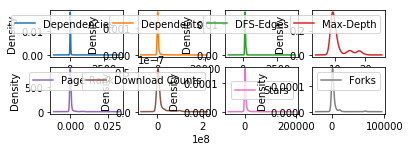

In [55]:
deplist(dc, pr, strs, frks)

In [63]:
def deplist(dc, pr, strs, frks):
    # Calculate all the dependencies, dependents
    dcon = {}
    list1 = []
    list2 = []
    list3 = []
    list4 = []
    for node in G:
        #print(node)
        #temp = {node:len(G.out_edges(node))}
        list1.append(node)
        list2.append(len(G.out_edges(node)))
        list3.append(len(G.in_edges(node)))
        list4.append(len(list(nx.dfs_edges(G,node))))
        list(dfs_depth(G, node))
        #dcon.update(temp)
    list2 = sorted(list2, reverse=True)
    list3 = sorted(list3, reverse=True)
    list4 = sorted(list4, reverse=True)
    global max_d
    max_d = sorted(max_d, reverse=True)
    #print(max_d)
    #print("Maximums:")
    #print(max(list2[:1000]))
    #print(max(list3[:1000]))
    #print(max(list4[:1000]))
    #print(max(pr[:1000]))
    #print(max(max_d[:1000]))
    #print(max(dc[:1000]))
    #print(max(strs[:1000]))
    #print(max(frks[:1000]))
    #print("Minimums:")
    #print(min(list2[:1000]))
    #print(min(list3[:1000]))
    #print(min(list4[:1000]))
    #print(min(pr[:1000]))
    #print(min(max_d[:1000]))
    #print(min(dc[:1000]))
    #print(max(strs[:1000]))
    #print(max(frks[:1000]))
    #sorted_dcon = sorted(dcon.items(), key=lambda x: x[1], reverse=True)
    df = pandas.DataFrame(data={"Dependencies":list2[:1000], "Dependents":list3[:1000], "DFS-Edges":list4[:1000], "Max-Depth":max_d[:1000], "Page Rank":pr[:1000], "Download Counts":dc[:1000], "Stars":strs[:1000], "Forks":frks[:1000]})
    df.plot(kind="density", subplots=True, layout=(4,4), sharex=False, figsize=(50, 50))
    plt.show()

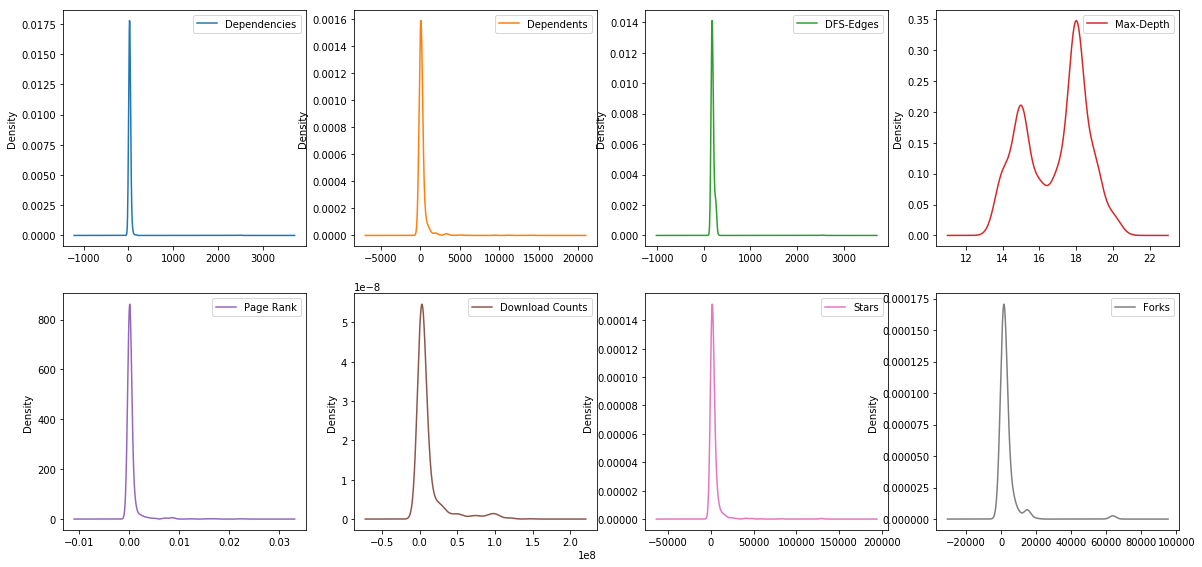

In [67]:
deplist(dc, pr, strs, frks)